In [ ]:
import csv
import os
import time
import numpy as np
import re
import joblib
from string import punctuation
from sklearn.cluster import DBSCAN
import pickle as pk
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
#from Analyse import filter_out
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
import warnings

In [ ]:

warnings.filterwarnings('ignore')

add_punc = '!,;:?"\'、，；().’‘“”'
all_punc = punctuation + add_punc

def removePunctuation(text):
    text = re.sub(r'[{}]+'.format(all_punc),' ',text)
    return text.strip().split()

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
from sklearn.covariance import EllipticEnvelope
from numpy import quantile, where, random

def dbScan(data_x, data_y,years, name, eps=0.5, minpoint=3, flag=True): # DBSCAN

    plt.clf()
    data_y = np.array(data_y).reshape(-1, 1).astype('float32')
    db = DBSCAN(eps=eps, min_samples=minpoint).fit(data_y)

    y_null=[]
    for i in range(1,len(years)+1):
      y_null.append(0)

    plt.plot(years,y_null,'none')
    labels = db.labels_
    output = labels

    minn = min(output)
    if minn < 0:
        output = output + -1*minn
    maxn = max(output)

    X, Y = [], []
    for i in range(maxn+1):
        X.append([])
        Y.append([])
    length = len(data_x)
    mpl.rcParams['axes.unicode_minus'] = False  #
    for i in range(length):
        X[output[i]].append(data_x[i])
        Y[output[i]].append(data_y[i])

    if flag == False:
        for i in range(maxn + 1):
            plt.scatter(X[i], Y[i], s=10)

    index = 0
    for i in range(maxn + 1):
        if len(X[index]) <= len(X[i]):
            index = i
    plt.plot(X[index], Y[index])
    plt.xticks(rotation=90)
    plt.title(name+' '+'DBSCAN')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.savefig('DBSCAN')
    #print(img_path)
    plt.show()

def MCD(data_x, data_y, years, name,contamination=0.02, flag=True):
    '''
    :param data_x:
    :param data_y:
    :param samples:
    :return:
    '''
    try:
      plt.clf()
      data_y = np.array(data_y).reshape(-1, 1).astype('float32')
      y_null=[]
      for i in range(1,len(years)+1):
        y_null.append(0)

      plt.plot(years,y_null,'none')

      elenv =     EllipticEnvelope(assume_centered=False, contamination=contamination, random_state=None,
                      store_precision=True, support_fraction=None)
      output = elenv.fit_predict(data_y)
      output[output<0] = 0
      X, Y = [], []
      for i in range(2):
          X.append([])
          Y.append([])
      length = len(data_x)

      for i in range(length):
          X[output[i]].append(data_x[i])
          Y[output[i]].append(data_y[i])

      mpl.rcParams['axes.unicode_minus'] = False  #

      if flag == True:
          if len(X[1]) != 0:
              plt.scatter(X[1], Y[1], s=10)
          else:
              plt.scatter(X[0], Y[0], s=10)
      else:
          for i in range(2):
              plt.scatter(X[i], Y[i], s=10)
          if len(X[1]) != 0:
              plt.plot(X[1], Y[1])
          else:
              plt.plot(X[0], Y[0])
      plt.xticks(rotation=90)
      plt.title(name+' '+'MCD')
      plt.xlabel("Date")
      plt.ylabel("Price")
      plt.savefig('MCD')
      plt.show()
    except:
      pass

def IForest(data_x, data_y,years,name, samples=5,flag=True):
    '''
    :param data_x:
    :param data_y:
    :param samples:
    :return:
    '''
    plt.clf()
    data_y = np.array(data_y).reshape(-1, 1).astype('float32')
    y_null=[]
    for i in range(1,len(years)+1):
      y_null.append(0)

    plt.plot(years,y_null,'none')
    clf = IsolationForest(max_samples=samples, random_state=42)
    clf.fit(data_y)
    output = clf.predict(data_y)
    output[output<0] = 0
    X, Y = [], []
    for i in range(2):
        X.append([])
        Y.append([])
    length = len(data_x)

    for i in range(length):
        X[output[i]].append(data_x[i])
        Y[output[i]].append(data_y[i])

    mpl.rcParams['axes.unicode_minus'] = False  #

    if flag == True:
        if len(X[1]) != 0:
            plt.scatter(X[1], Y[1], s=10)
        else:
            plt.scatter(X[0], Y[0], s=10)
    else:
        for i in range(2):
            plt.scatter(X[i], Y[i], s=10)
        if len(X[1]) != 0:
            plt.plot(X[1], Y[1])
        else:
            plt.plot(X[0], Y[0])
    plt.xticks(rotation=90)
    plt.title(name+' '+'IsolationForest')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.savefig('Iforest')
    # print(img_path)
    plt.show()

def filter_out(data_x, data_y,years, name, img_path, samples=10):
    '''
    :param data_x:
    :param data_y:
    :param samples:
    :return:
    '''
    data_y = np.array(data_y).reshape(-1, 1).astype('float32')

    y_null=[]
    for i in range(1,len(years)+1):
      y_null.append(0)

    plt.plot(years,y_null,'none')

    clf = IsolationForest(max_samples=samples, random_state=42)
    clf.fit(data_y)
    output = clf.predict(data_y)
    output[output<0] = 0

    X, Y = [], []
    length = len(data_x)

    for i in range(length):
        if output[i] == 1:
            X.append(data_x[i])
            Y.append(data_y[i])

    # plt.rcParams['font.sans-serif'] = ['SimHei']  #
    mpl.rcParams['axes.unicode_minus'] = False  #
    length = len(data_x)
    n_sum = [float(data_y[0])]
    last = data_x[0]

    plt_x, plt_y = [], []
    for i in range(1, length):
        if data_x[i] == last:
            n_sum.append(float(data_y[i]))
        else:
            plt_x.append(last)
            plt_y.append(np.mean(n_sum))
            n_sum = [float(data_y[i])]
            last = data_x[i]

    plt_x.append(last)
    plt_y.append(np.mean(n_sum))

    plt.plot(plt_x, plt_y)
    plt.scatter(plt_x, plt_y, s=8)

    plt.title('Good ' + str(name))
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.tick_params(labelsize=7)
    # plt.savefig(img_path)
    plt.show()


In [ ]:
def readFile(path):
    date, name, price, offer_price, description = [], [], [], [], []
    with open(path, 'r', encoding='UTF-8') as f:
        reader = csv.reader(f)
        result = list(reader)
        # print(result[0]) # header
        # print(result[0][1]) # collection_date_of_price
        # print(result[0][5]) # product_name
        # print(result[0][8]) # price
        # print(result[0][9]) # price_inc_offer
        # print(result[0][-1]) # product_description
        for i in range(1, len(result)):
            temp = result[i][-1]
            if temp != "":
                date.append(result[i][1])
                name.append(result[i][5])
                price.append(result[i][8])
                offer_price.append(result[i][9])
                description.append(' '.join(removePunctuation(result[i][-1])))
    return (date, name, price, offer_price, description)

In [ ]:
filepath = 'webscraped_DVDs.csv'
commodity = readFile(filepath)

In [ ]:

def train_D2V(data):
    time_start = time.time()
    description = []
    doc_dict = {}
    index = 0
    length = len(data)
    print('train_model length:', length)

    path = 'DVDs/model'
    if not os.path.exists(path):
        os.makedirs(path)

    for i in range(length):
        temp = removePunctuation(data[i])
        doc_dict[index] = temp
        # description.append(temp)
        description.append(TaggedDocument(temp, tags=[index]))
        index += 1

    # description = [' '.join(i) for i in description]
    model = Doc2Vec(description, vector_size=50, window=5, alpha=0.015) # changable: vector_size, window
    model.train(description, epochs=20, total_examples=model.corpus_count) # changable: epochs
    model.save(path + '/webscraped_DVDs')
    time_end = time.time()
    print('train_model times:', time_end-time_start)

In [ ]:
commodity_description = commodity[-1]
train_D2V(commodity_description)

train_model length: 82403
train_model times: 688.1828191280365


In [ ]:
def create_vector_file(path, commodity):
    time_start = time.time()
    (date, name, price, offer_price, description) = commodity
    date_dict = {}
    count = 0
    for i in date:
        temp_date = i[:-3]
        if temp_date not in date_dict:
            date_dict[temp_date] = count
            count += 1

    Data = []
    for i in range(count):
        Data.append([])
    for i in Data:
        for k in range(6):
            i.append([])
    length = len(date)

    model = Doc2Vec.load(path)
    doc_vector = []
    doc_dicts = {}
    for i in description:
        if i not in doc_dicts:
            doc_dicts[i] = model.infer_vector(i)

    for i in range(length):
        temp_date = date[i][:-3]
        k = date_dict[temp_date]
        Data[k][0].append(date[i])
        Data[k][1].append(name[i])
        Data[k][2].append(price[i])
        Data[k][3].append(offer_price[i])
        Data[k][4].append(description[i])
        temp_vector = doc_dicts[description[i]]
        Data[k][5].append(temp_vector)
        doc_vector.append(temp_vector)
    path = 'DVDs/'
    path1 = 'pkl/'
    for i in date_dict:
        data_value = date_dict[i]
        temp_path = path+str(i)
        if not os.path.exists(temp_path):
            os.makedirs(temp_path)
        pickle_dict = {'date': Data[data_value][0], 'name': Data[data_value][1], 'price': Data[data_value][2],
                       'offer_price': Data[data_value][3], 'description': Data[data_value][4], 'vector': Data[data_value][5]}
        pk.dump(pickle_dict, open(temp_path + '/'+str(i)+'.pkl', 'wb'), protocol=4)
        temp_path1 = path1
        if not os.path.exists(path1):
            os.makedirs(path1)
        pickle_dict1 = {'date': Data[data_value][0], 'name': Data[data_value][1], 'price': Data[data_value][2],
                       'offer_price': Data[data_value][3], 'description': Data[data_value][4], 'vector': Data[data_value][5]}
        pk.dump(pickle_dict1, open(path1 + '/'+str(i)+'.pkl', 'wb'), protocol=4)

    data_dict = {'vector': doc_vector}
    pk.dump(data_dict, open(path + 'vector.pkl', 'wb'), protocol=4)
    time_end = time.time()
    print('create_vector_file times:', time_end - time_start)

In [ ]:
path = 'DVDs/model/webscraped_DVDs'
create_vector_file(path, commodity)

create_vector_file times: 135.05122423171997


In [ ]:

def saveModel(model, save_path='model.pkl'):
    joblib.dump(model, save_path)

def loadModel(mode_path='model.pkl'):
    model = joblib.load(mode_path)
    return model

def select_goods(path):
    time_start = time.time()
    data = pk.load(open(path, 'rb'))
    data_y = data['vector']
    data_y = np.array(data_y)
    db = DBSCAN(eps=1, min_samples=3).fit(data_y) # changable: eps, min_samples
    labels = db.labels_
    output = labels
    print(max(output))
    time_end = time.time()
    saveModel(db, 'DVDs/groups.pkl')
    print('select_goods times:', time_end - time_start)

In [ ]:
path = 'DVDs/vector.pkl'
select_goods(path)

4023
select_goods times: 86.67116641998291


In [ ]:
import os
def pkl_reader(path="pkl/"):
  path = path

  files =[]
  paths=[]

  for file in os.listdir(path):
    if os.path.isdir(path + file):
      paths.append(path + file+"/")
    else:
      files.append(path + file)

  return files,paths

In [ ]:
pkl_data=pkl_reader("pkl2/")
print(pkl_data[0])



['pkl2/2020-05.pkl', 'pkl2/2019-08.pkl', 'pkl2/2019-04.pkl', 'pkl2/2020-03.pkl', 'pkl2/2019-06.pkl', 'pkl2/2019-10.pkl', 'pkl2/2018-12.pkl', 'pkl2/2020-02.pkl', 'pkl2/2020-01.pkl', 'pkl2/2019-09.pkl', 'pkl2/2020-04.pkl', 'pkl2/2019-03.pkl', 'pkl2/2019-01.pkl', 'pkl2/2019-02.pkl', 'pkl2/2019-12.pkl', 'pkl2/2018-11.pkl', 'pkl2/2019-05.pkl', 'pkl2/2019-11.pkl', 'pkl2/2019-07.pkl', 'pkl2/2018-10.pkl']


In [ ]:
from operator import itemgetter


def output(y_pred,temp,x,z):
  temp=temp
  data_x, data_y = [], []
  for i in range(len(y_pred)):
      if y_pred[i] == temp:
          data_x.append(x[i][2:-3])
          data_y.append(z[i])  
  new_data,x=[],[]
  for i in range(len(data_x)):
    new_data.append([data_x[i],data_y[i]])
    x.append(data_x[i])
  mein_dict = dict.fromkeys(x)
  meine_liste = list(mein_dict)
  meine_liste=sorted(meine_liste)
  sort_list=[]
  index=0
  for i in meine_liste:
    sort_list.append([i,index])
    index=index+1
  liste = sorted(new_data, key=itemgetter(0))

  resultantList = []
  
  for element in liste:
      if element not in resultantList:
          resultantList.append(element)

  new_data_x=[]
  new_data_y=[]
  for i in range(len(resultantList)):
    new_data_x.append(resultantList[i][0])
    new_data_y.append(resultantList[i][1]) 
  data_X=[]
  def number_list(a):
    for i in range(0,len(new_data_x)):
      if sort_list[a][0]==new_data_x[i]:
        data_X.append([new_data_x[i],sort_list[a][1]])

  for i in range(0,len(sort_list)):
    number_list(i)  

  number, years =[],[]
  for i in range(0,len(data_X)):
    number.append(data_X[i][1])
    years.append(data_X[i][0])  
  img_path = 'DVDs/imgs/Good'+str(temp) + '.png'
  filter_out(number,new_data_y ,years, name=temp, img_path=img_path)
  dbScan(number,new_data_y ,years, name="Good "+str(temp), eps=0.5, minpoint=3, flag=False)
  MCD(number,new_data_y ,years, name="Good "+str(temp),contamination=0.3, flag=False)
  IForest(number,new_data_y ,years,name="Good "+str(temp), samples=10,flag=False)

def work(): # Divide data into classes
    # Date = ['2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04']
    Date = pkl_data[0]
    x, y, z = [], [], []
    model = loadModel( 'DVDs/groups.pkl')
    path = 'DVDs/'
    for j in Date:
        temp_path = j
        date = pk.load(open(temp_path, 'rb'))['date']
        vector = pk.load(open(temp_path, 'rb'))['vector']
        price = pk.load(open(temp_path, 'rb'))['price']
        length = len(date)
        for k in range(length):
            x.append(date[k])
            y.append(vector[k])
            z.append(price[k])
    y_pred = model.fit_predict(y)
    minn = min(y_pred)
    if minn < 0:
        y_pred = y_pred + -1 * minn
    maxn = max(y_pred)
    print(maxn)
    #temp=2
    for temp in range(1, 150):
      output(y_pred,temp,x,z)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DBSCAN from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


4077


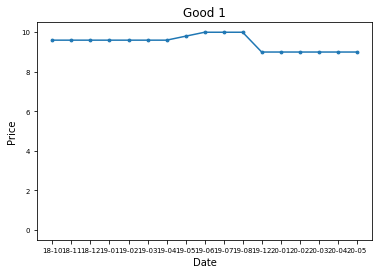

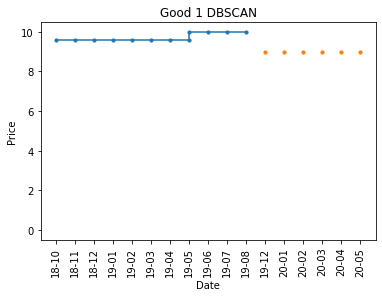

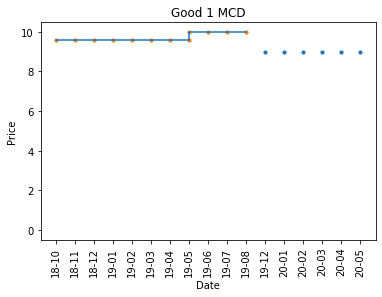

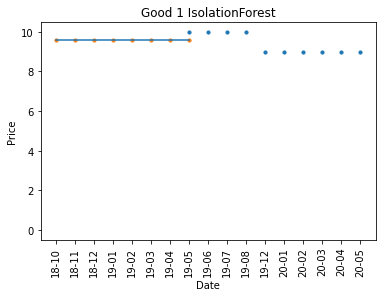

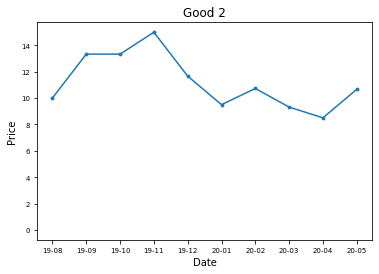

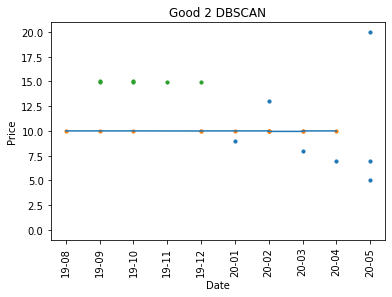

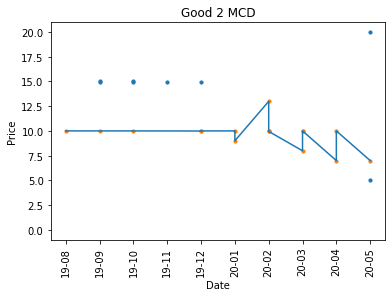

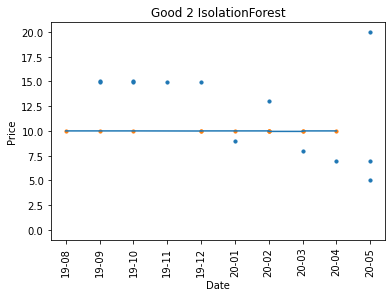

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (3). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


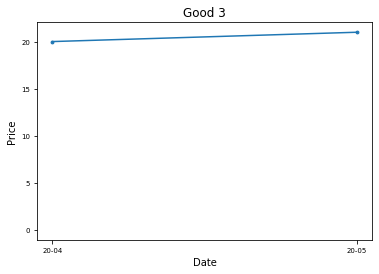

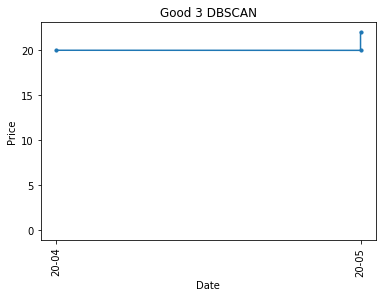

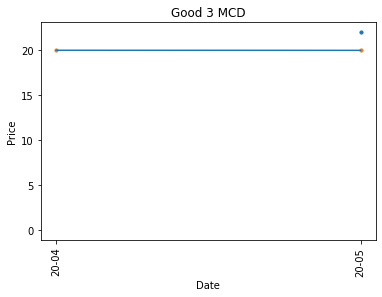

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (3). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


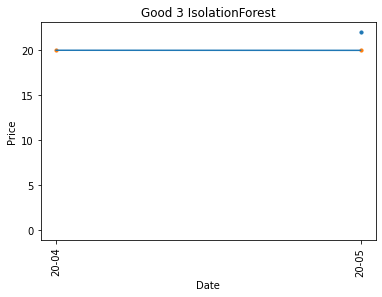

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (4). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


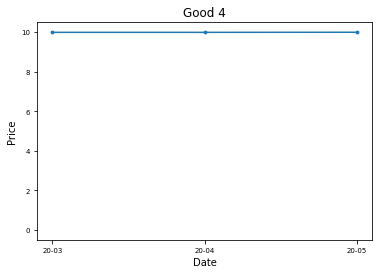

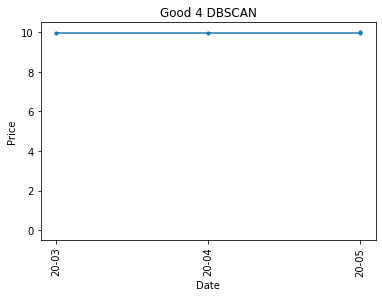

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (4). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


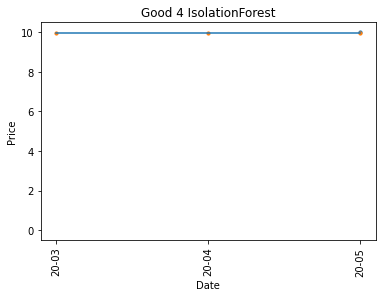

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (1). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


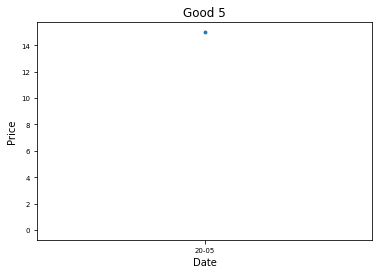

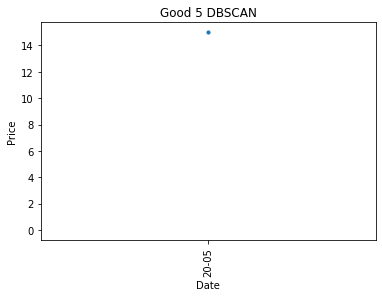

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (1). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


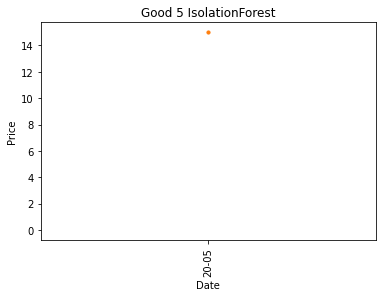

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (2). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


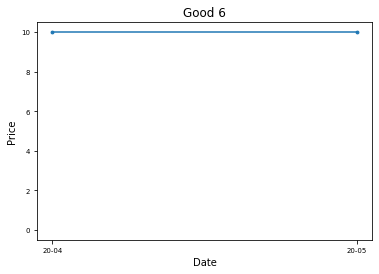

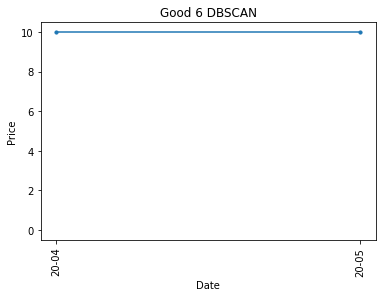

/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:806: RuntimeWarning: invalid value encountered in true_divide
  self.dist_ /= correction
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:848: RuntimeWarning: Mean of empty slice.
  location_reweighted = data[mask].mean(0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_empirical_covariance.py:93: RuntimeWarning: Degrees of freedom <= 0 for slice
  covariance = np.cov(X.T, bias=1)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/

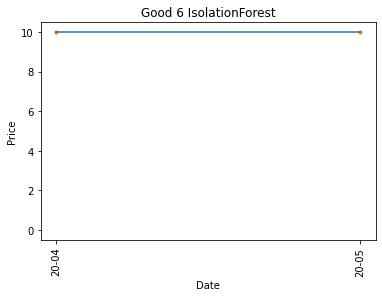

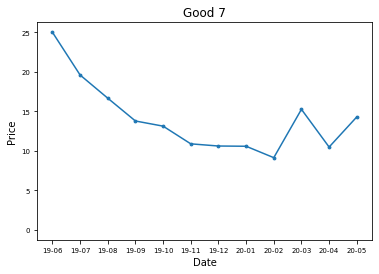

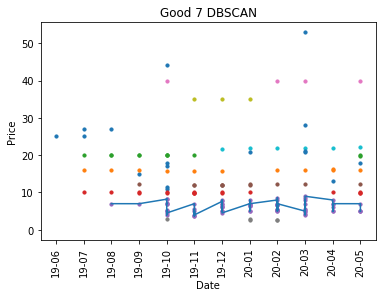

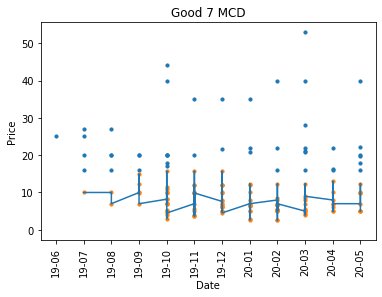

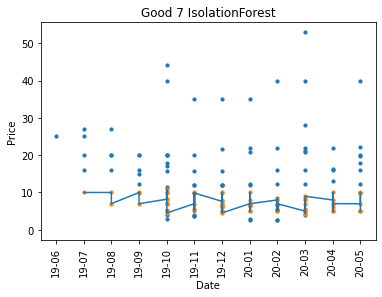

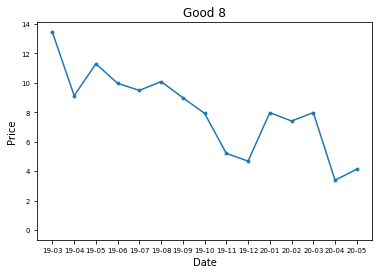

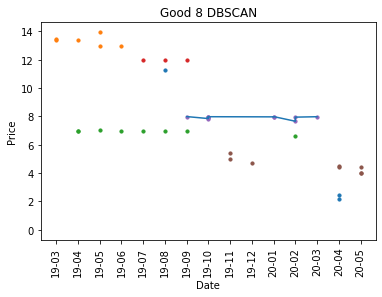

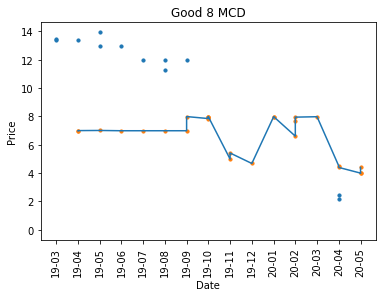

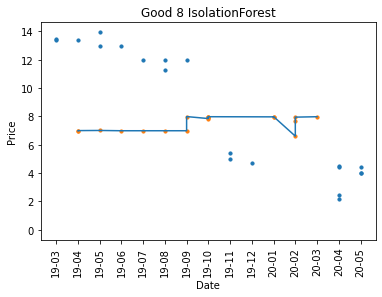

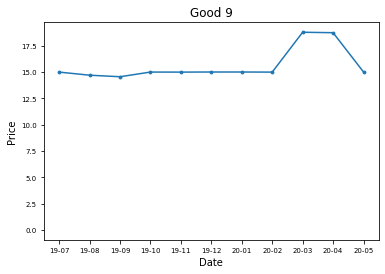

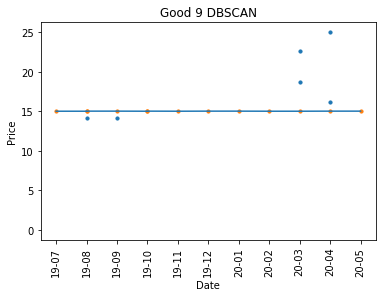

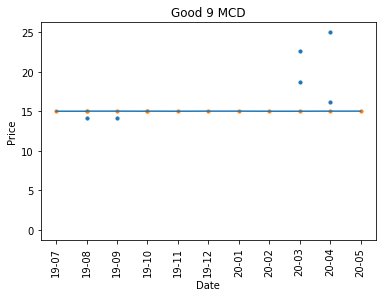

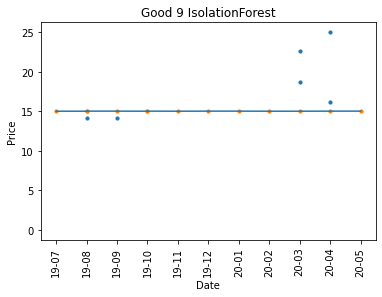

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (2). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


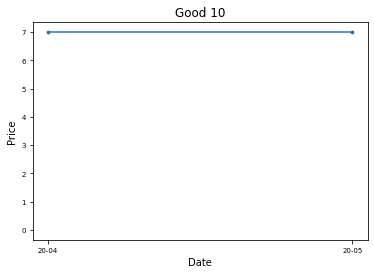

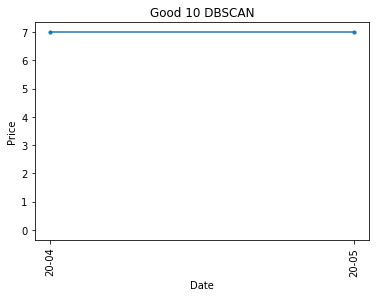

/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:806: RuntimeWarning: invalid value encountered in true_divide
  self.dist_ /= correction
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:848: RuntimeWarning: Mean of empty slice.
  location_reweighted = data[mask].mean(0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_empirical_covariance.py:93: RuntimeWarning: Degrees of freedom <= 0 for slice
  covariance = np.cov(X.T, bias=1)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/

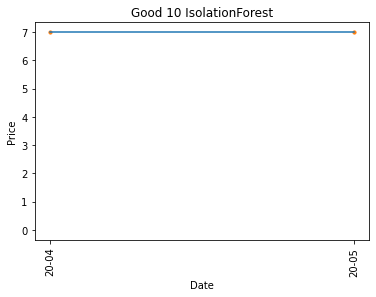

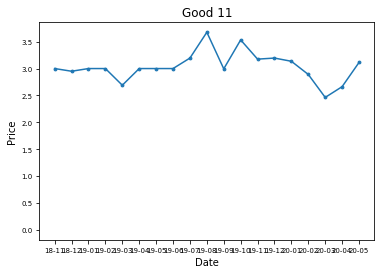

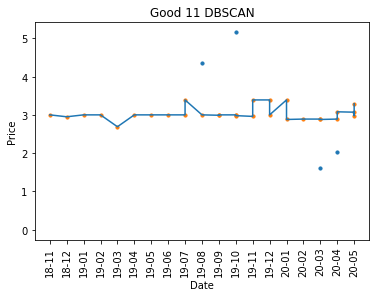

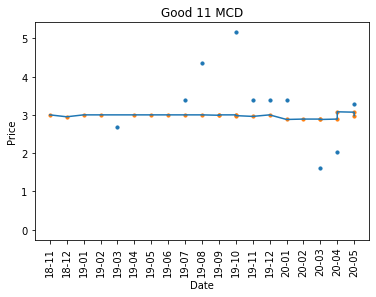

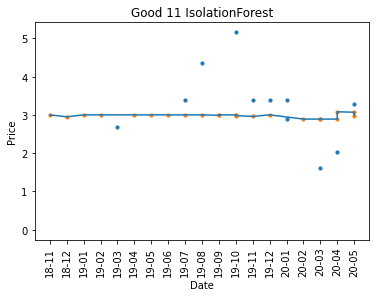

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (4). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


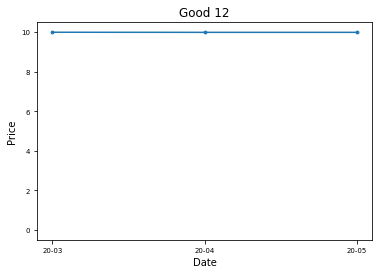

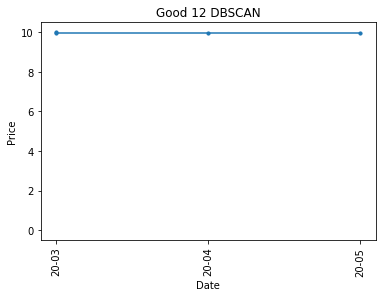

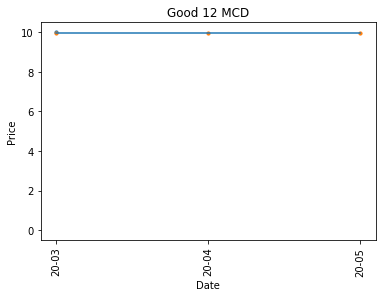

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (4). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


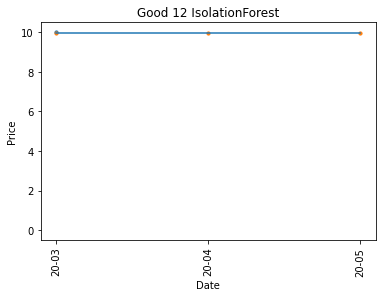

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (4). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


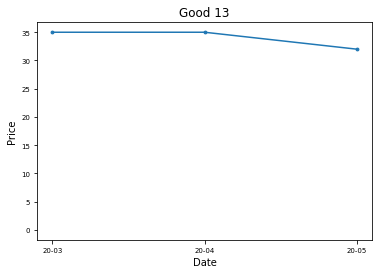

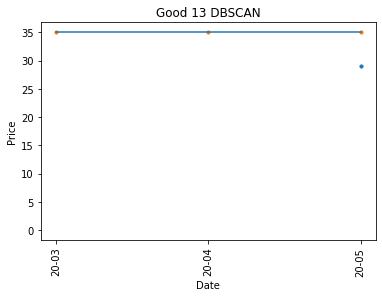

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (4). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


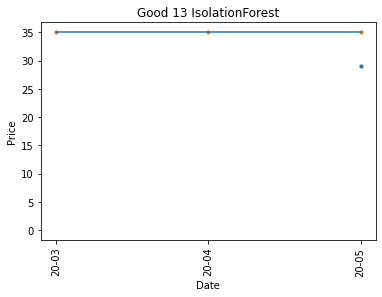

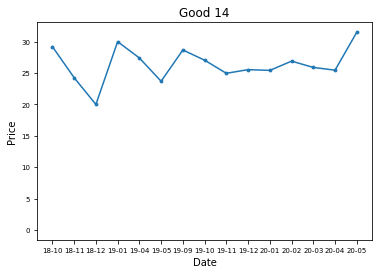

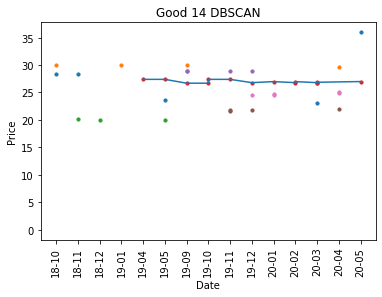

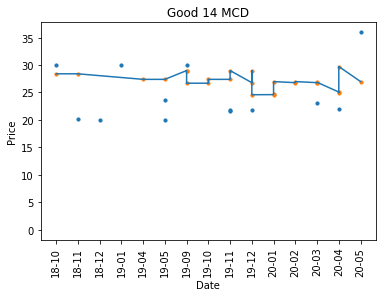

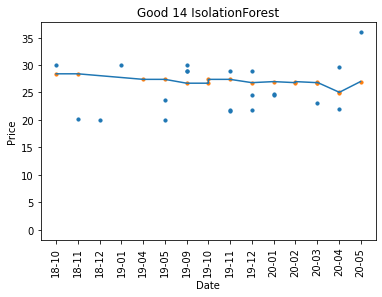

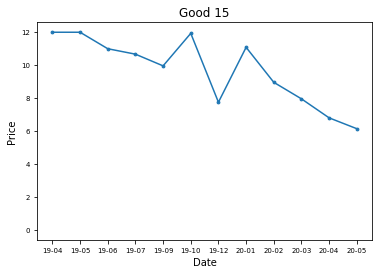

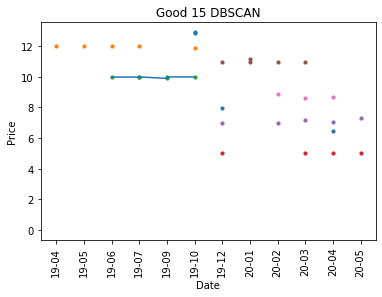

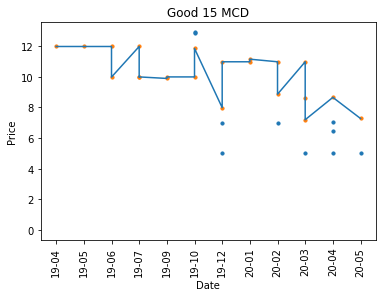

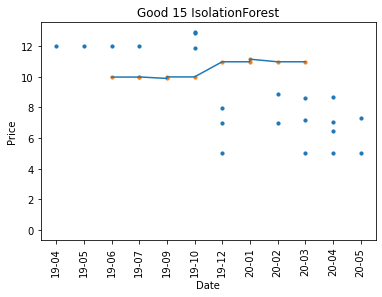

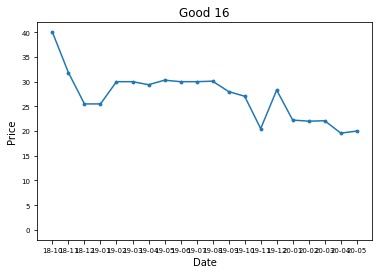

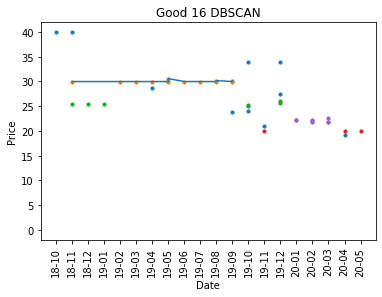

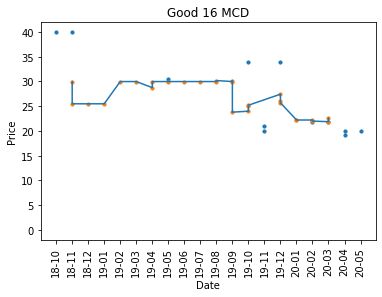

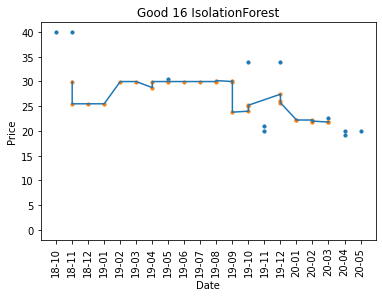

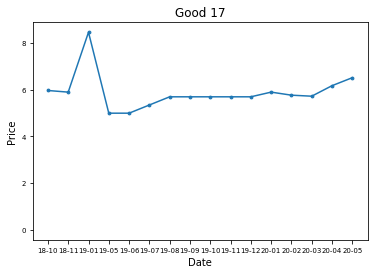

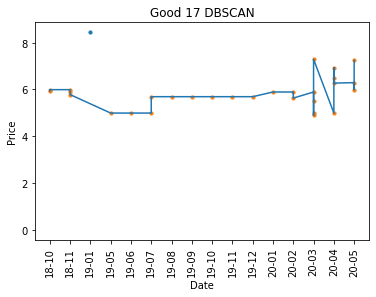

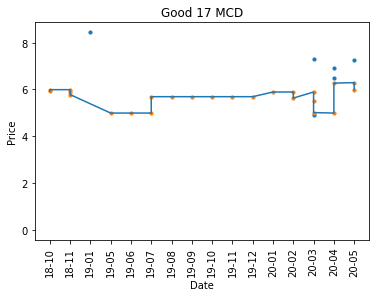

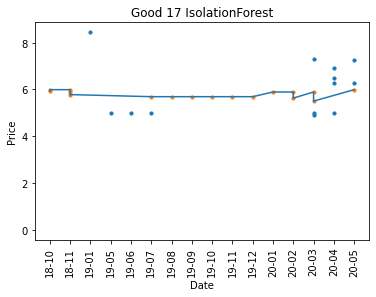

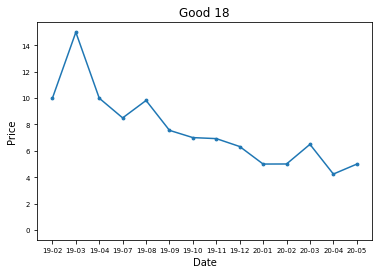

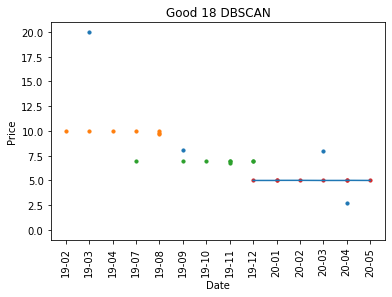

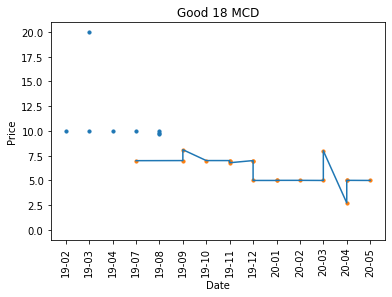

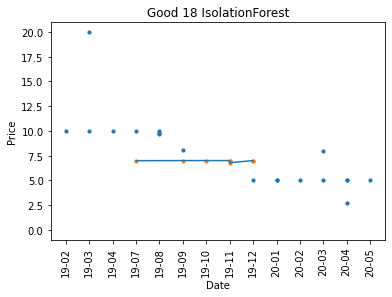

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (6). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


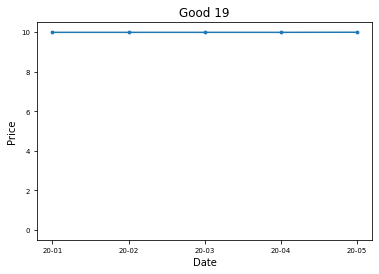

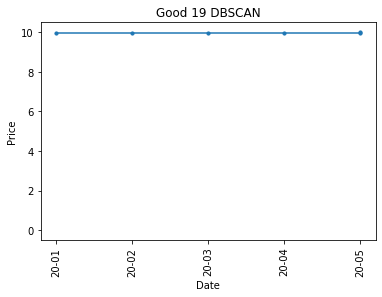

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (6). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


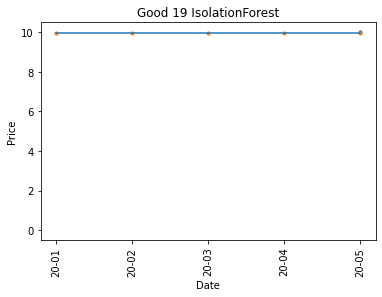

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (3). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


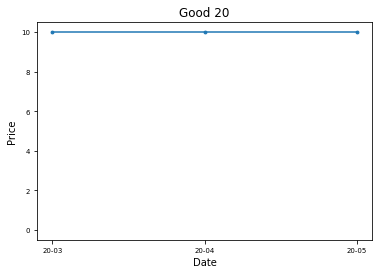

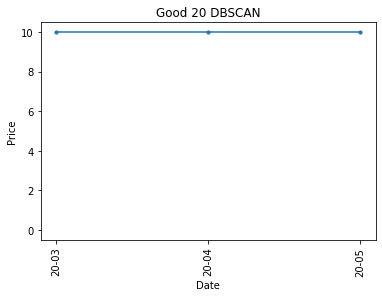

/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:806: RuntimeWarning: invalid value encountered in true_divide
  self.dist_ /= correction
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:848: RuntimeWarning: Mean of empty slice.
  location_reweighted = data[mask].mean(0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_empirical_covariance.py:93: RuntimeWarning: Degrees of freedom <= 0 for slice
  covariance = np.cov(X.T, bias=1)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/

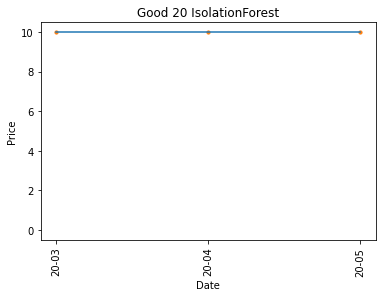

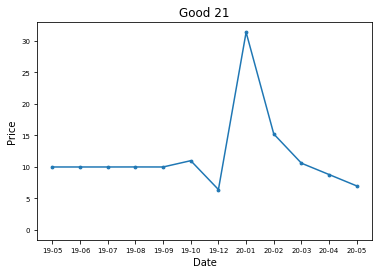

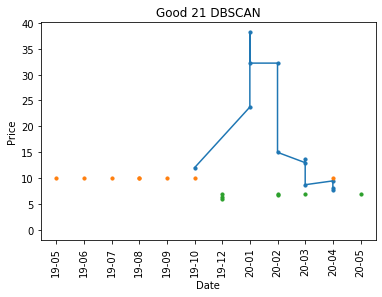

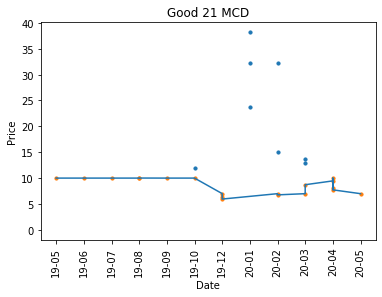

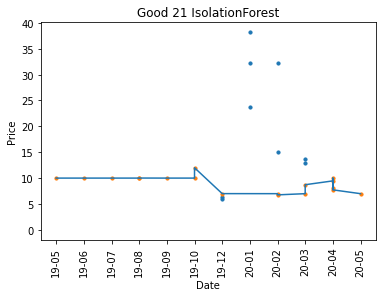

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (1). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


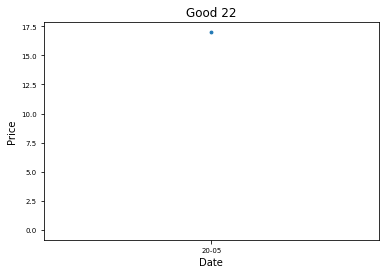

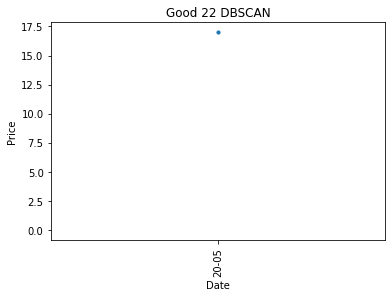

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (1). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


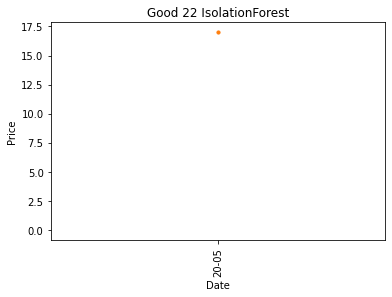

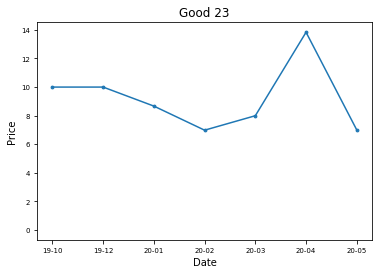

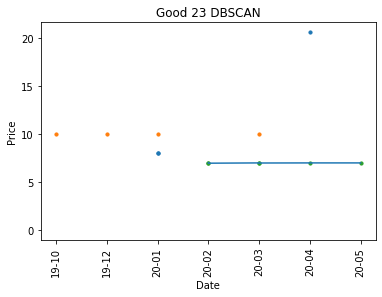

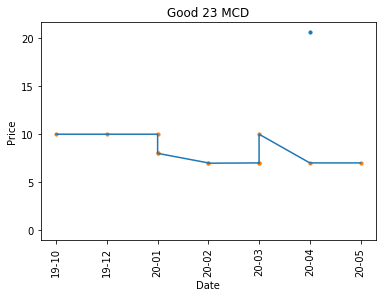

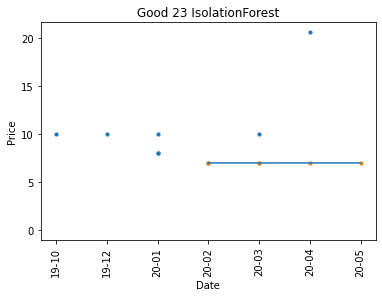

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (5). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


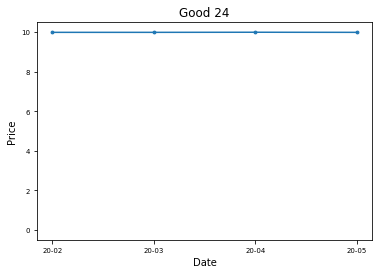

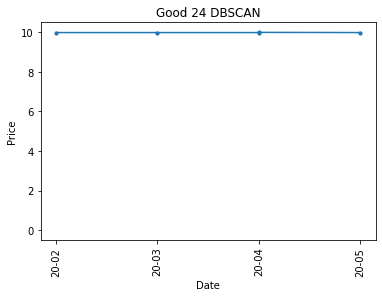

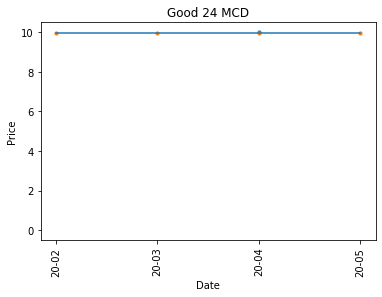

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (5). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


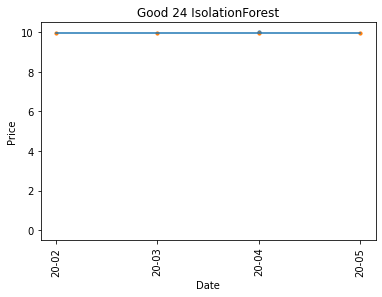

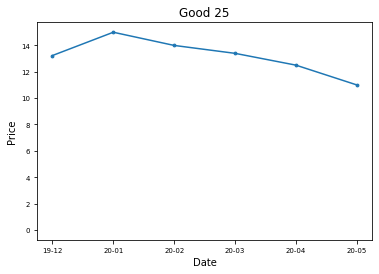

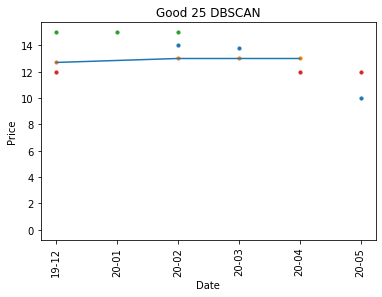

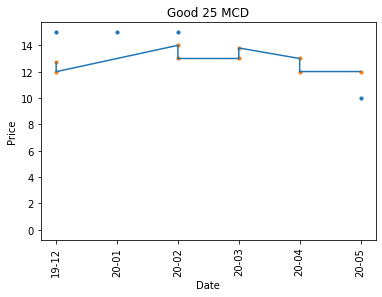

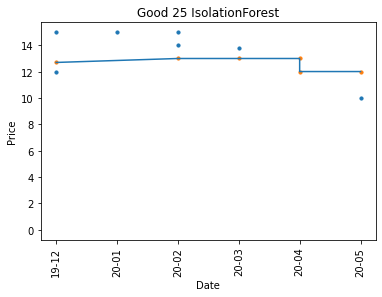

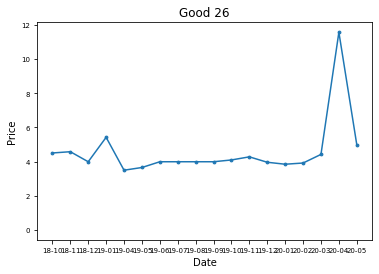

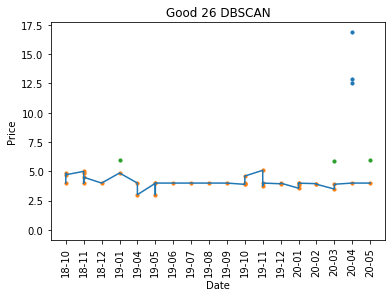

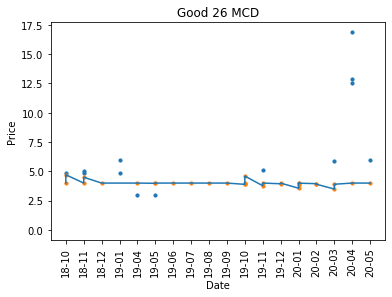

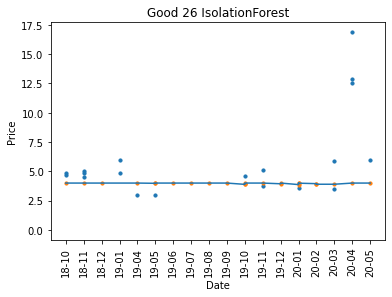

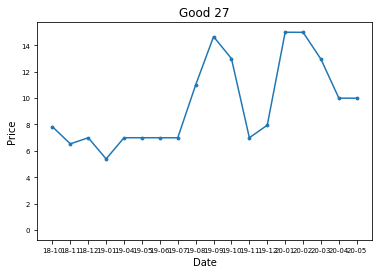

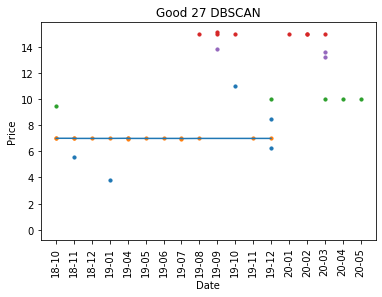

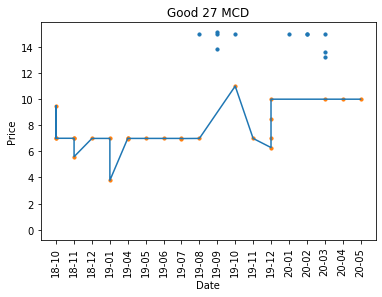

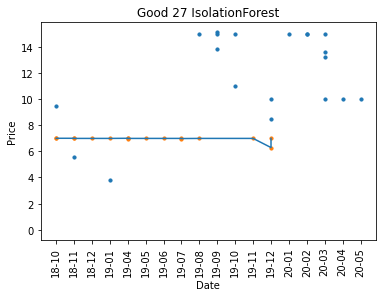

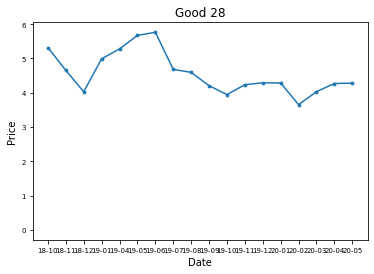

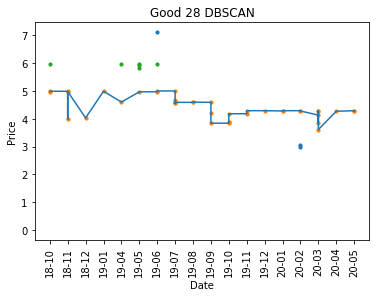

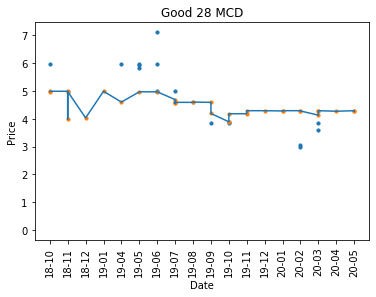

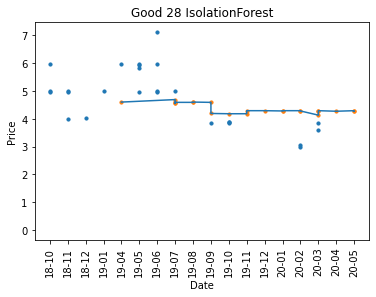

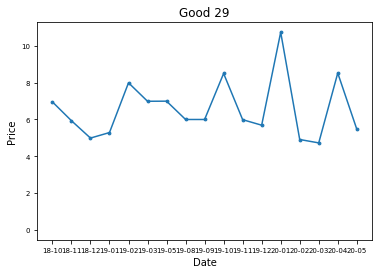

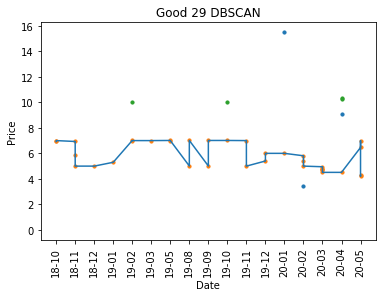

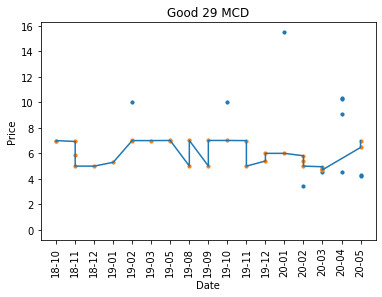

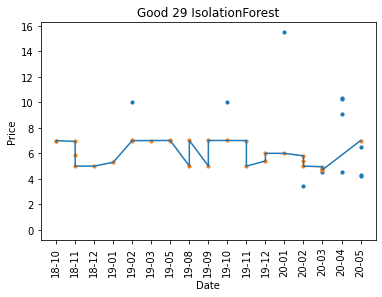

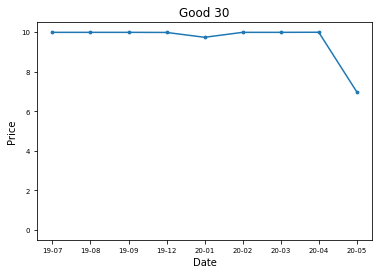

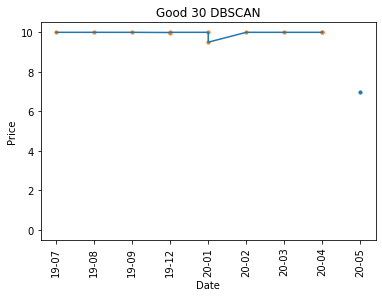

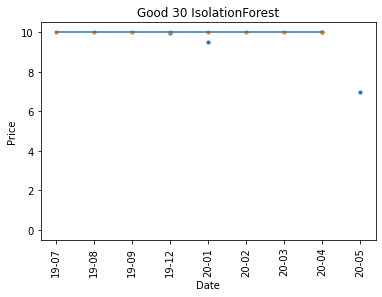

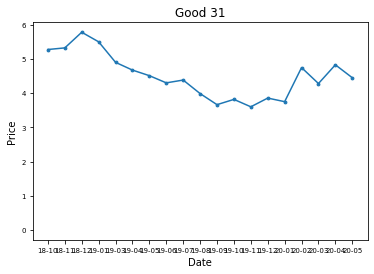

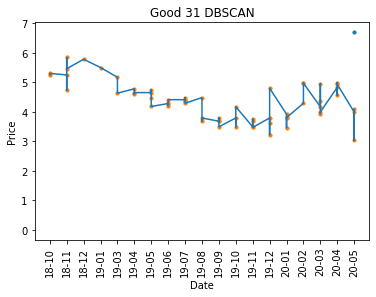

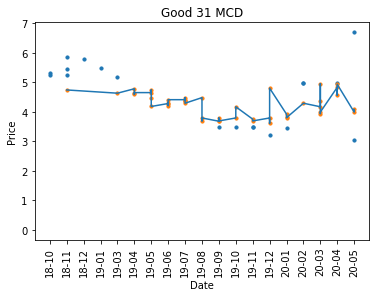

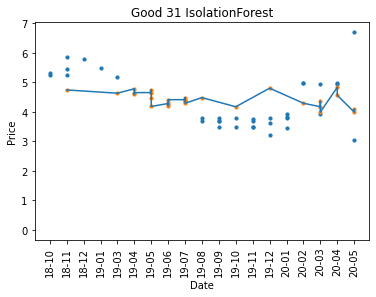

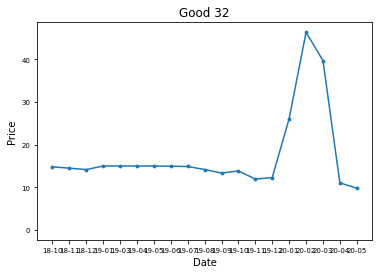

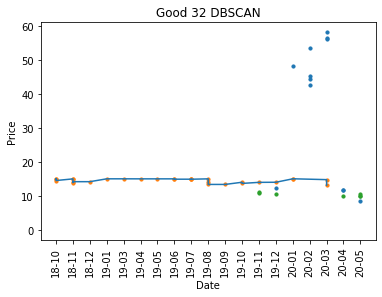

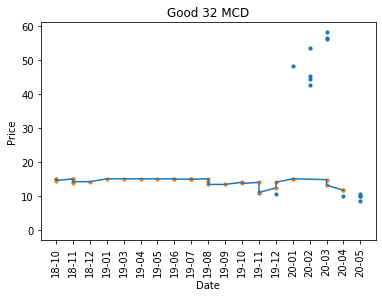

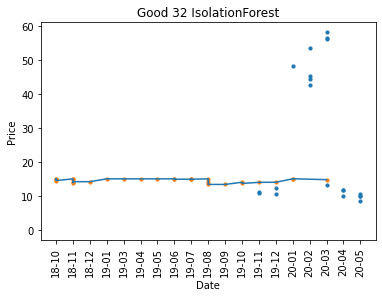

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (3). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


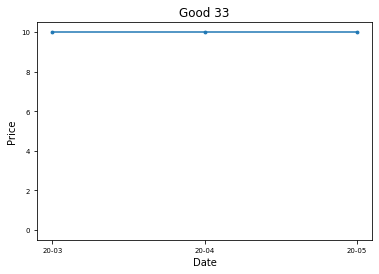

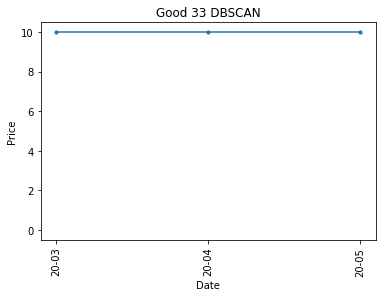

/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:806: RuntimeWarning: invalid value encountered in true_divide
  self.dist_ /= correction
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:848: RuntimeWarning: Mean of empty slice.
  location_reweighted = data[mask].mean(0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_empirical_covariance.py:93: RuntimeWarning: Degrees of freedom <= 0 for slice
  covariance = np.cov(X.T, bias=1)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/

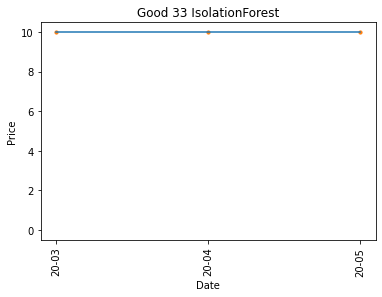

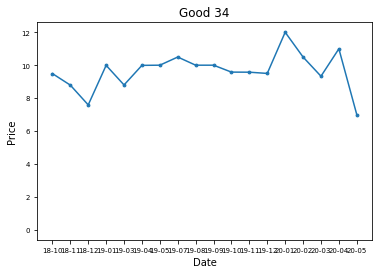

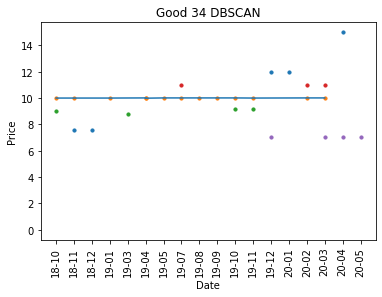

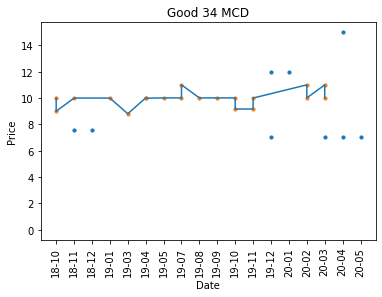

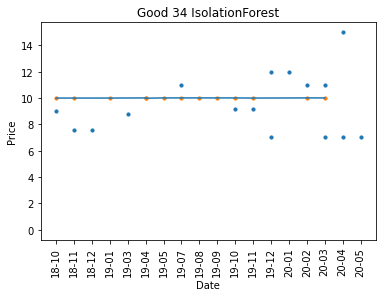

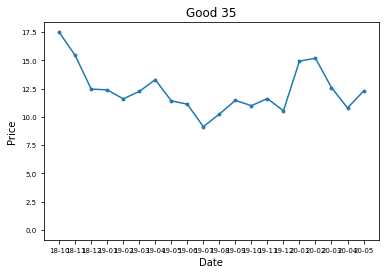

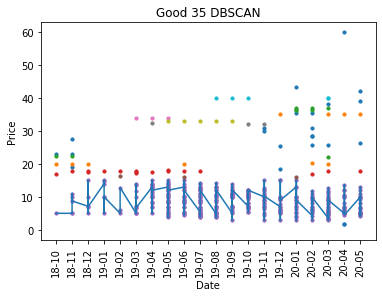

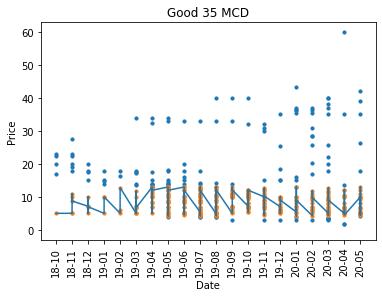

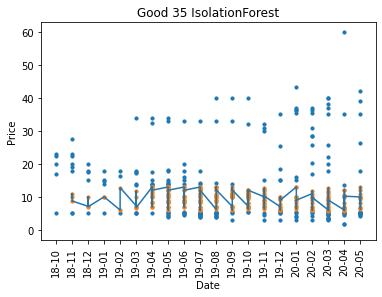

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (4). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


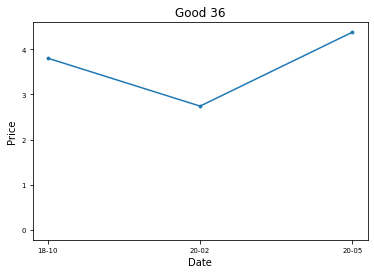

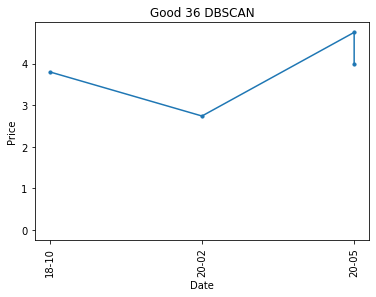

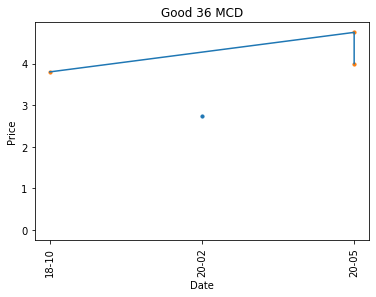

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (4). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


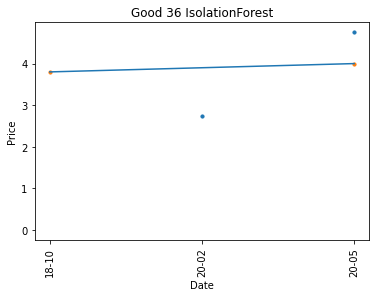

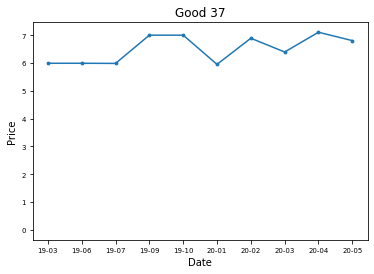

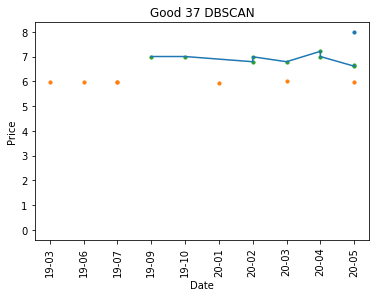

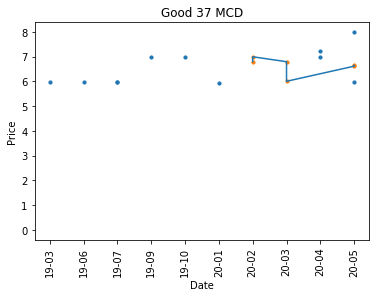

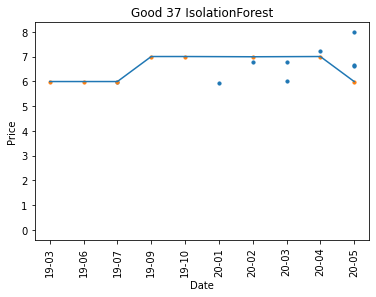

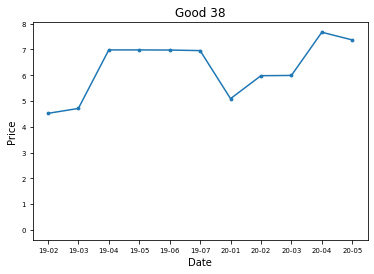

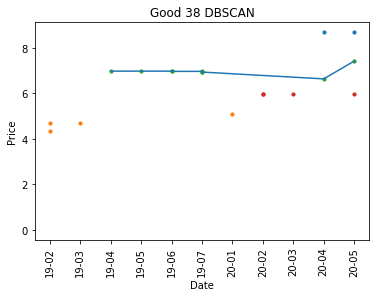

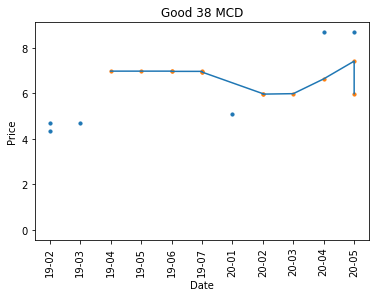

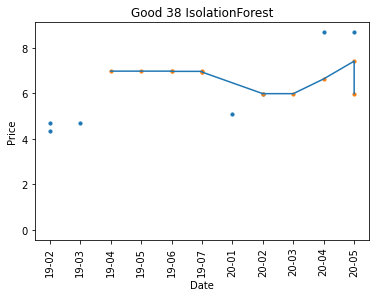

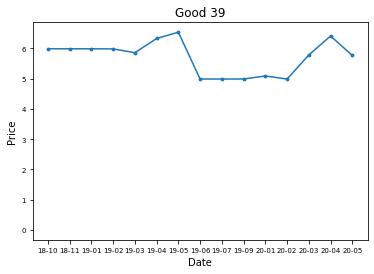

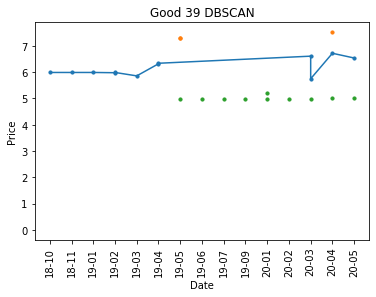

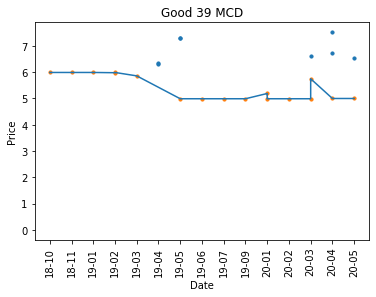

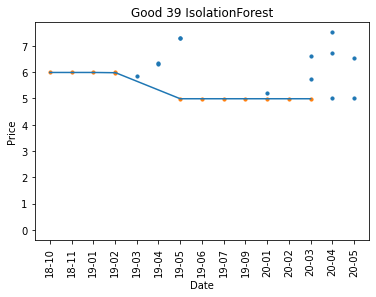

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (9). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


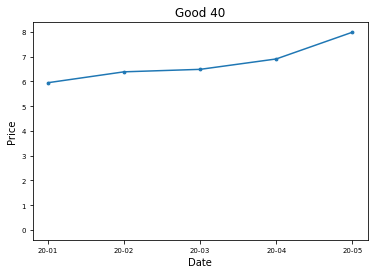

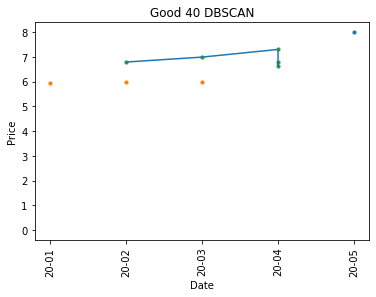

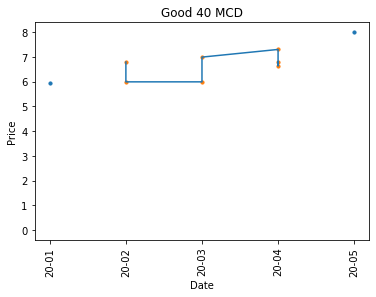

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (9). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


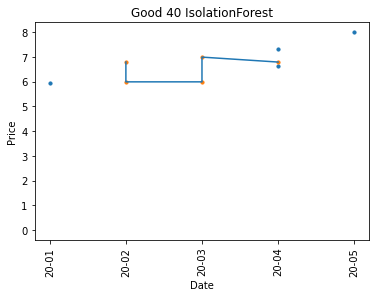

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (4). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


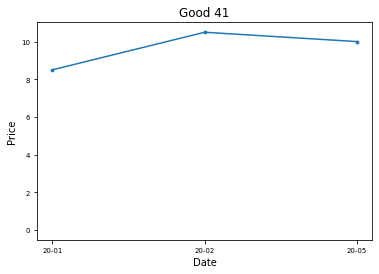

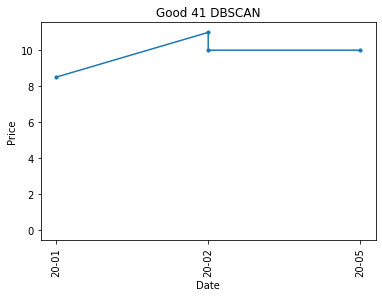

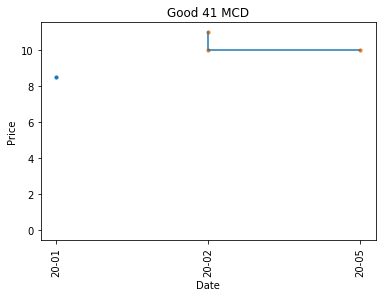

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (4). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


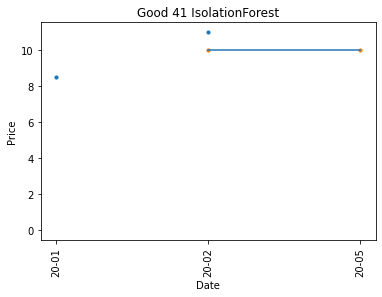

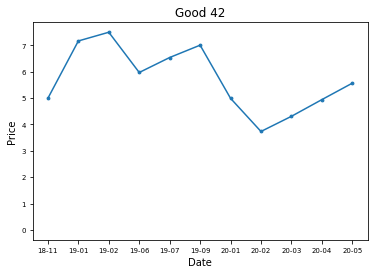

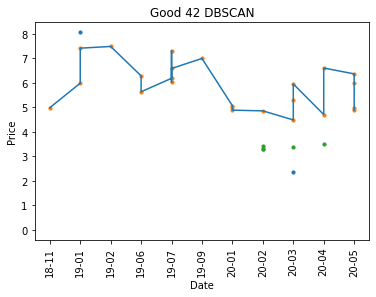

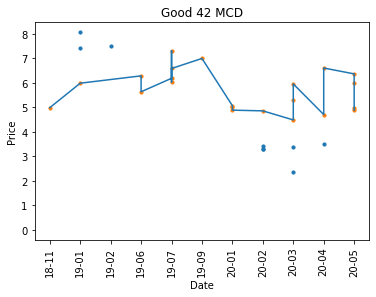

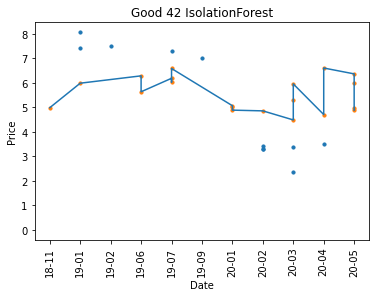

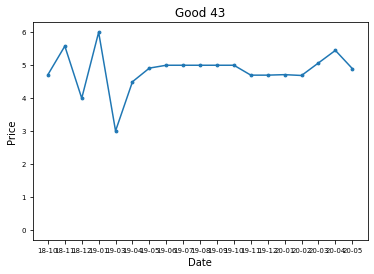

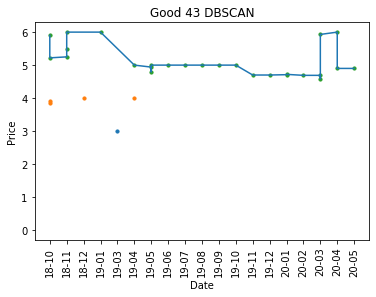

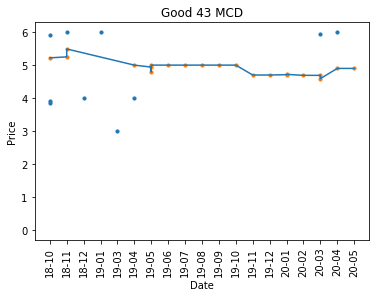

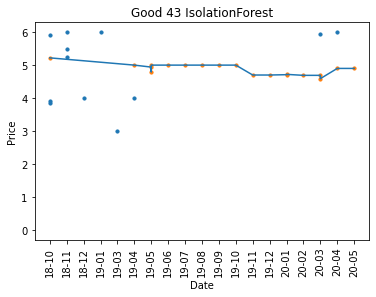

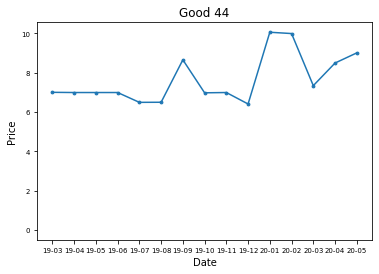

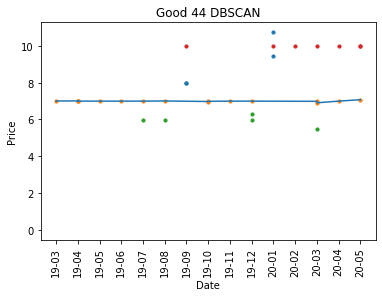

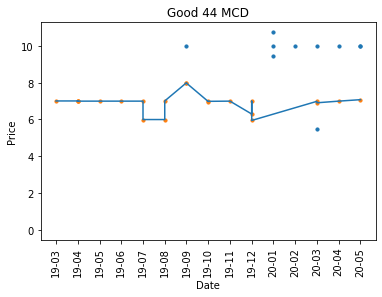

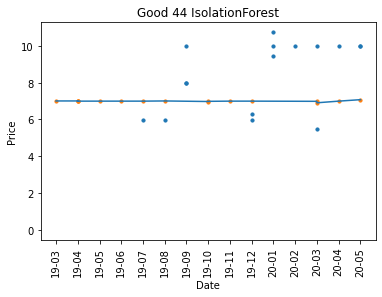

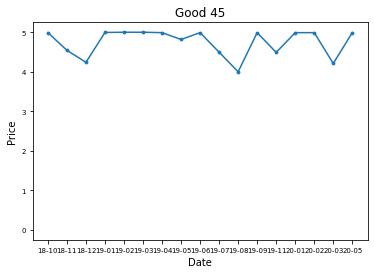

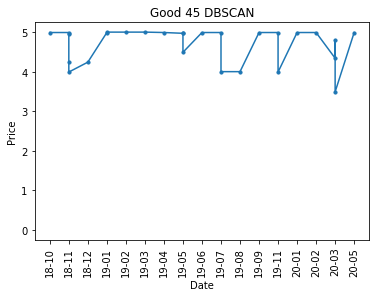

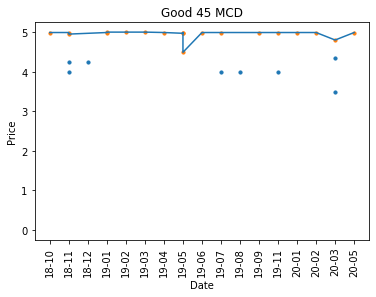

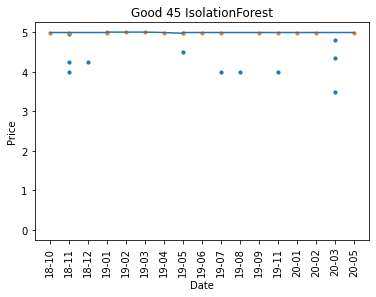

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (5). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


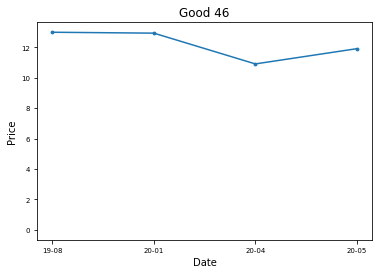

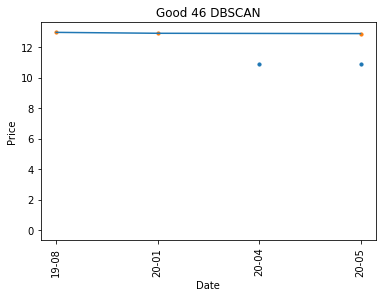

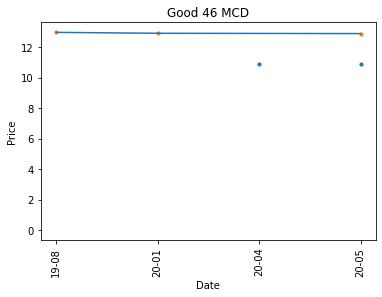

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (5). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


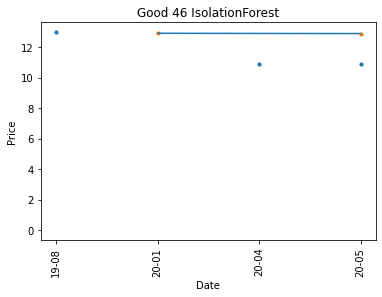

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (2). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


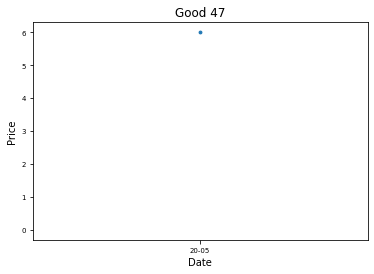

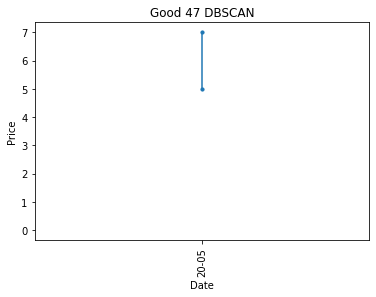

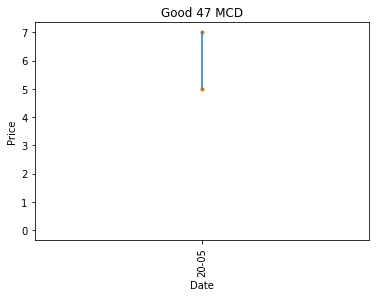

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (2). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


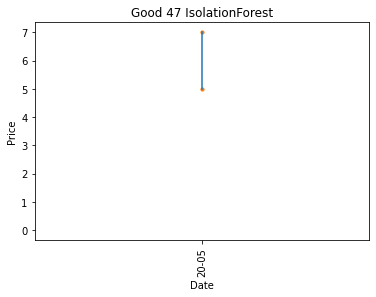

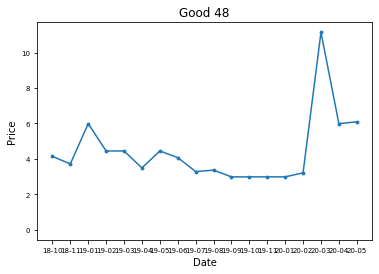

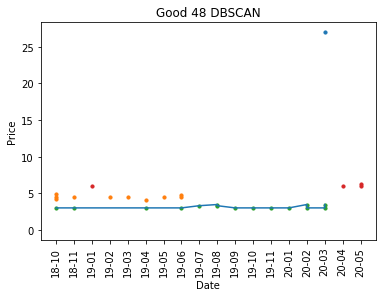

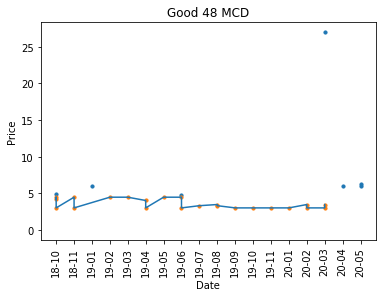

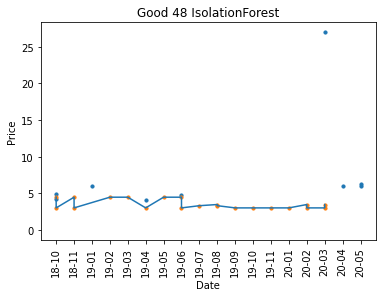

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (4). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


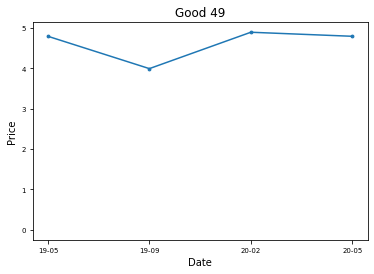

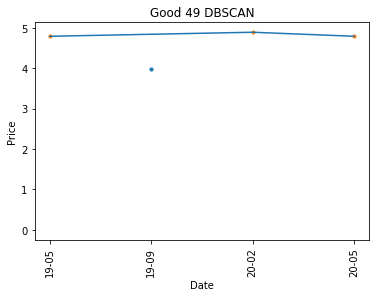

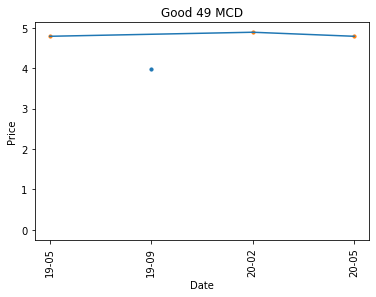

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (4). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


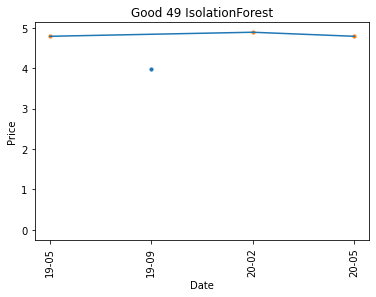

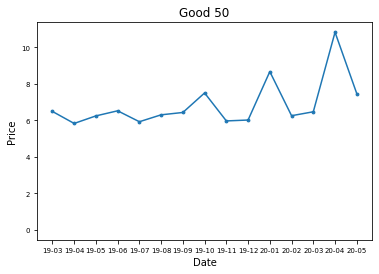

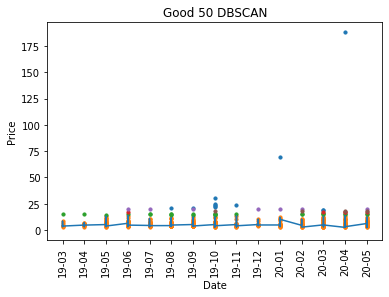

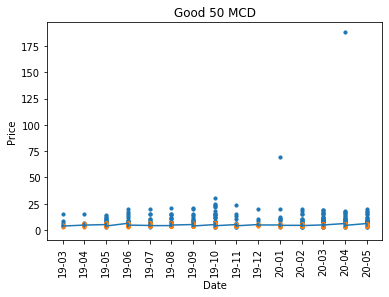

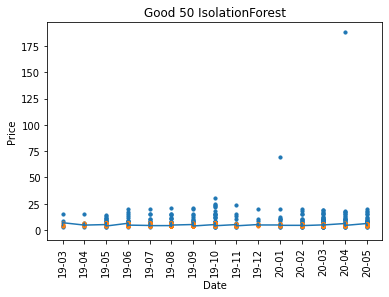

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (8). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


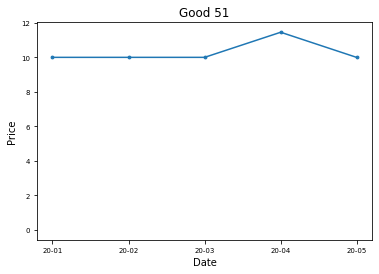

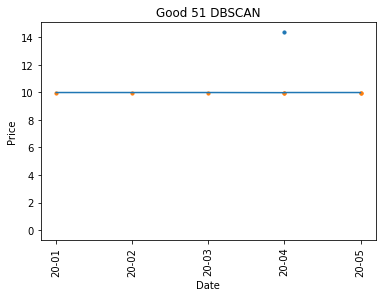

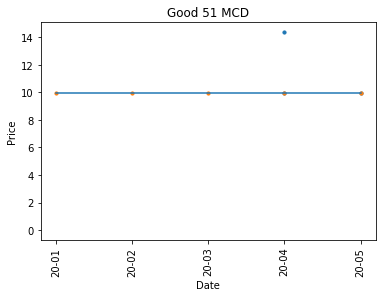

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (8). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


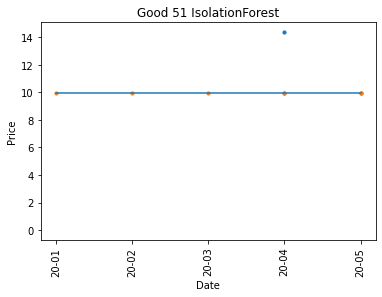

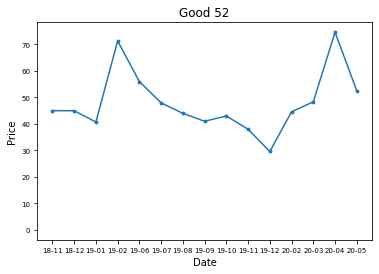

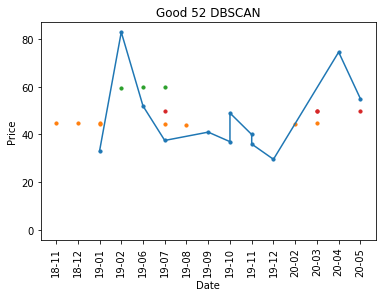

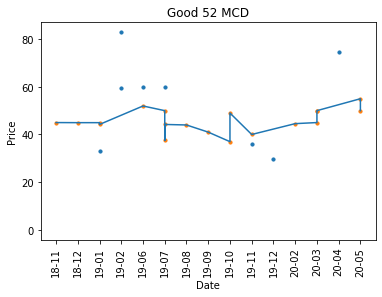

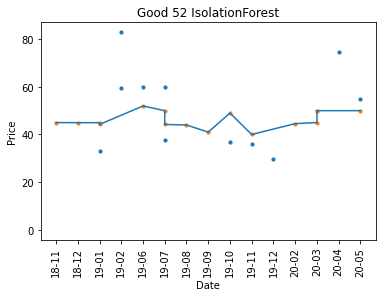

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (2). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


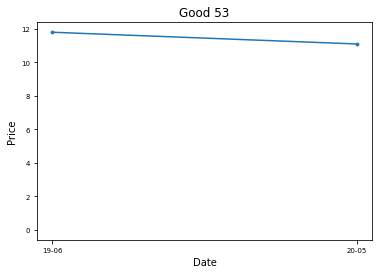

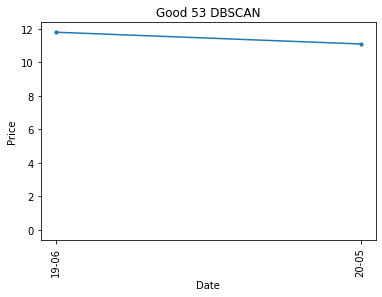

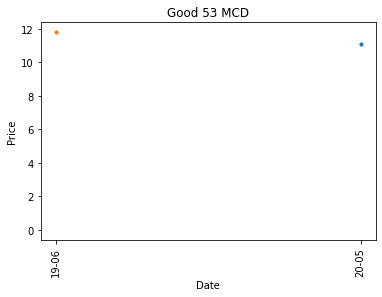

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (2). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


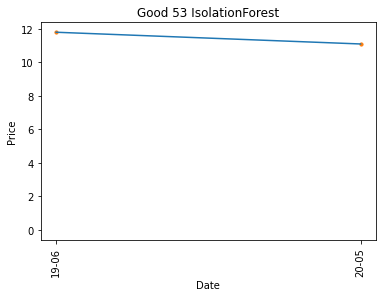

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (9). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


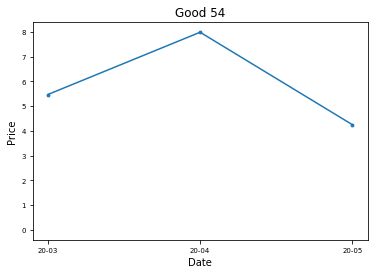

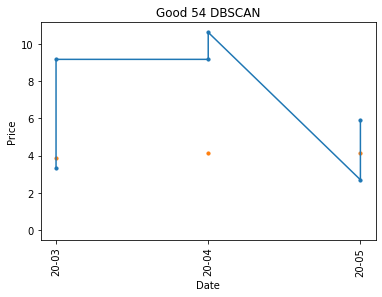

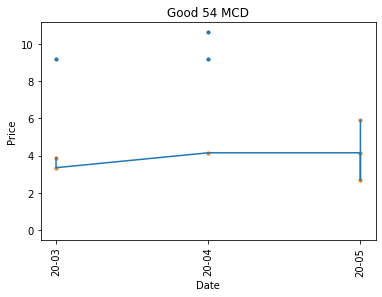

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (9). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


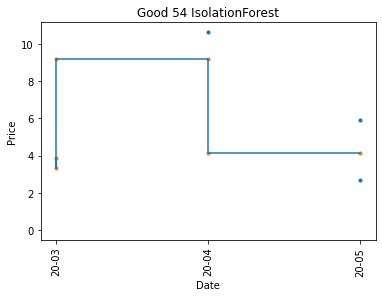

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (8). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


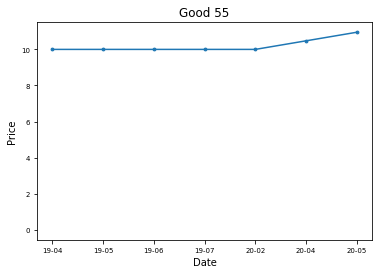

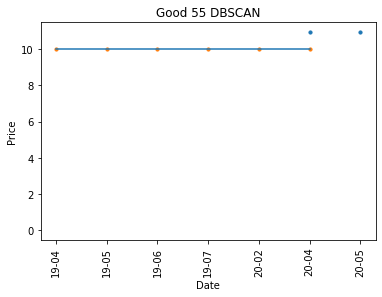

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (8). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


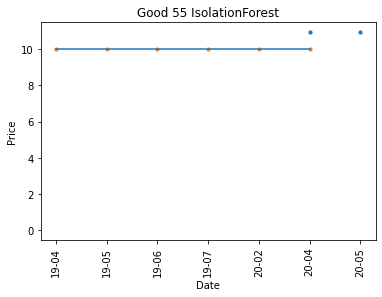

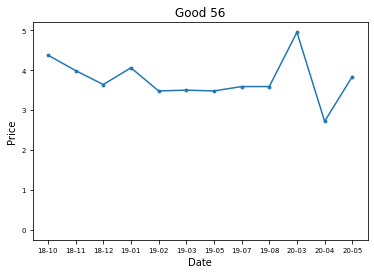

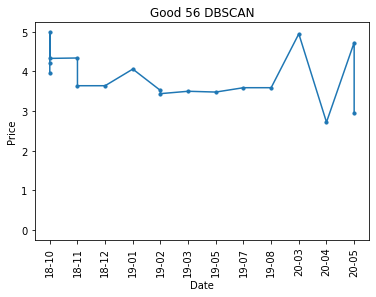

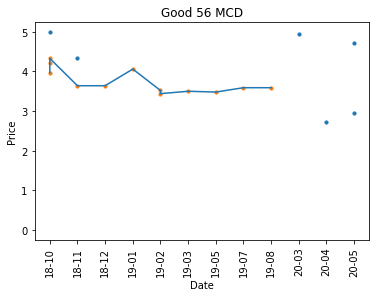

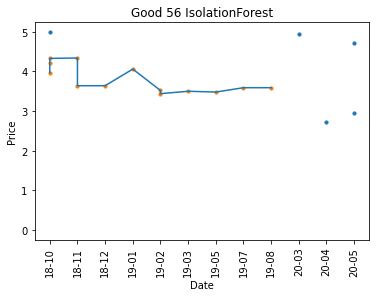

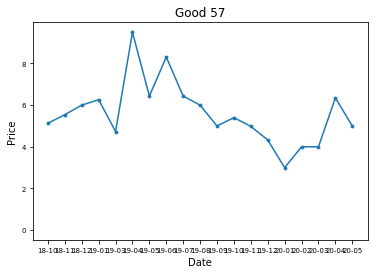

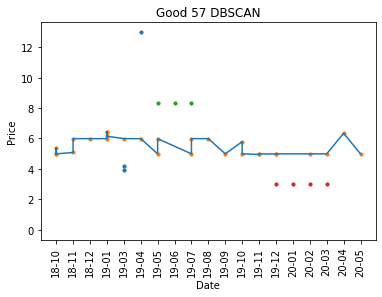

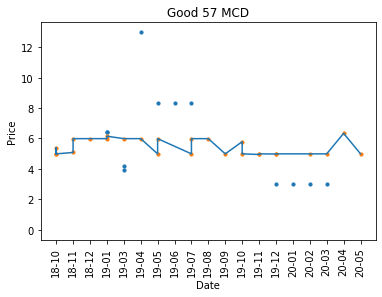

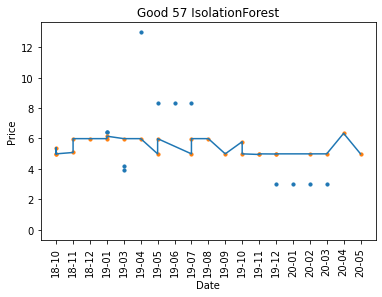

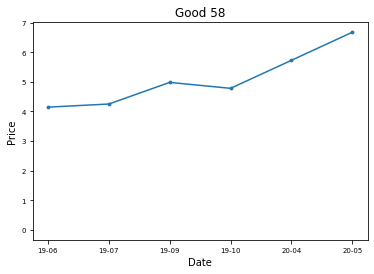

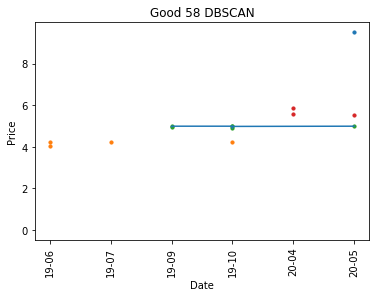

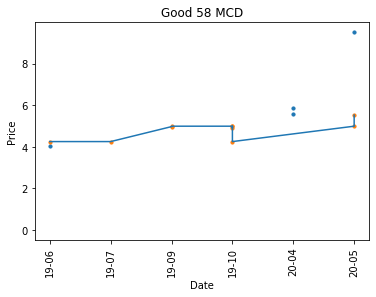

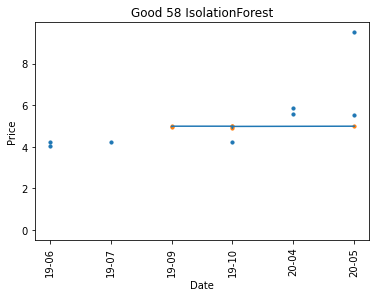

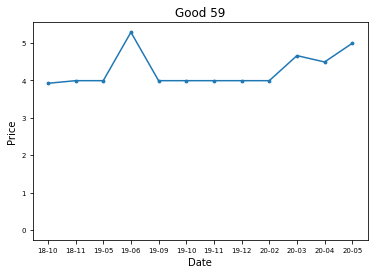

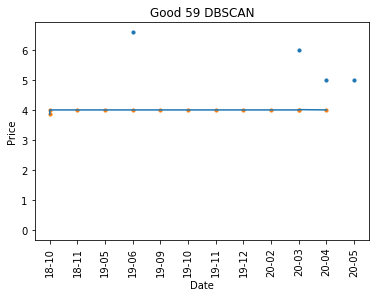

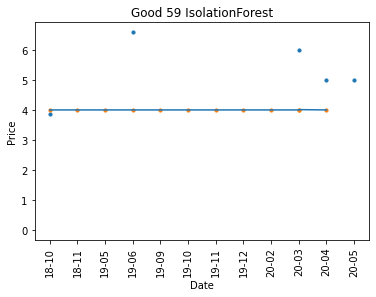

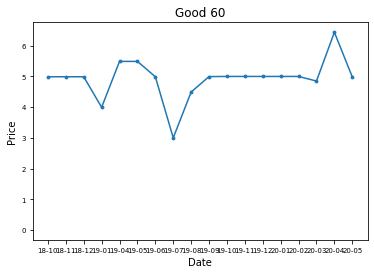

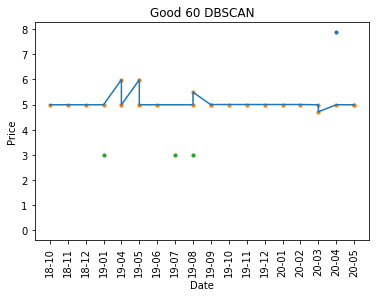

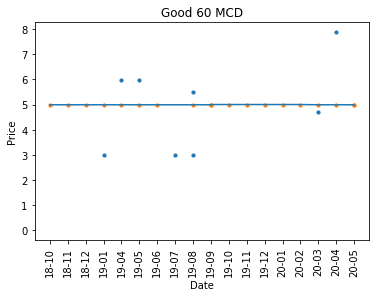

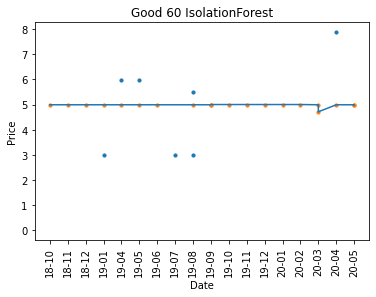

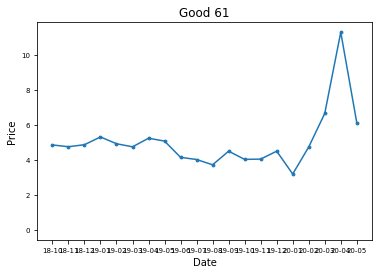

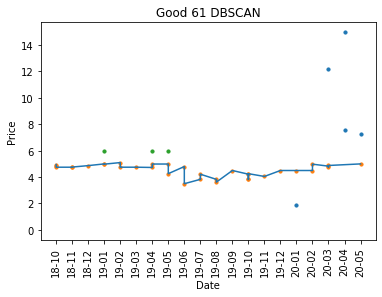

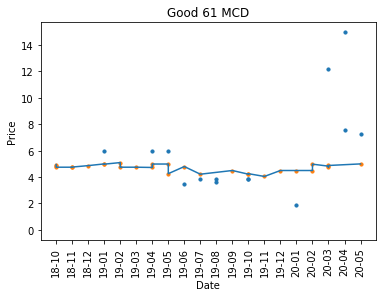

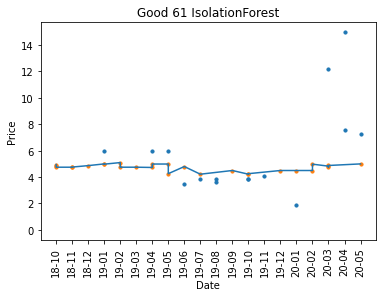

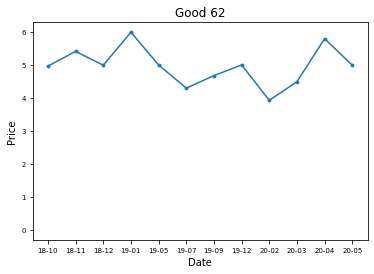

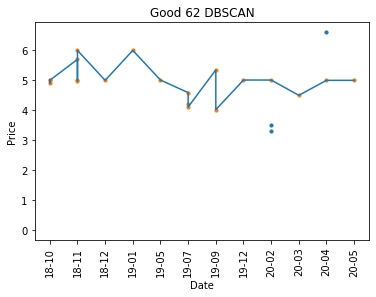

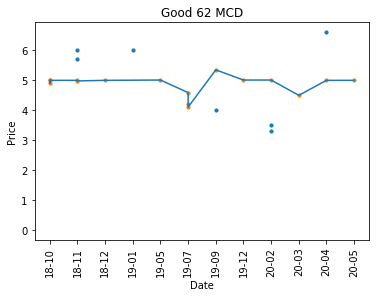

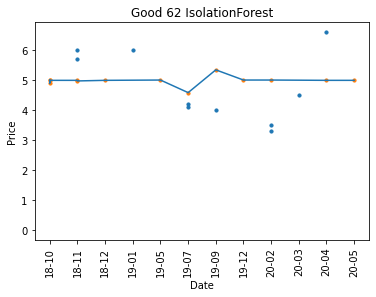

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (4). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


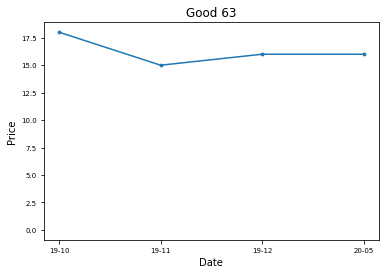

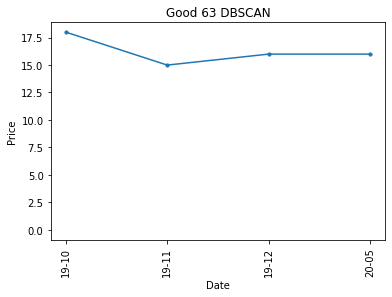

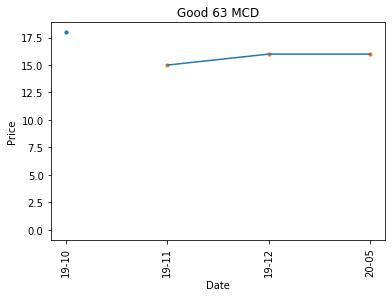

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (4). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


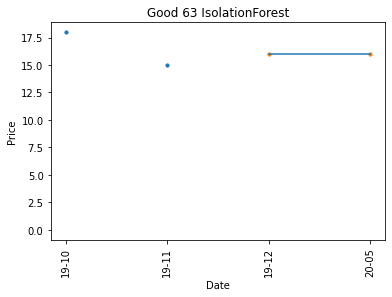

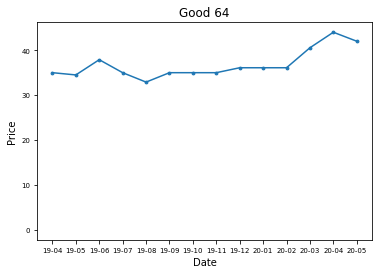

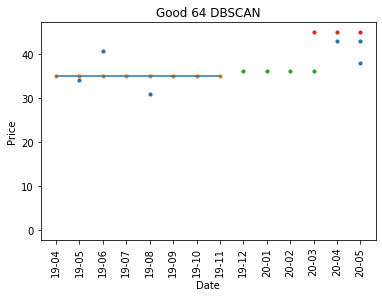

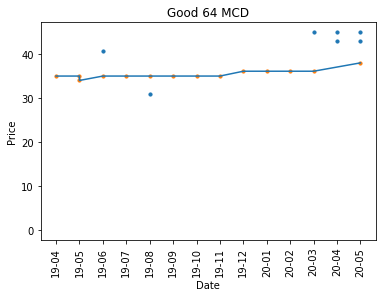

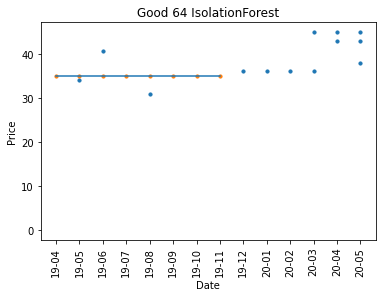

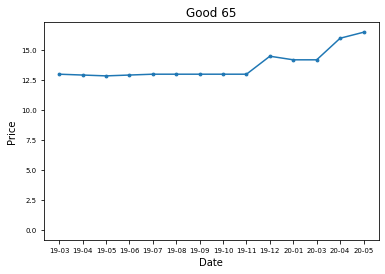

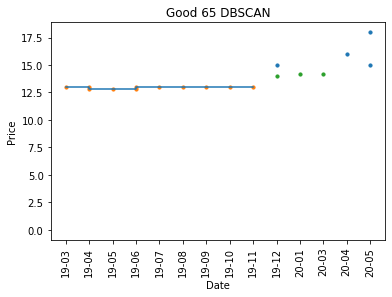

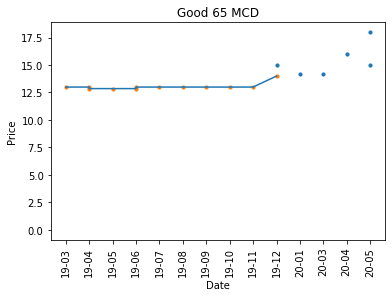

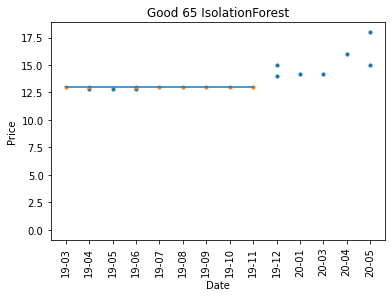

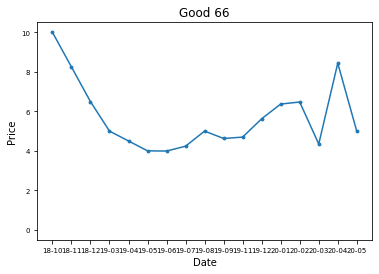

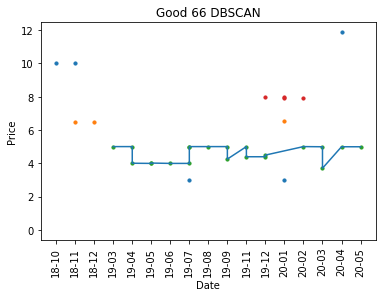

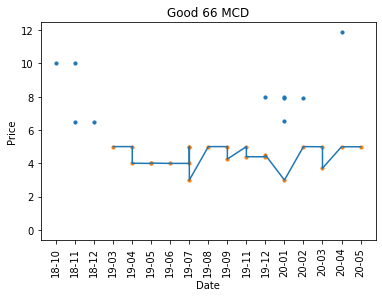

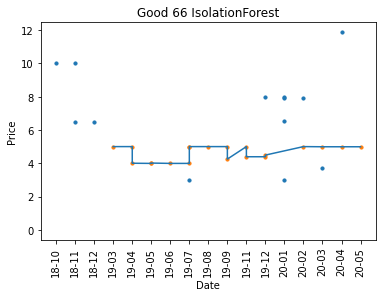

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (3). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


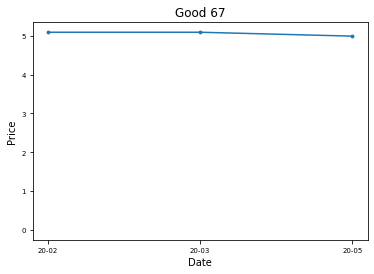

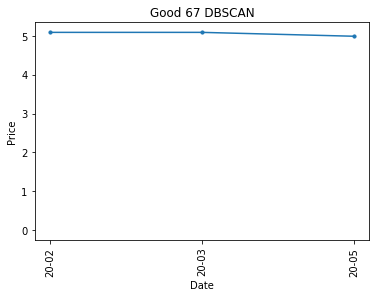

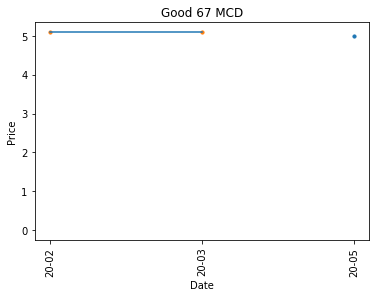

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (3). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


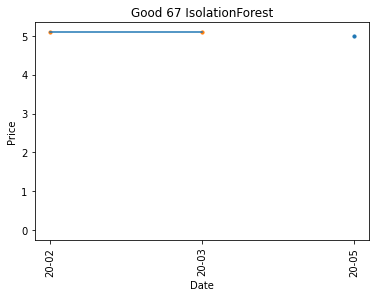

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (5). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


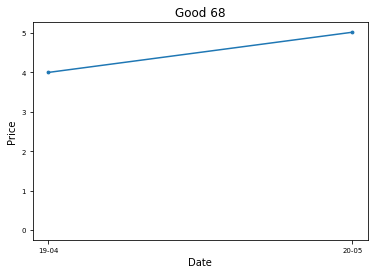

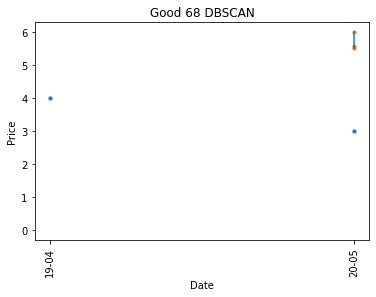

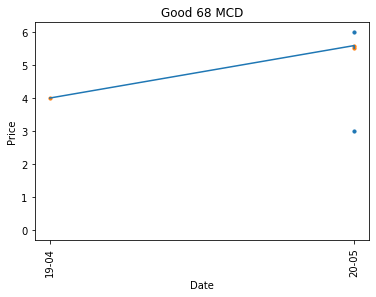

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (5). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


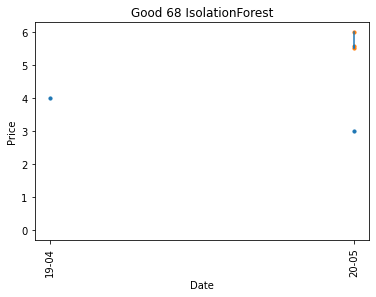

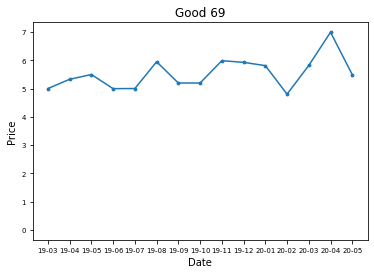

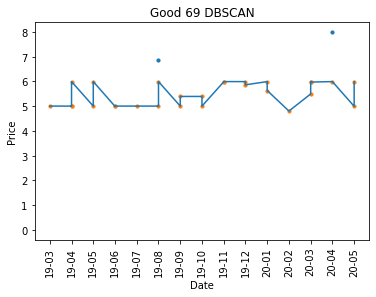

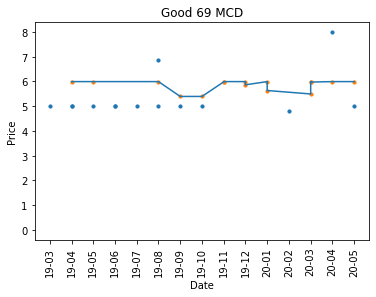

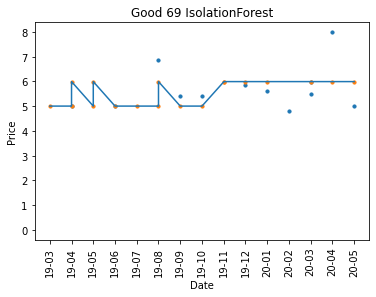

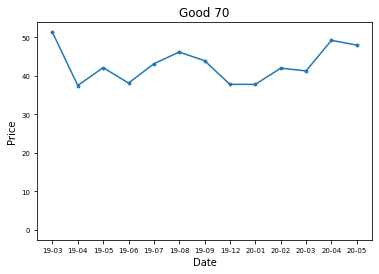

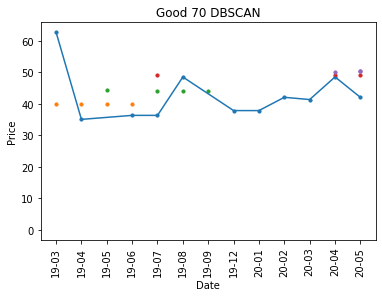

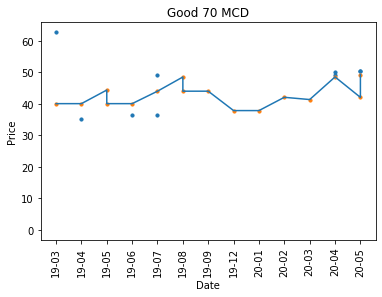

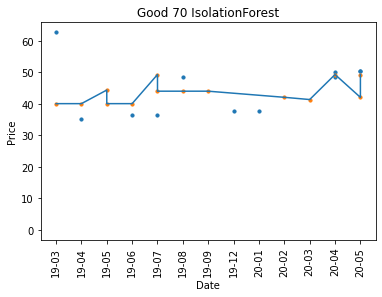

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (6). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


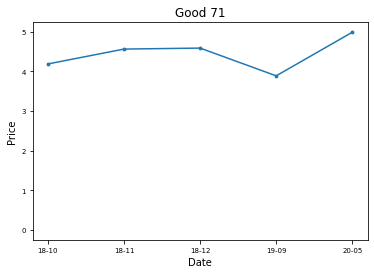

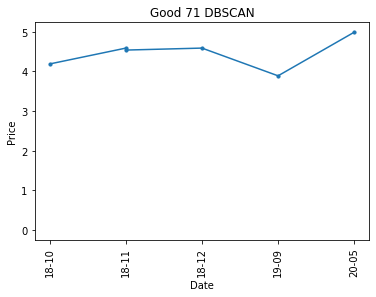

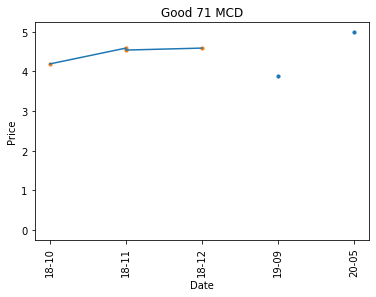

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (6). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


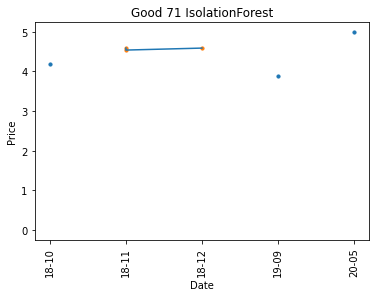

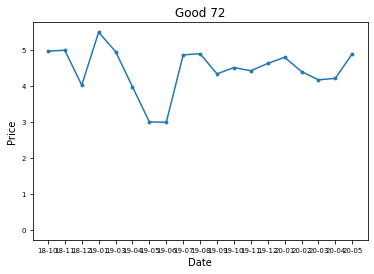

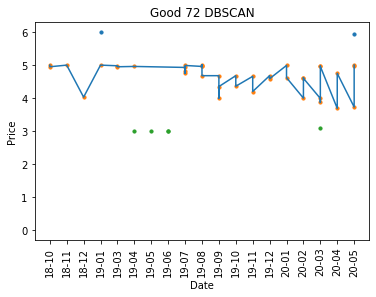

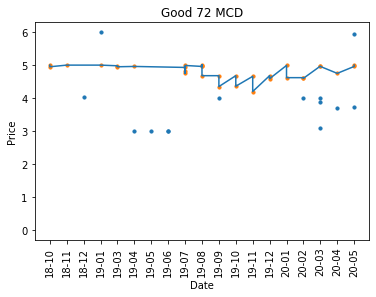

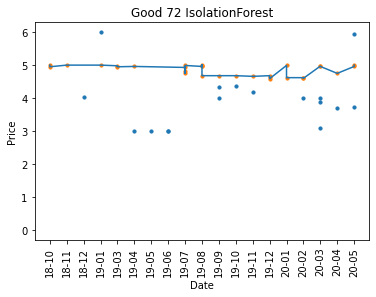

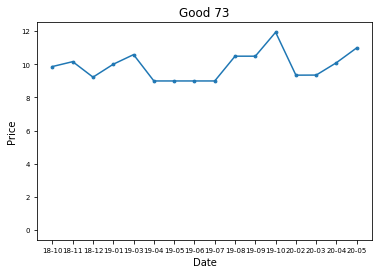

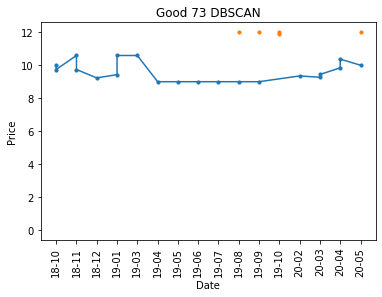

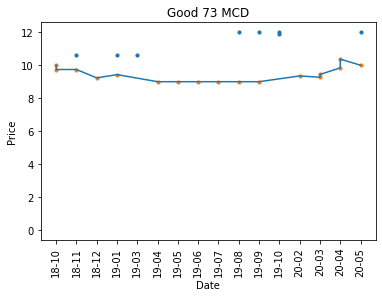

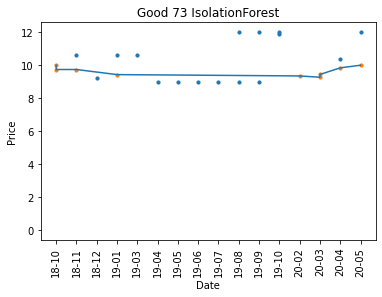

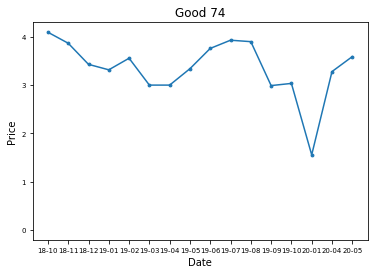

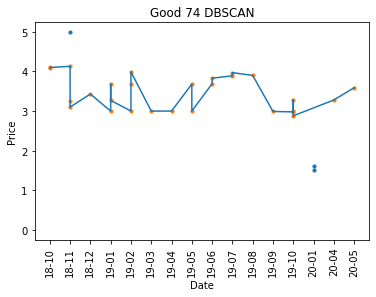

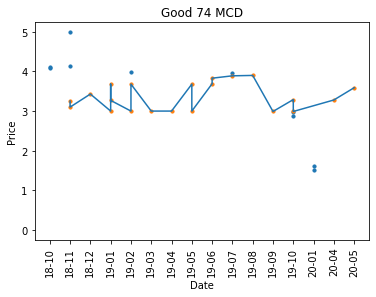

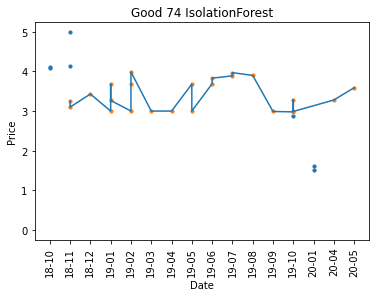

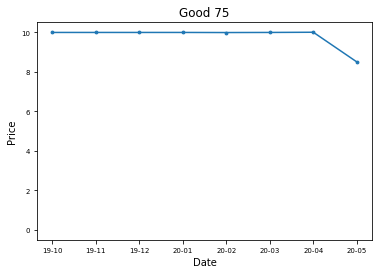

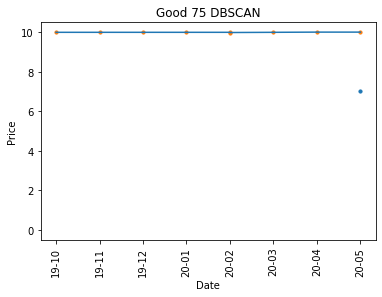

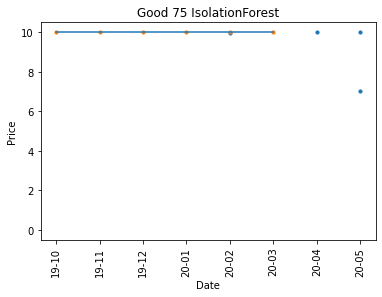

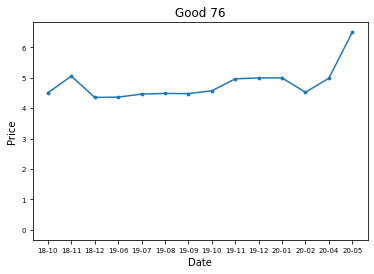

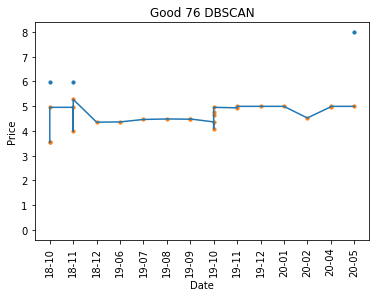

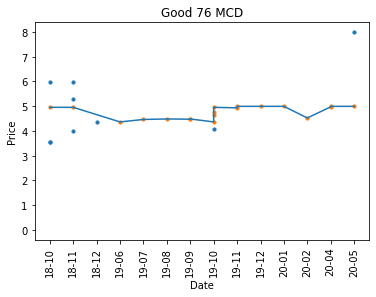

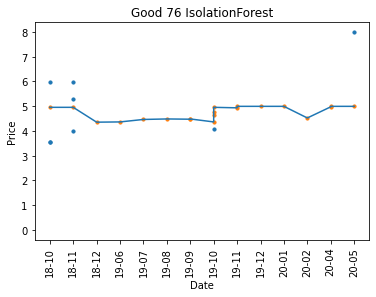

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (7). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


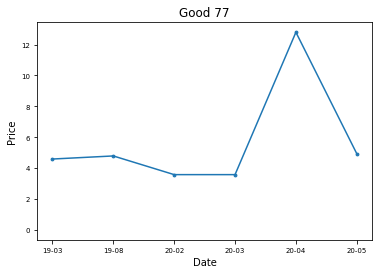

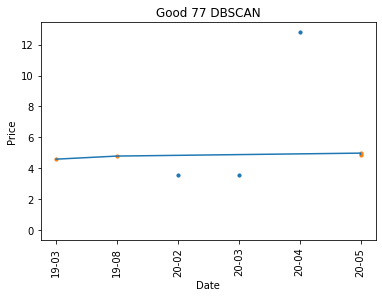

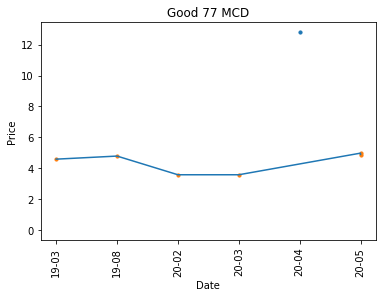

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (7). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


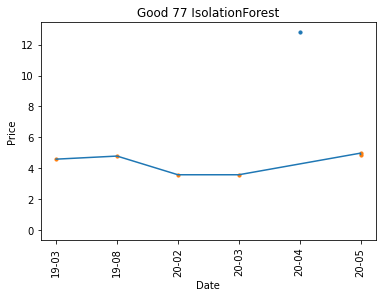

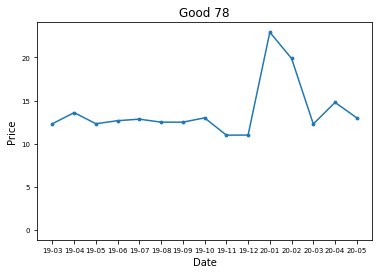

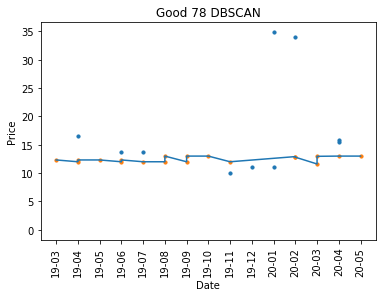

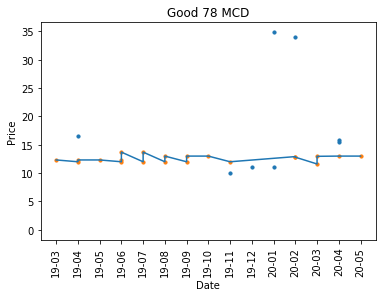

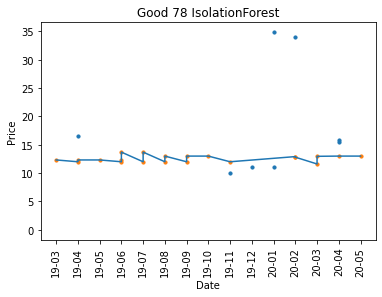

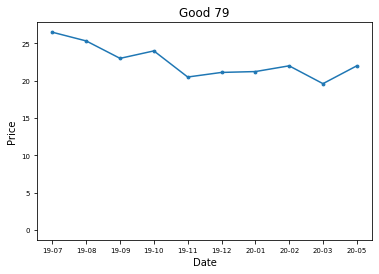

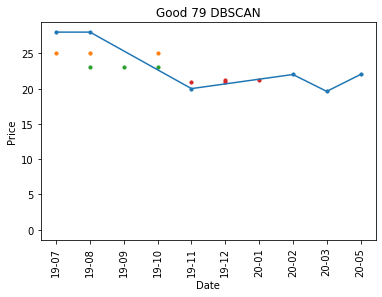

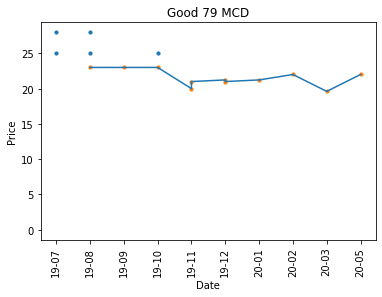

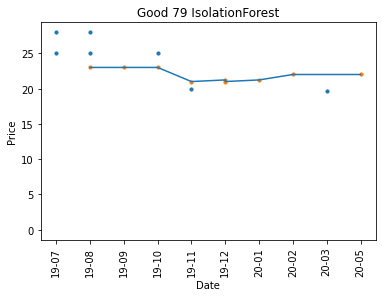

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (7). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


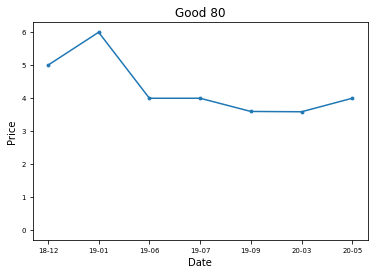

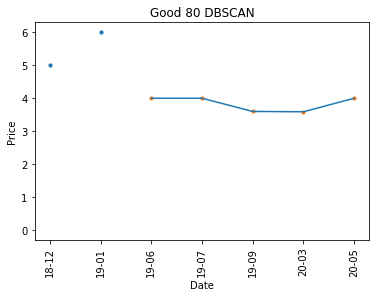

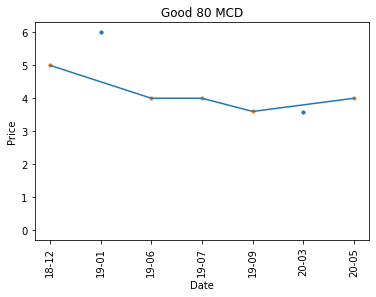

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (7). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


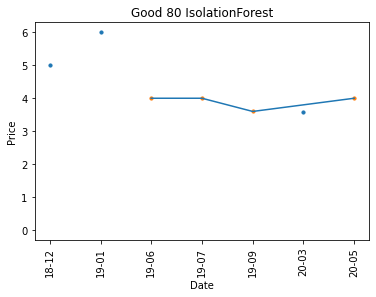

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (4). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


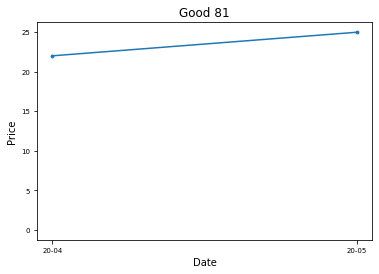

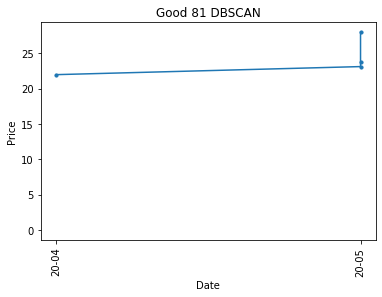

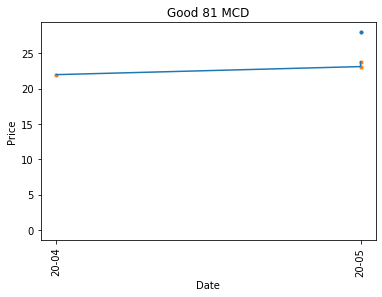

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (4). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


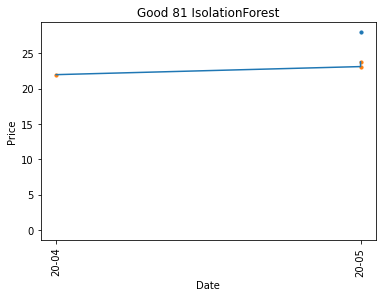

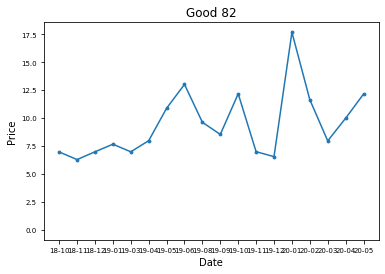

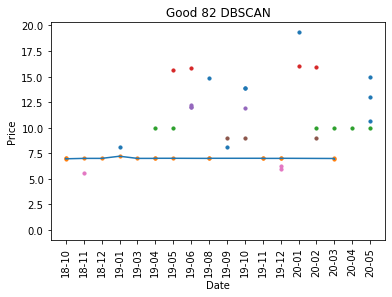

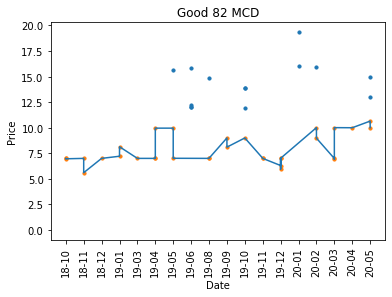

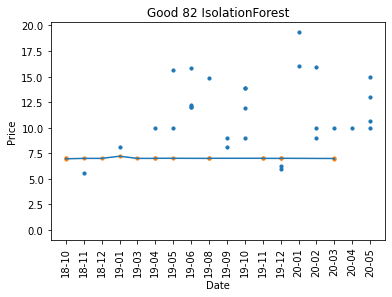

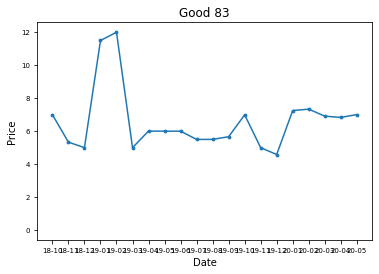

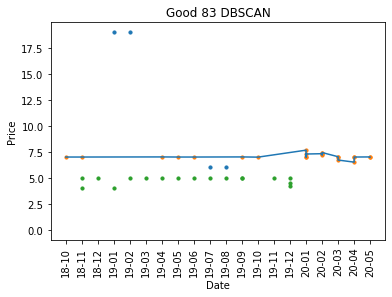

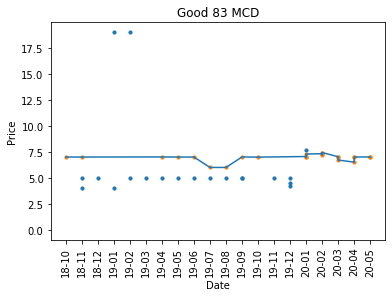

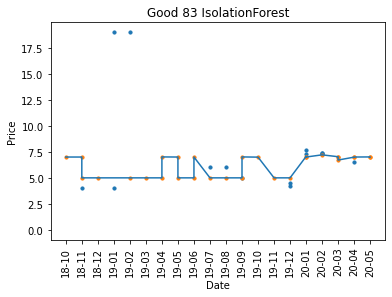

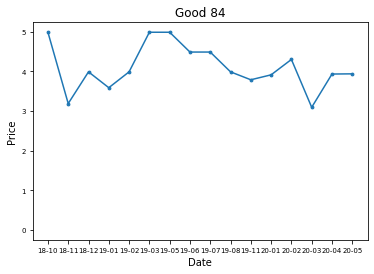

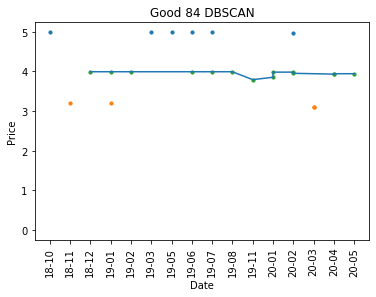

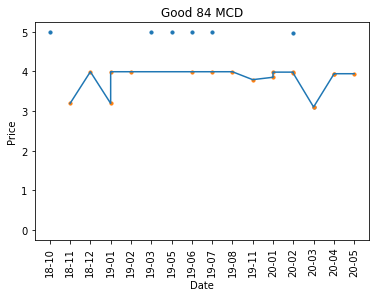

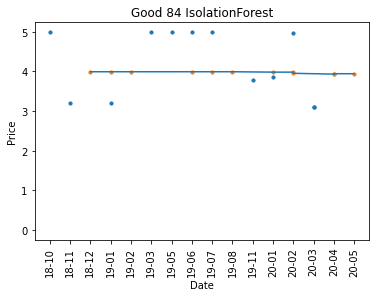

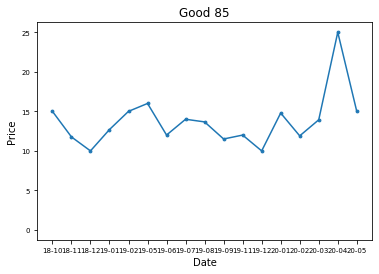

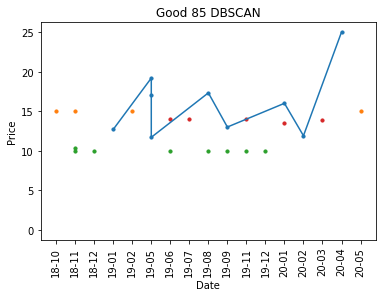

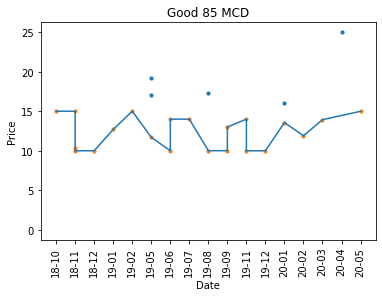

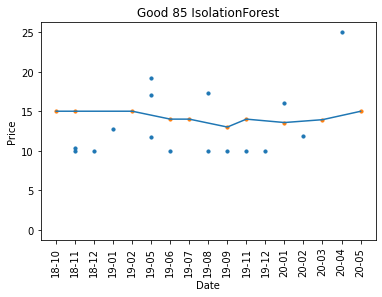

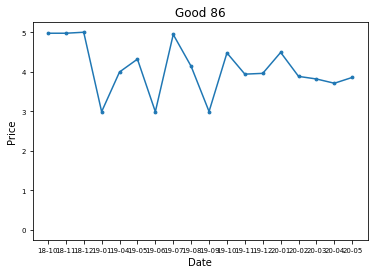

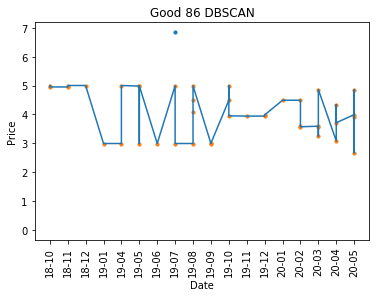

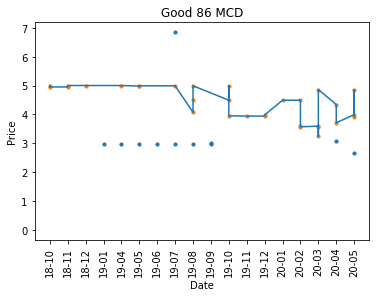

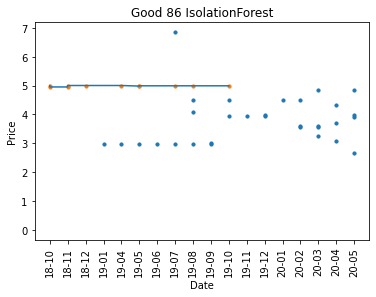

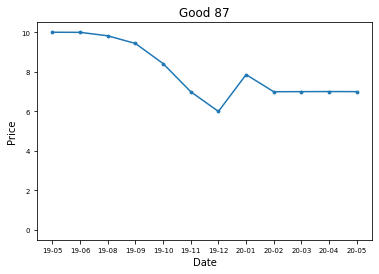

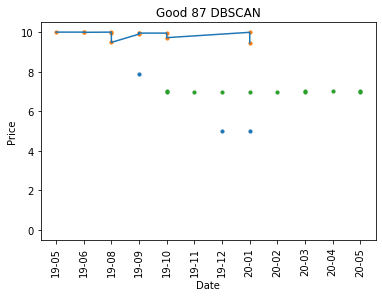

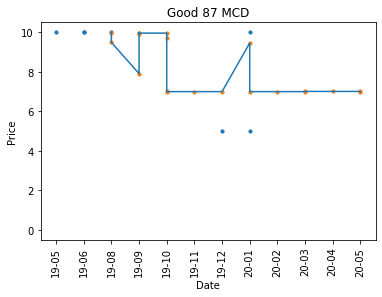

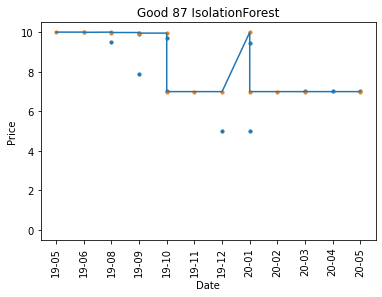

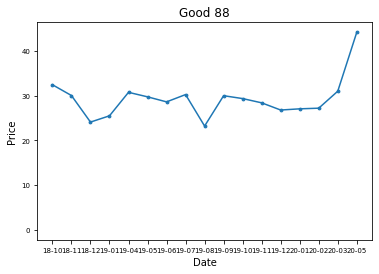

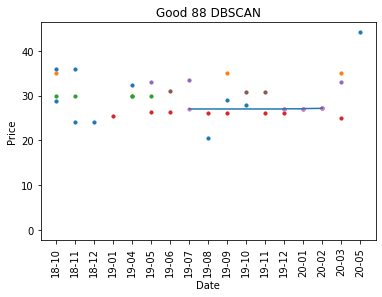

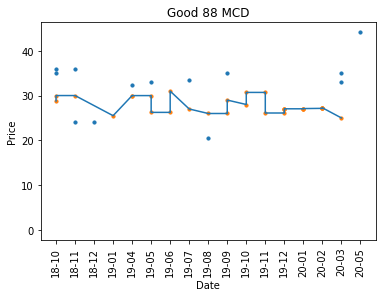

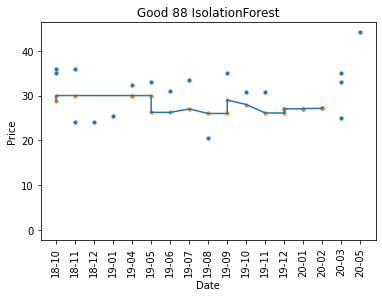

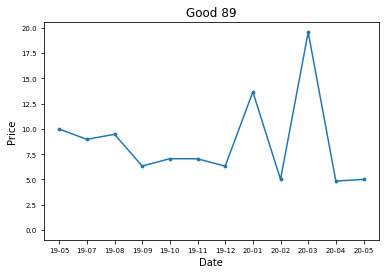

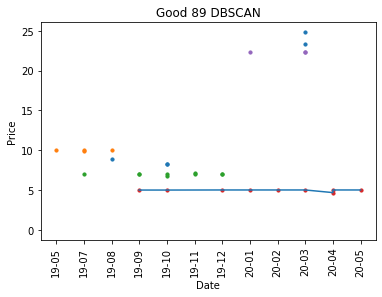

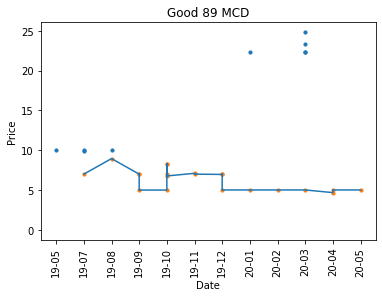

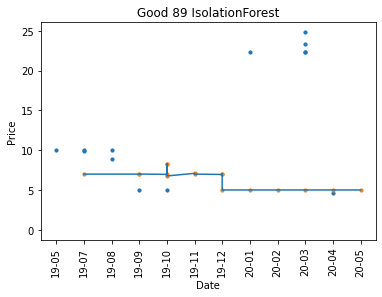

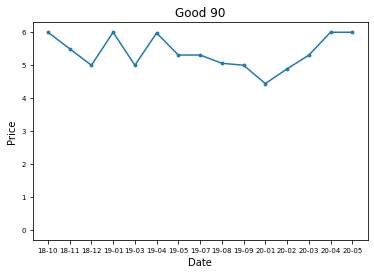

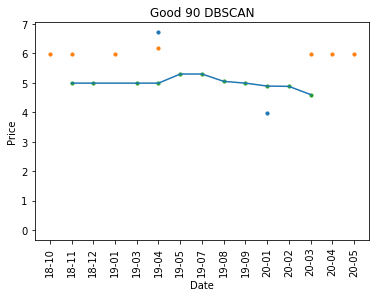

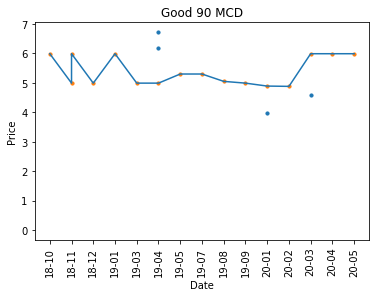

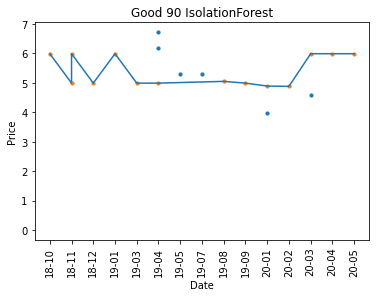

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (3). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


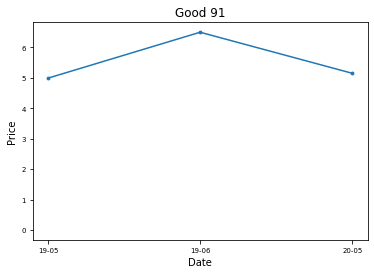

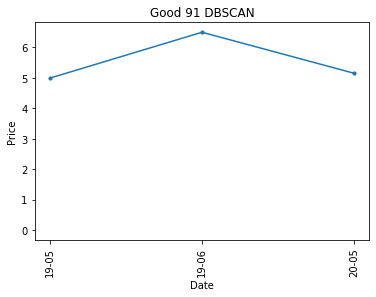

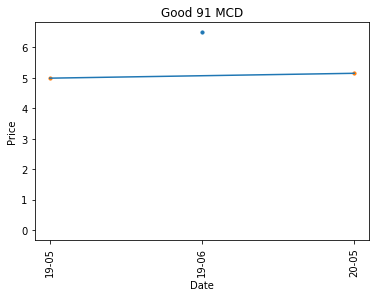

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (3). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


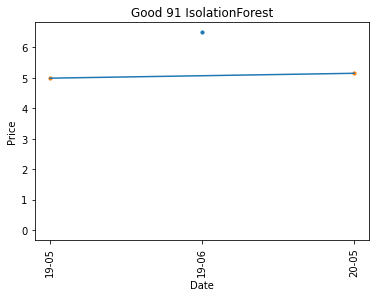

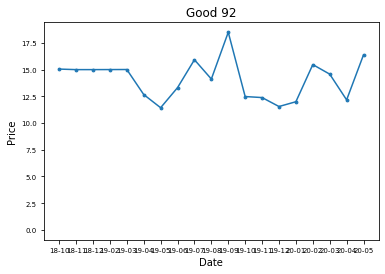

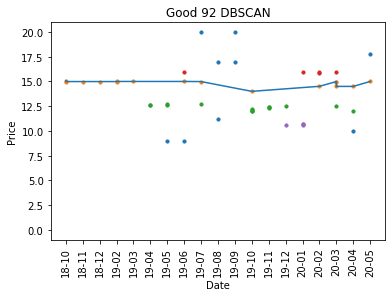

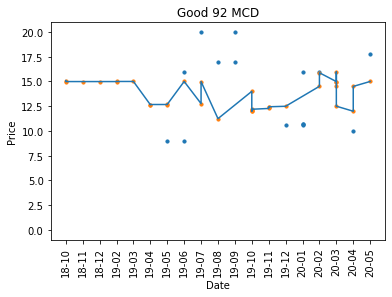

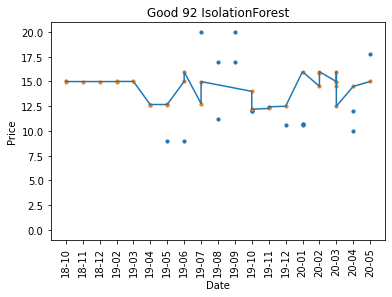

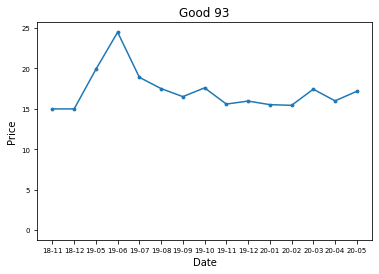

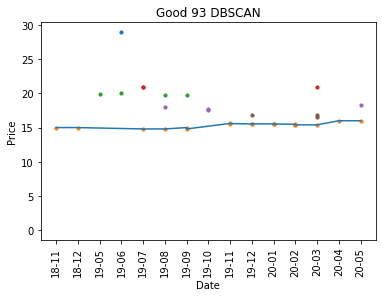

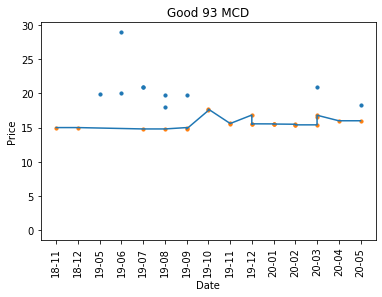

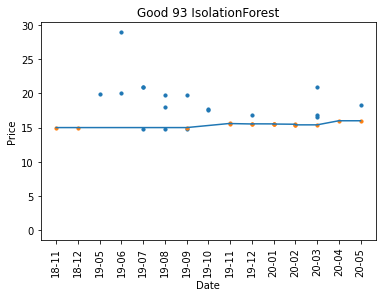

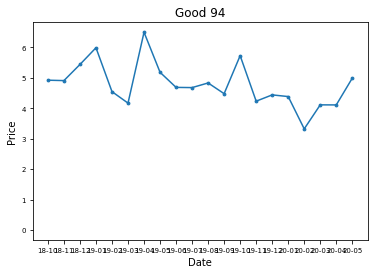

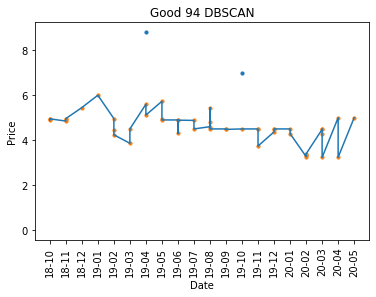

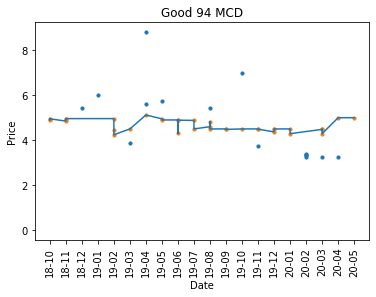

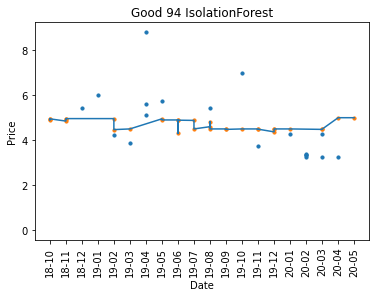

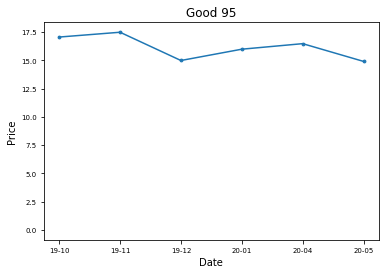

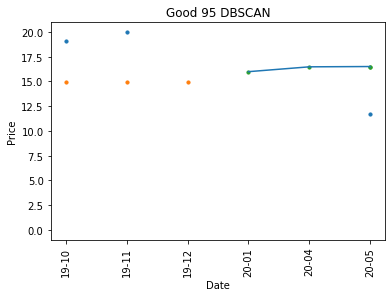

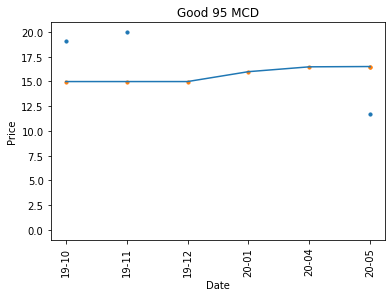

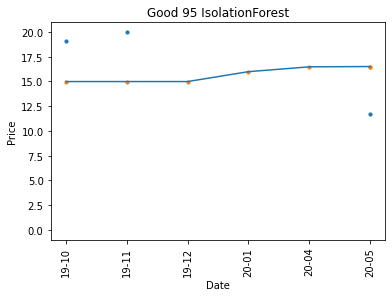

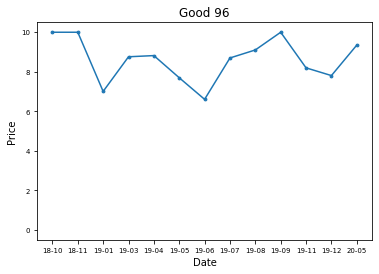

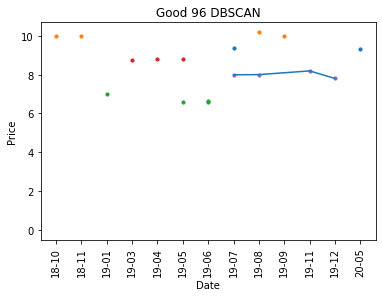

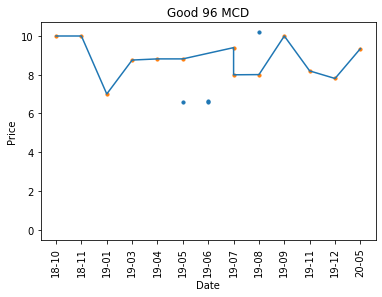

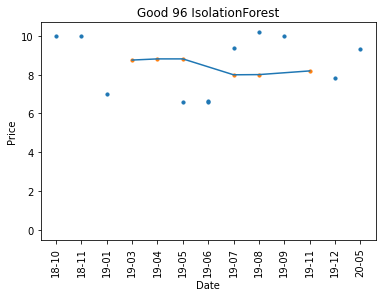

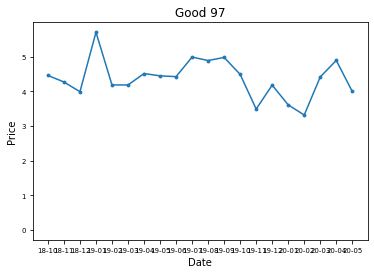

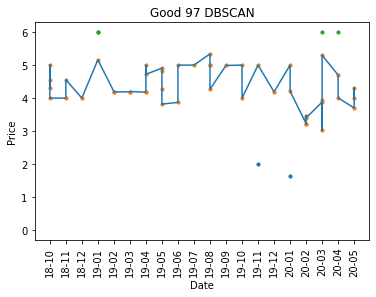

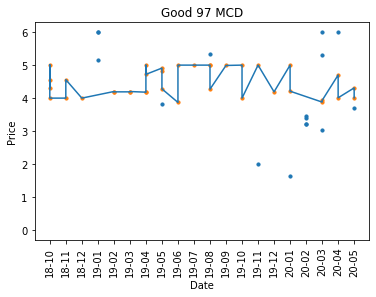

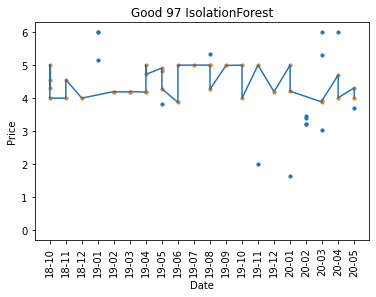

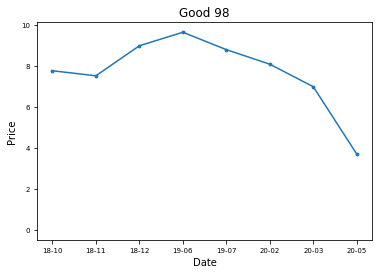

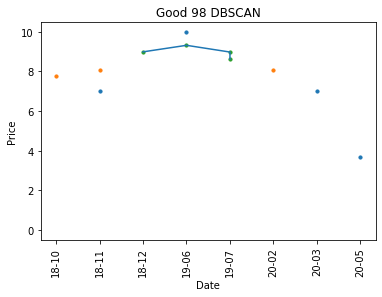

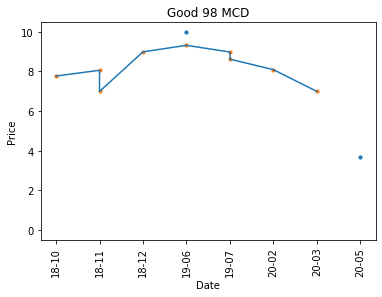

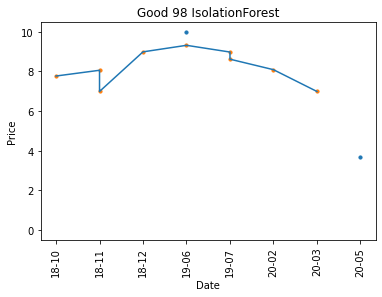

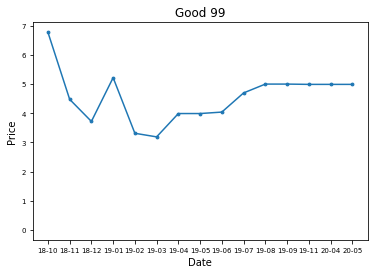

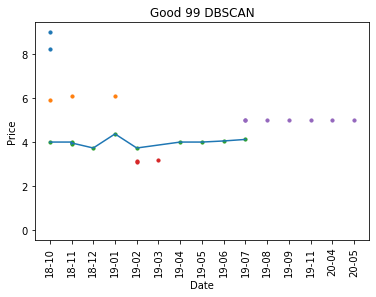

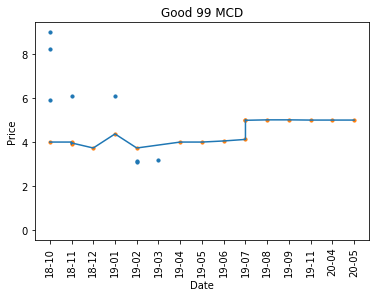

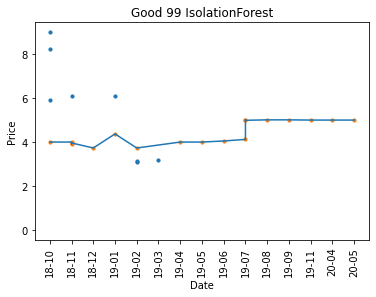

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (1). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


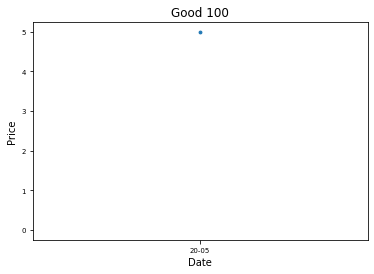

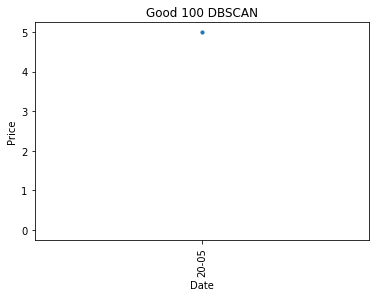

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (1). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


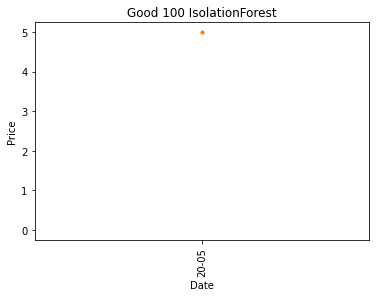

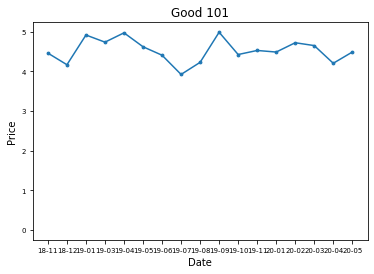

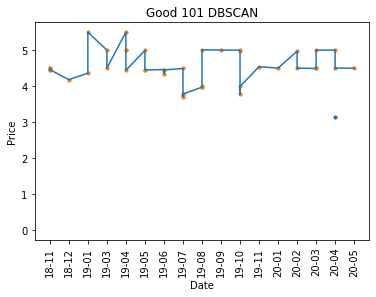

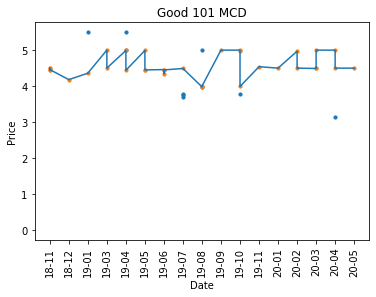

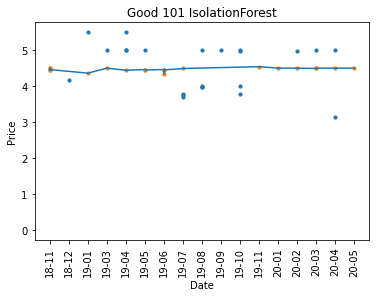

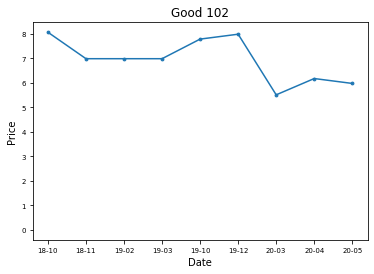

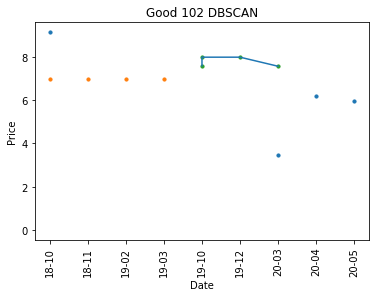

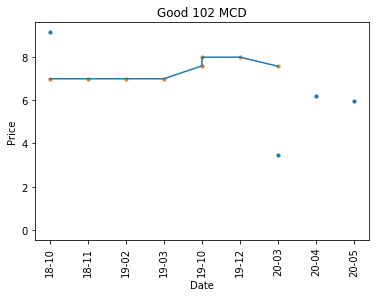

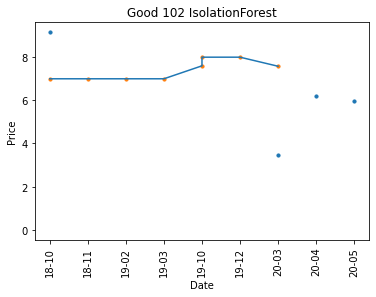

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (5). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


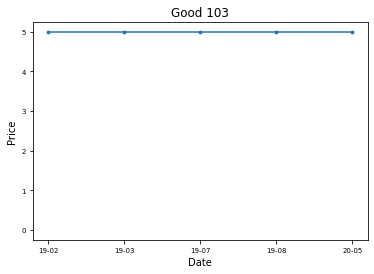

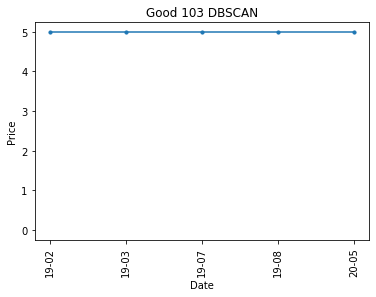

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (5). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


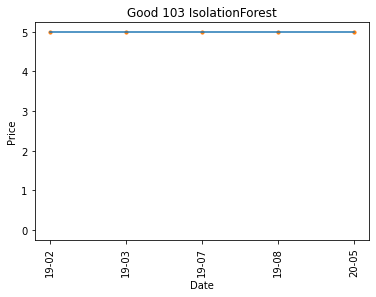

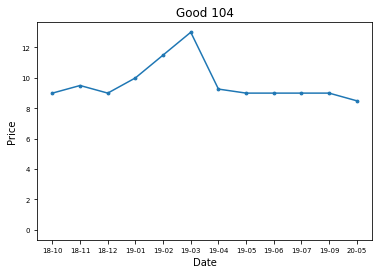

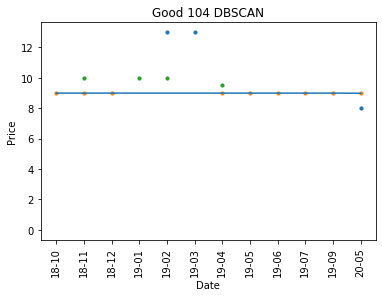

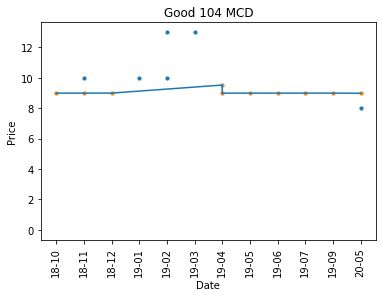

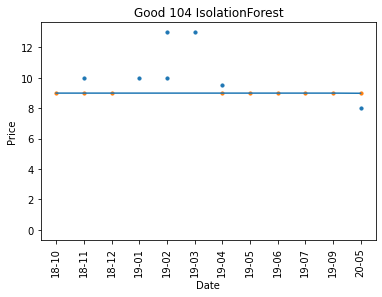

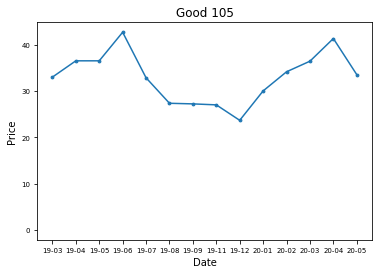

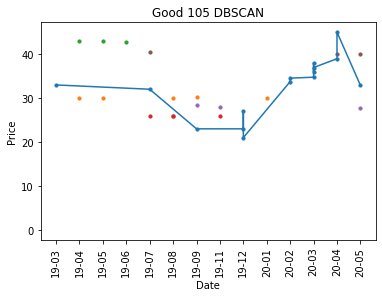

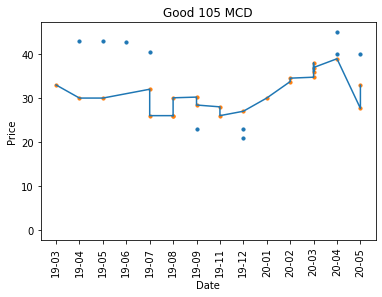

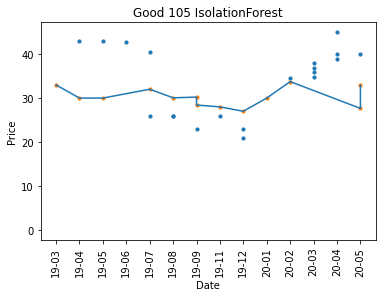

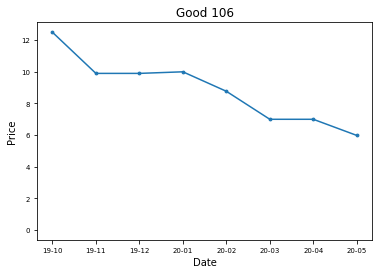

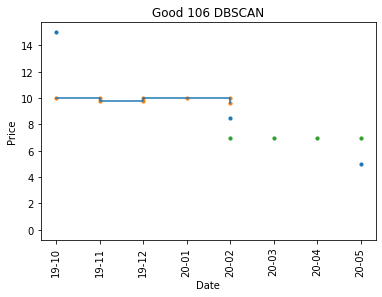

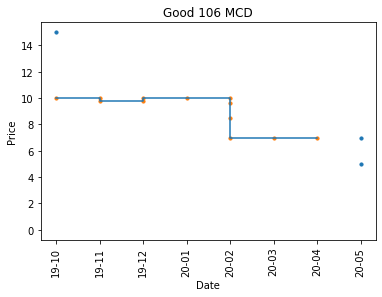

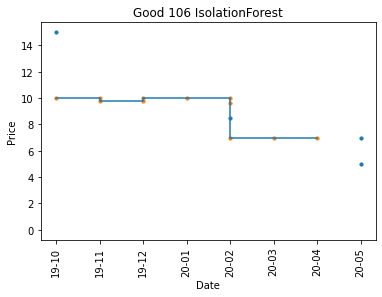

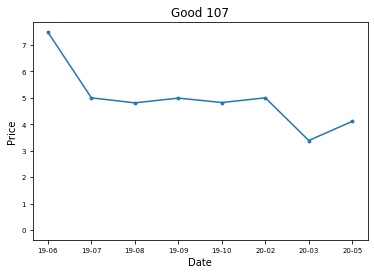

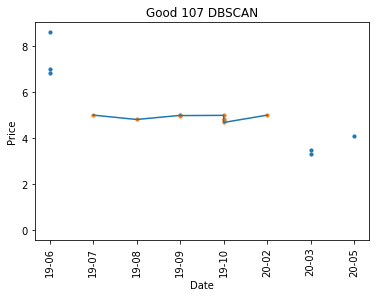

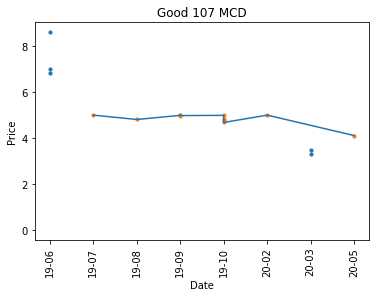

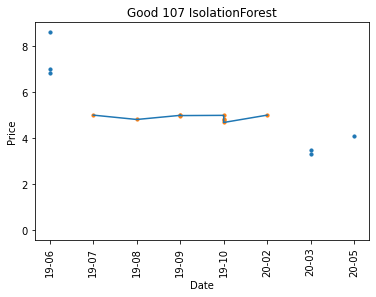

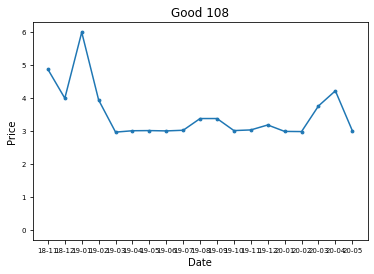

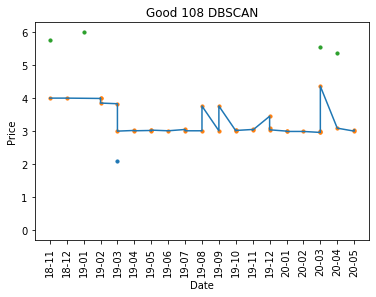

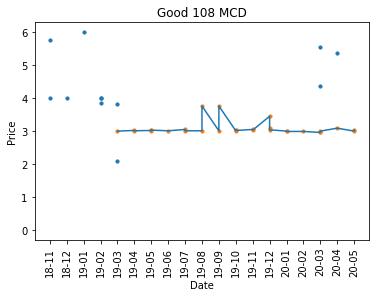

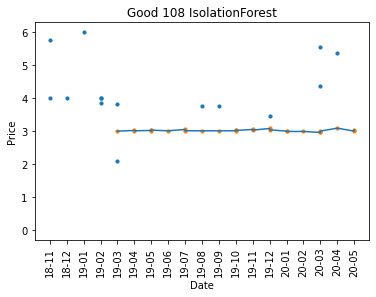

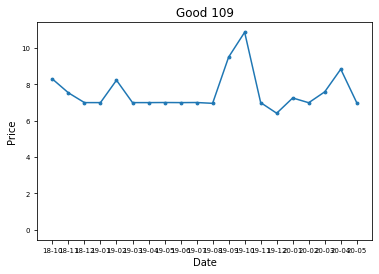

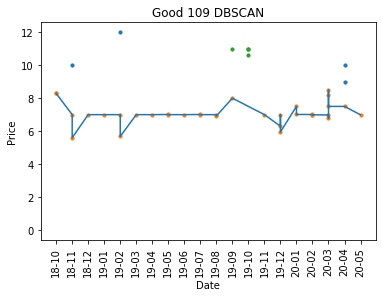

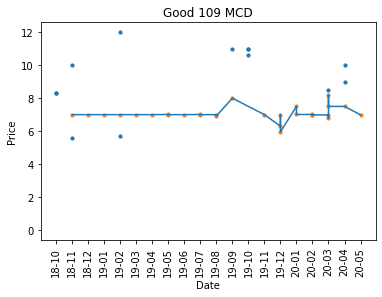

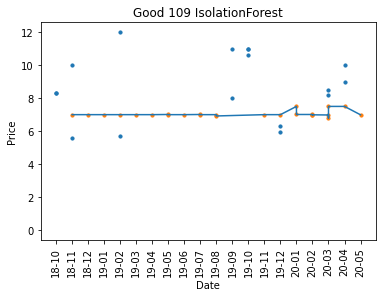

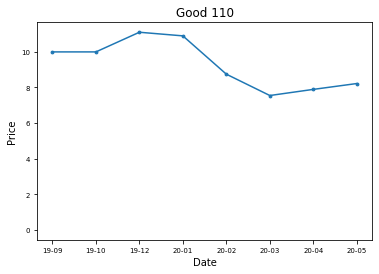

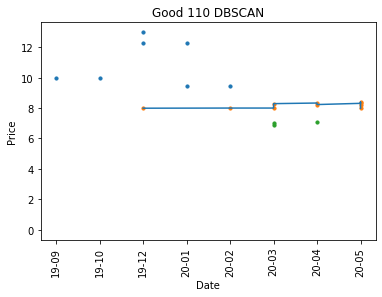

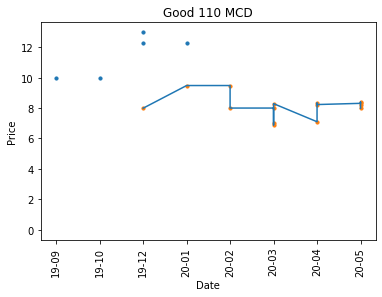

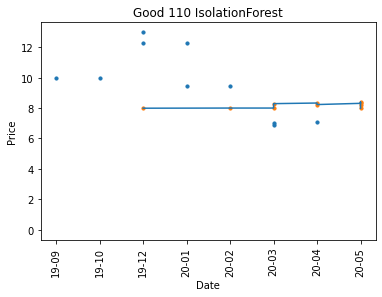

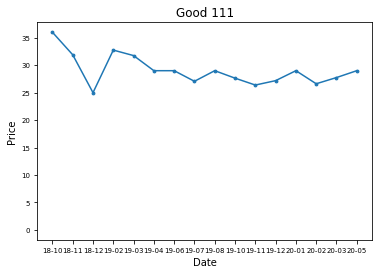

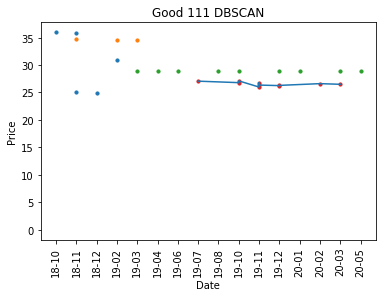

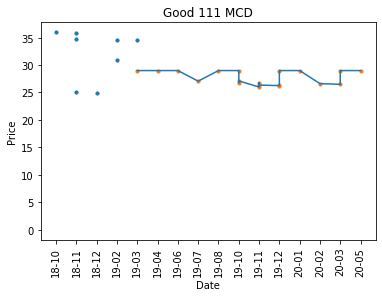

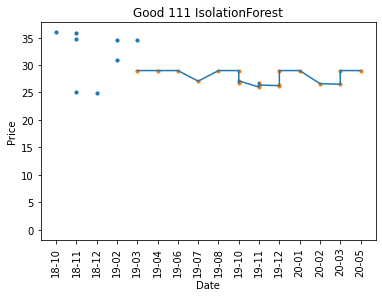

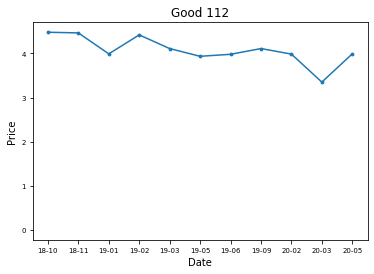

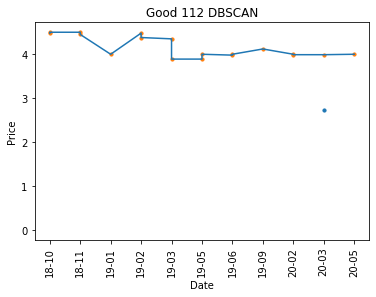

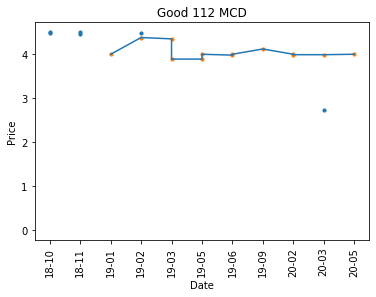

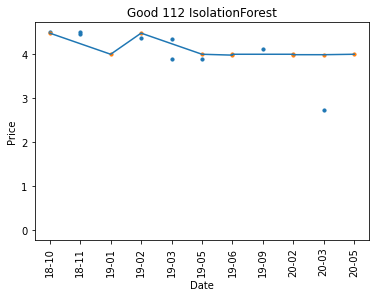

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (6). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


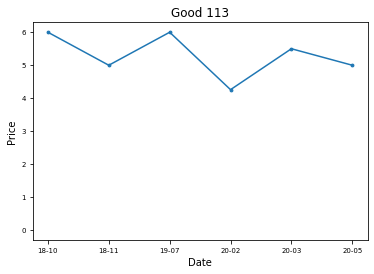

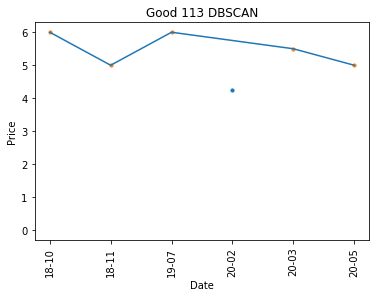

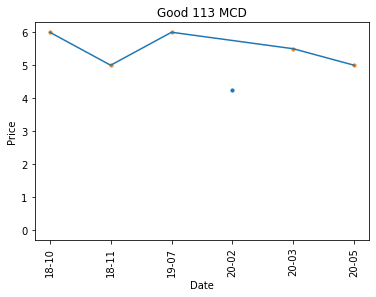

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (6). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


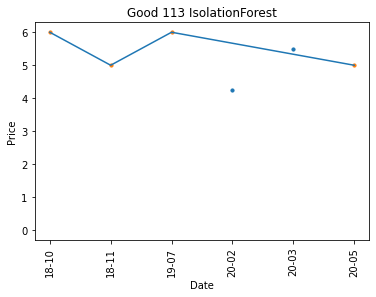

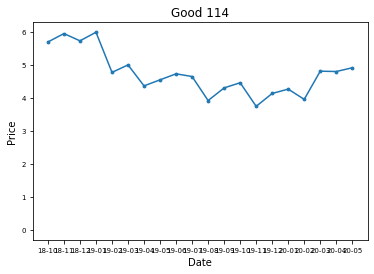

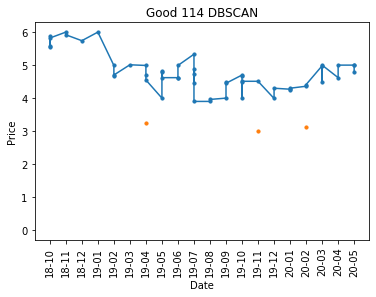

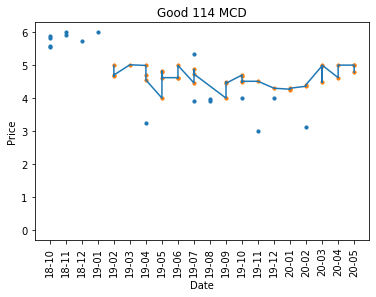

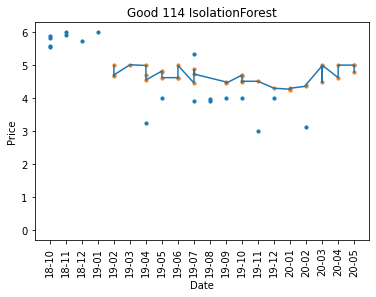

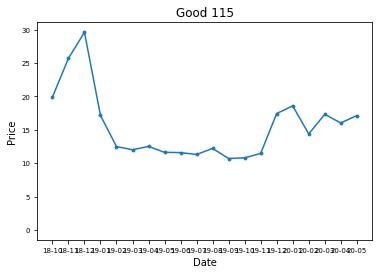

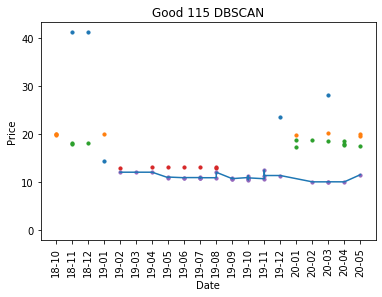

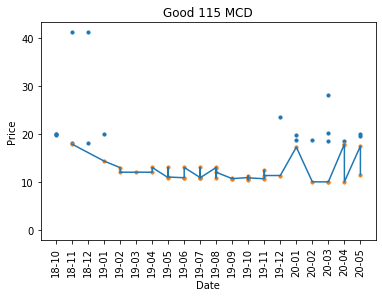

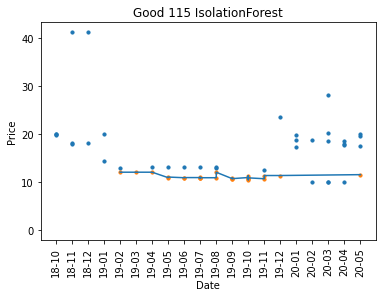

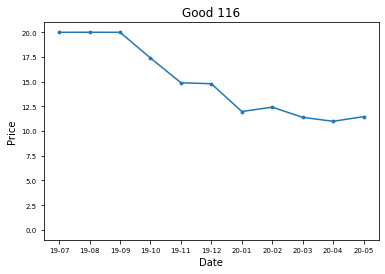

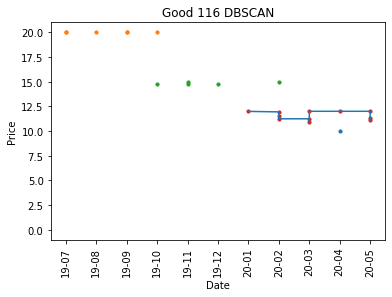

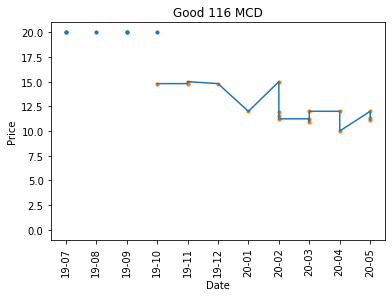

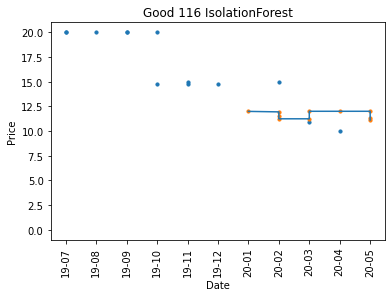

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (5). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


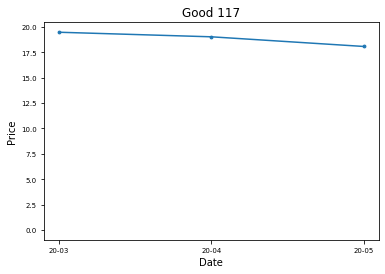

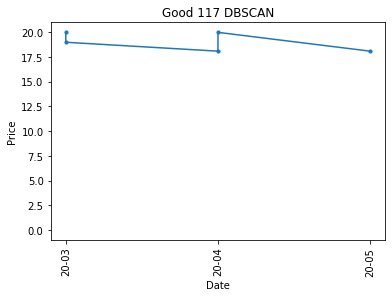

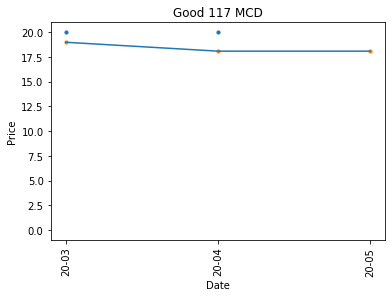

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (5). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


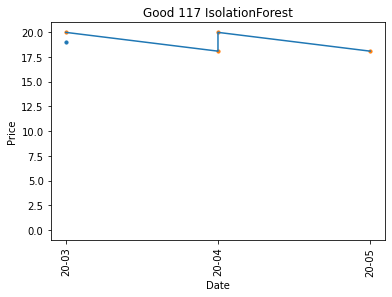

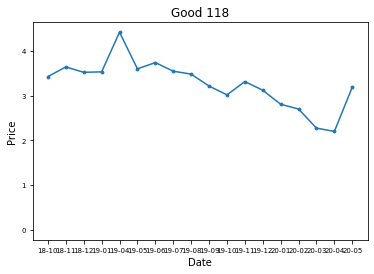

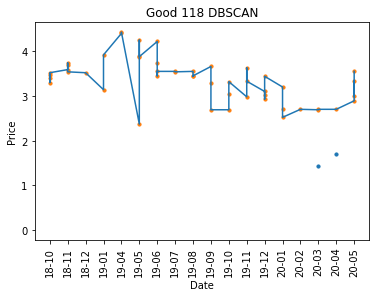

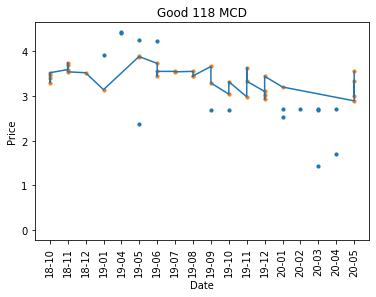

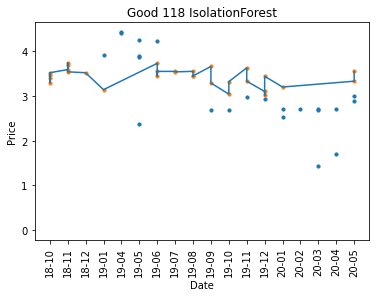

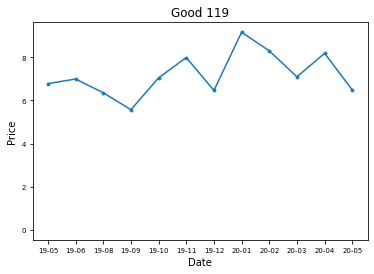

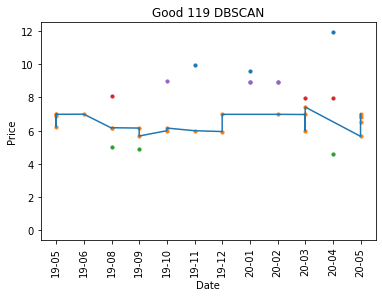

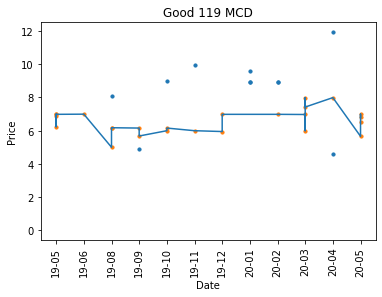

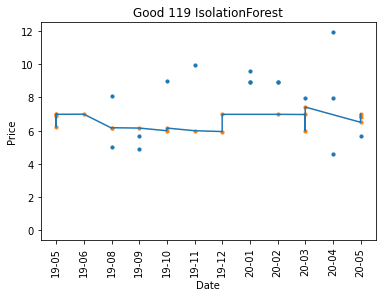

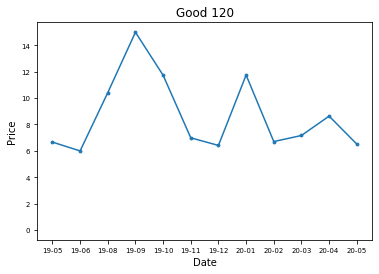

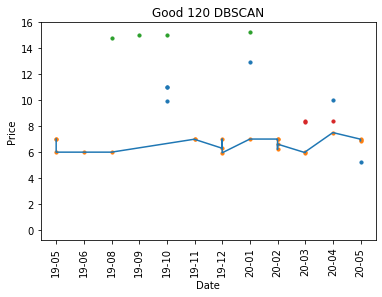

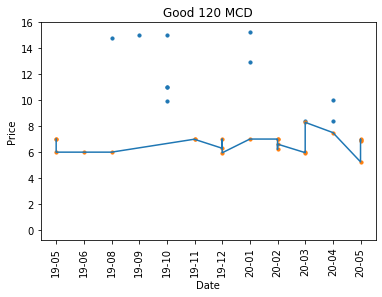

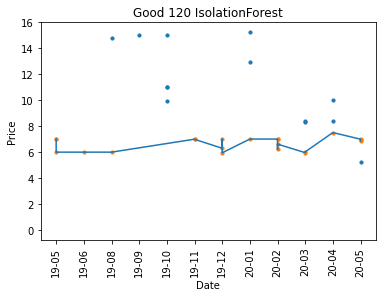

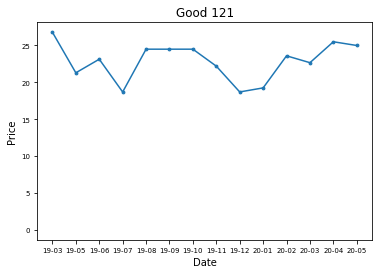

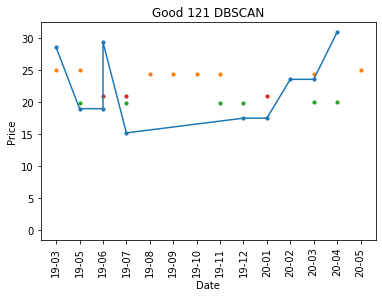

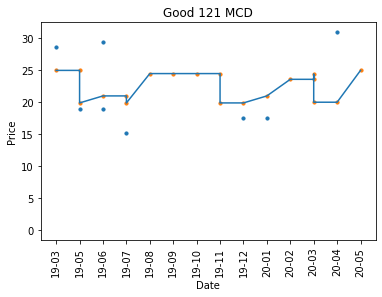

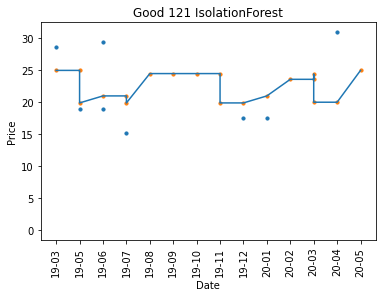

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (5). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


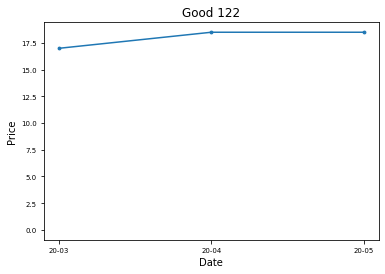

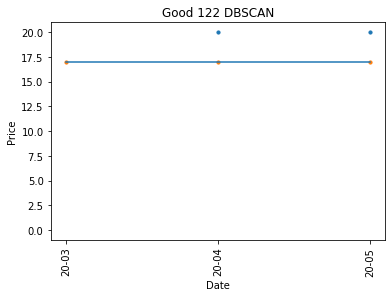

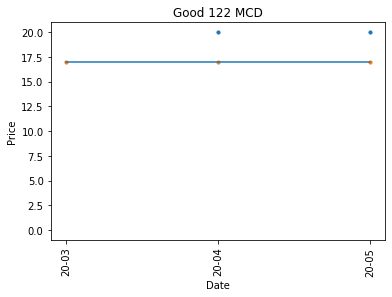

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (5). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


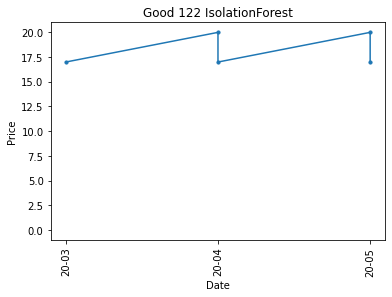

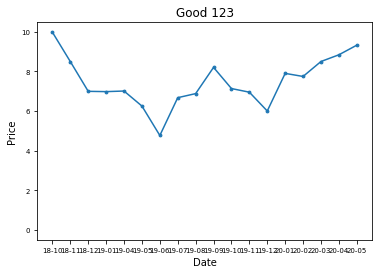

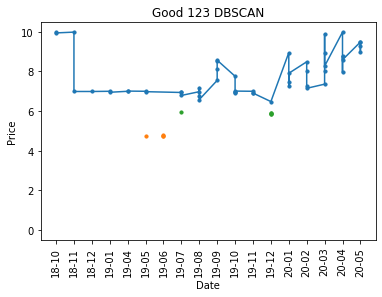

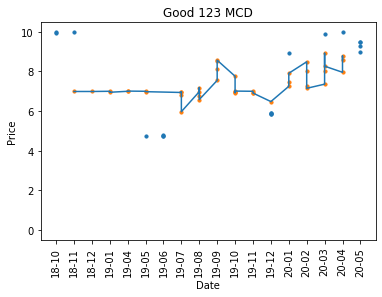

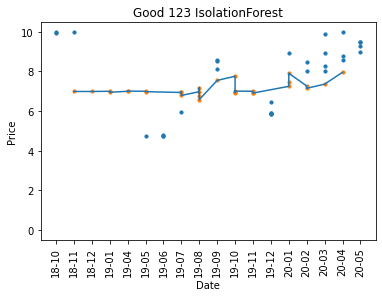

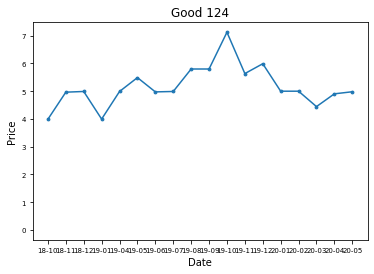

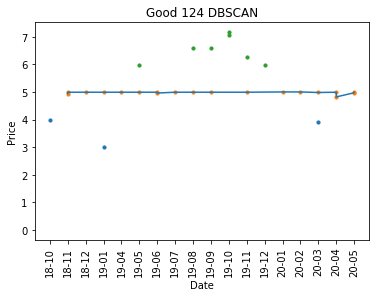

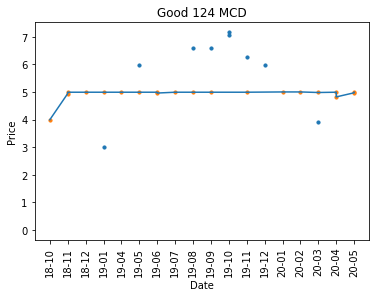

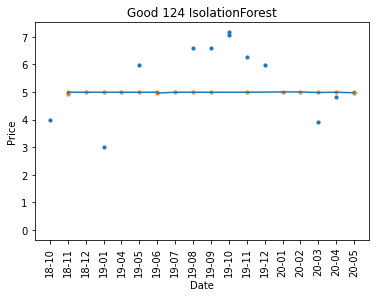

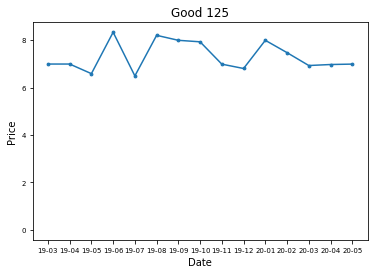

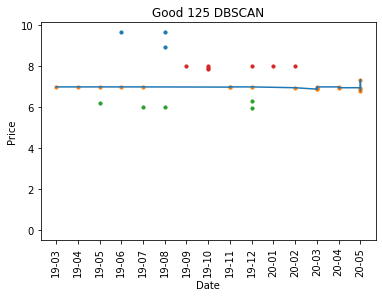

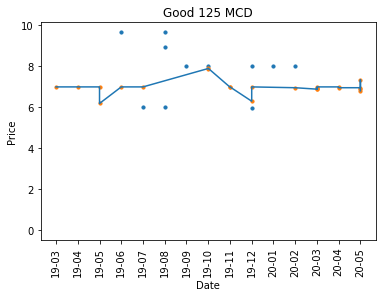

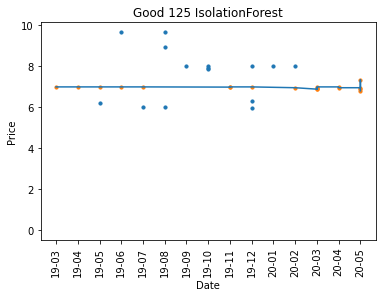

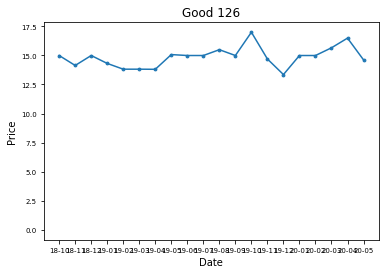

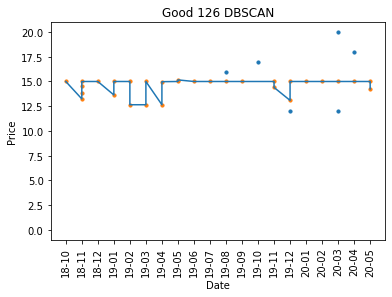

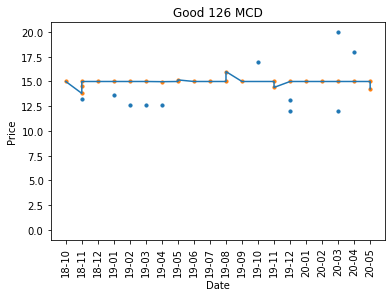

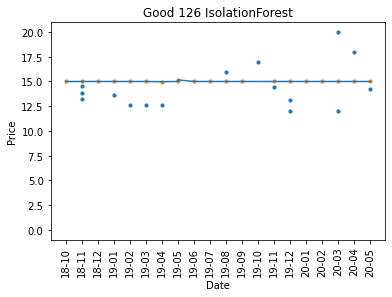

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (4). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


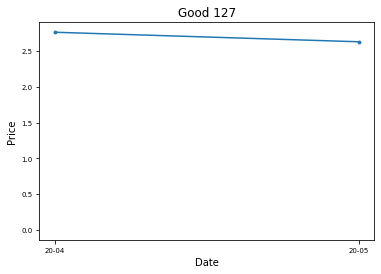

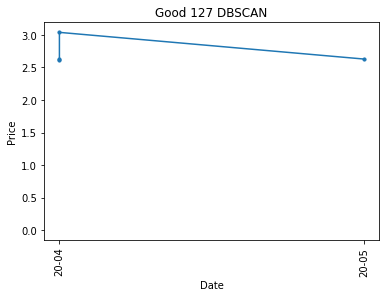

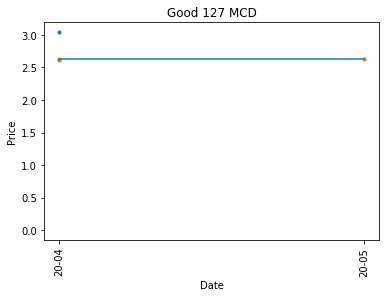

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (4). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


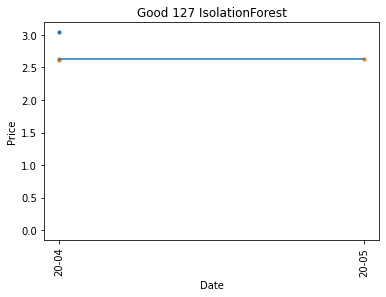

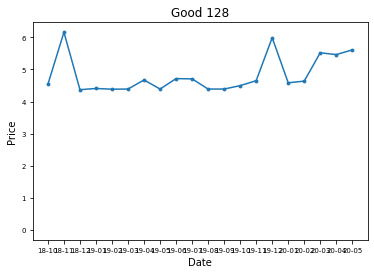

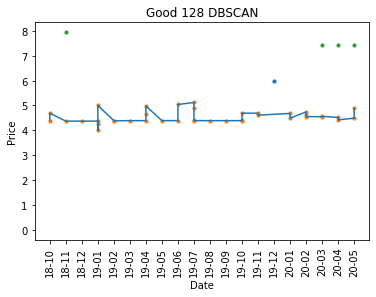

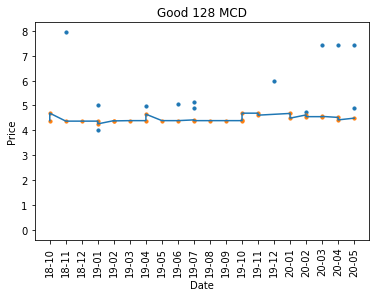

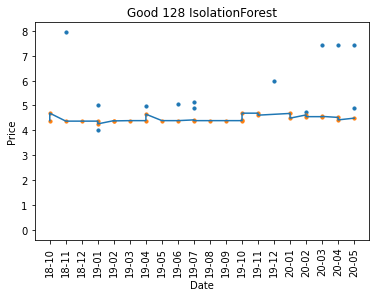

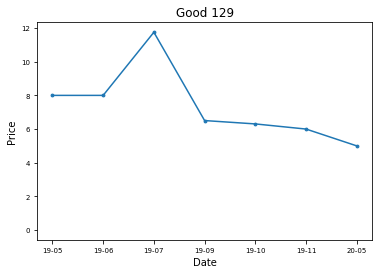

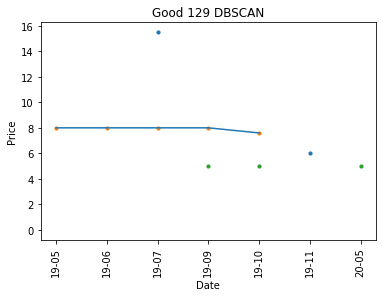

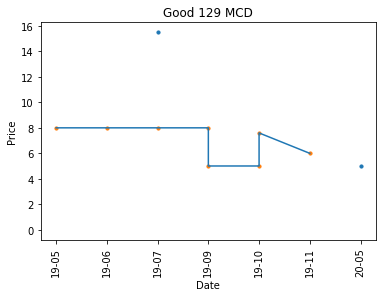

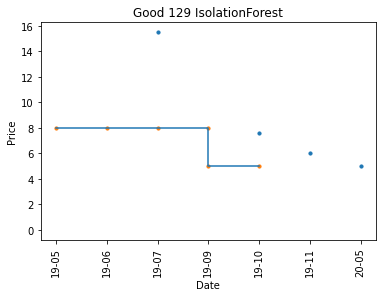

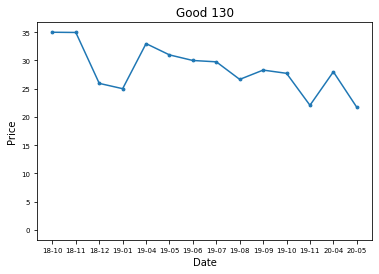

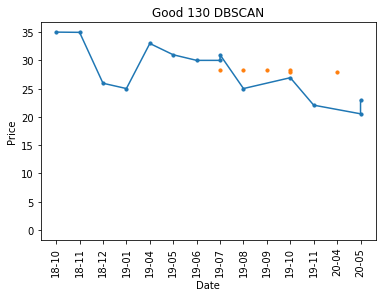

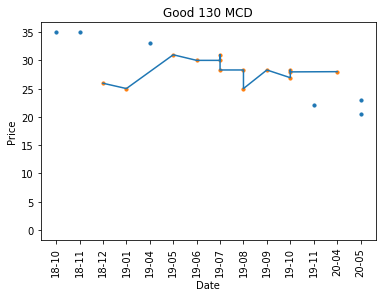

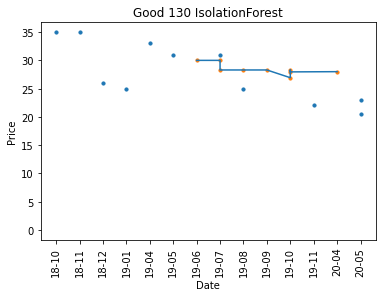

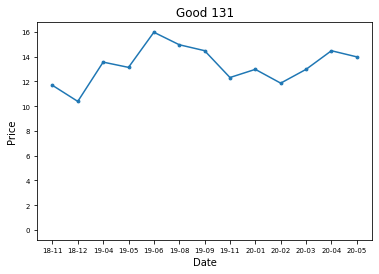

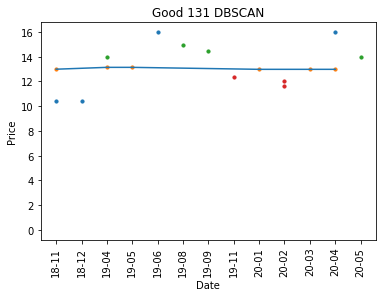

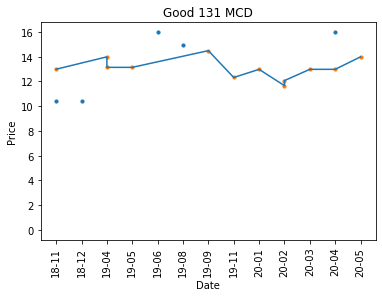

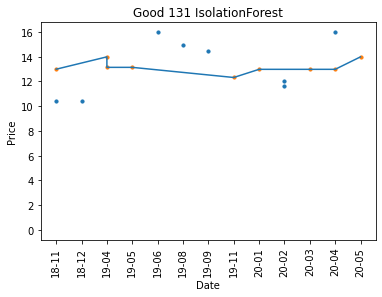

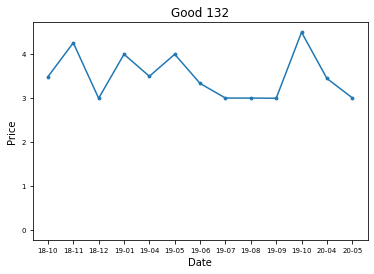

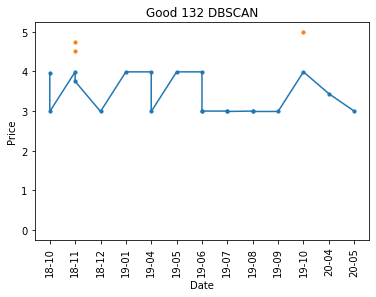

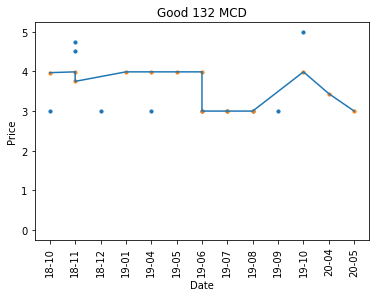

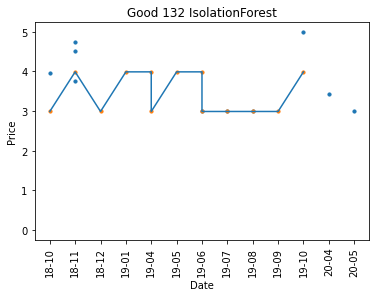

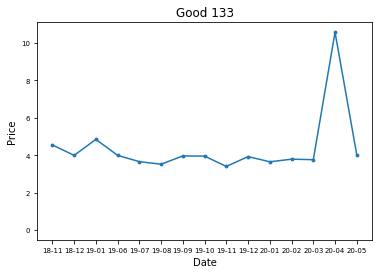

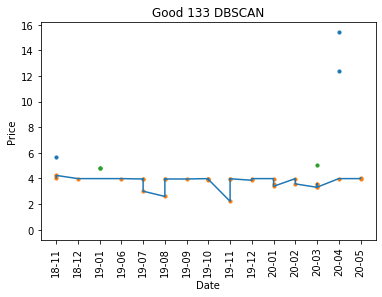

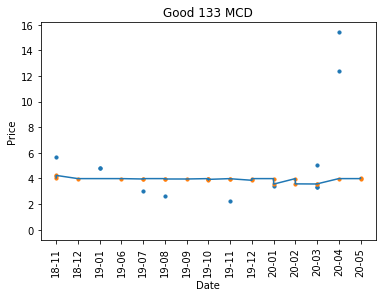

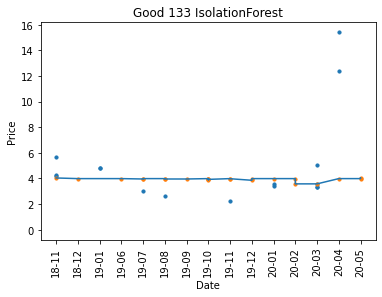

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (2). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


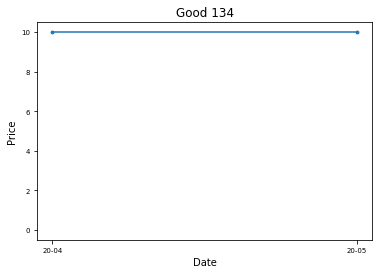

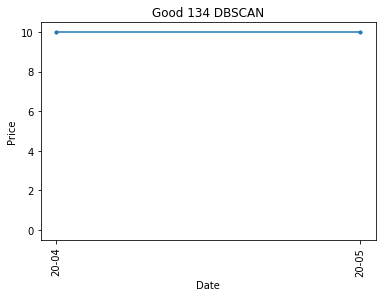

/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:806: RuntimeWarning: invalid value encountered in true_divide
  self.dist_ /= correction
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:848: RuntimeWarning: Mean of empty slice.
  location_reweighted = data[mask].mean(0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_empirical_covariance.py:93: RuntimeWarning: Degrees of freedom <= 0 for slice
  covariance = np.cov(X.T, bias=1)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/

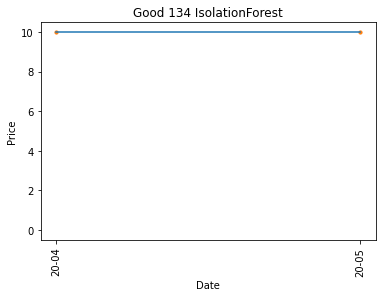

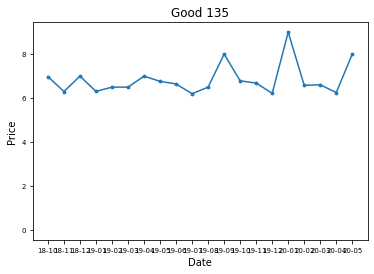

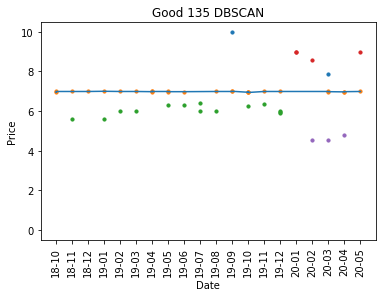

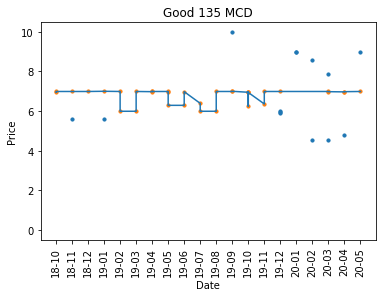

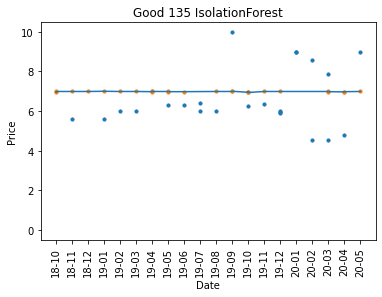

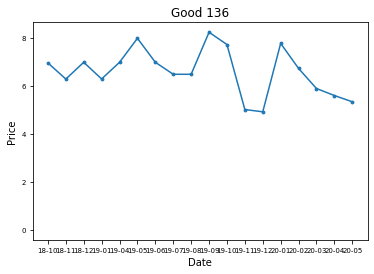

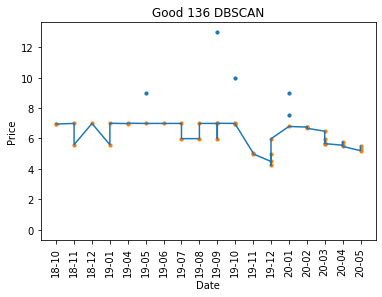

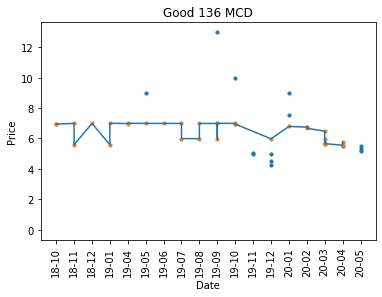

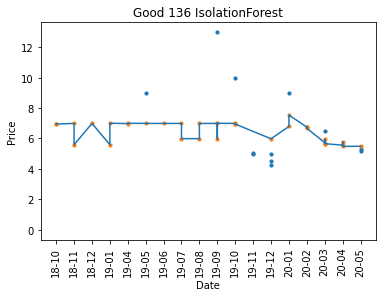

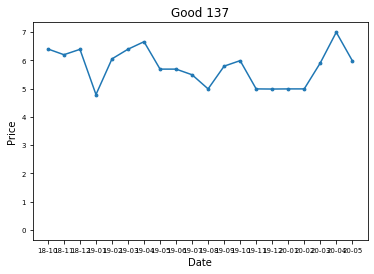

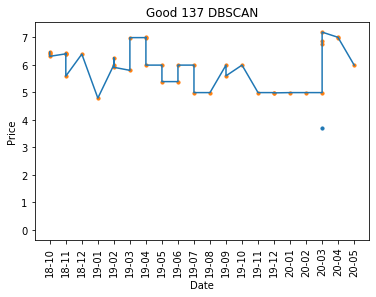

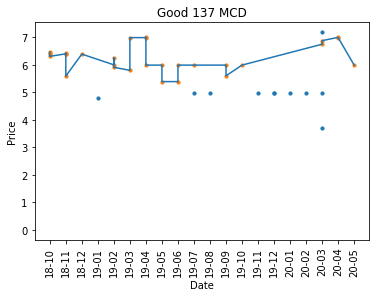

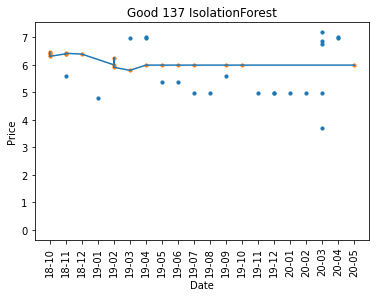

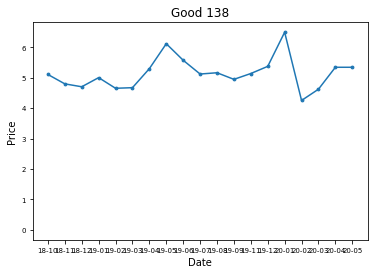

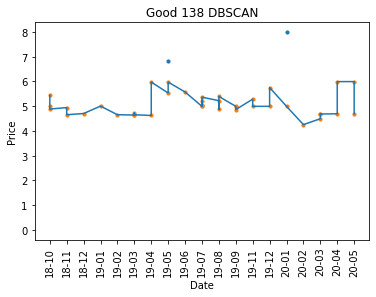

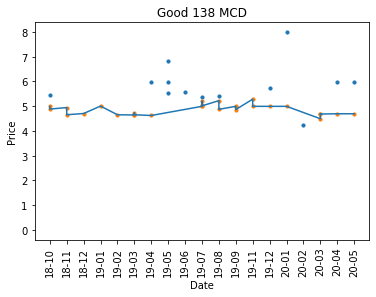

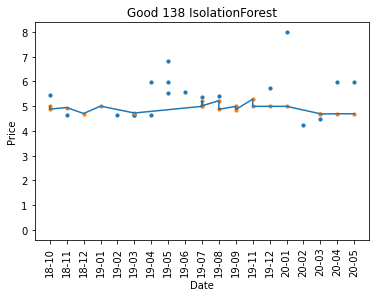

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (8). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


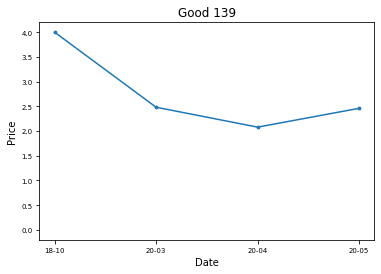

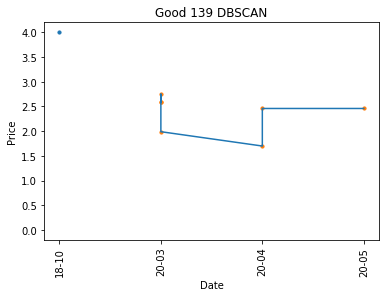

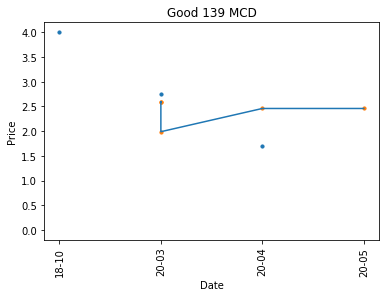

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (8). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


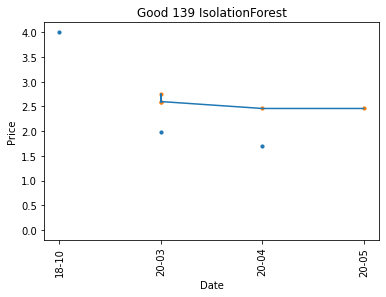

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (5). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


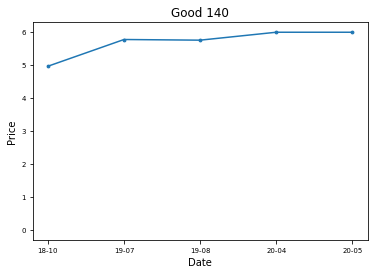

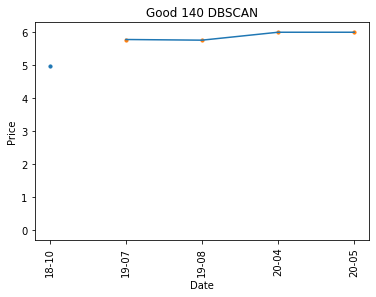

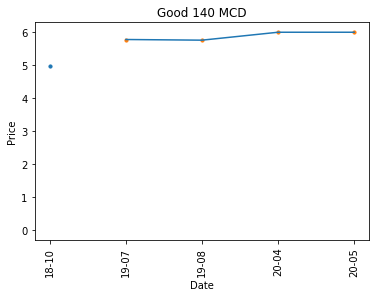

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (5). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


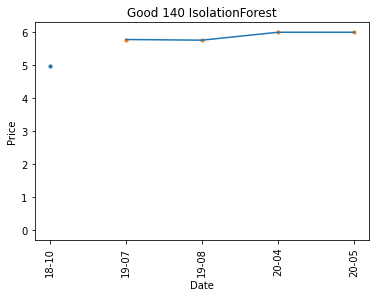

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (6). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


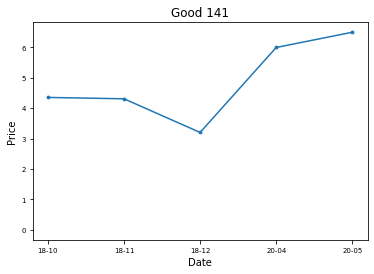

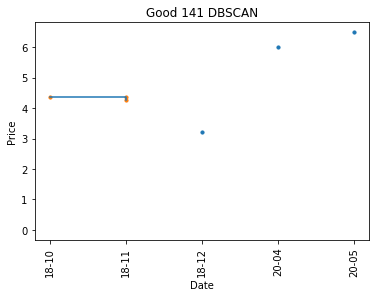

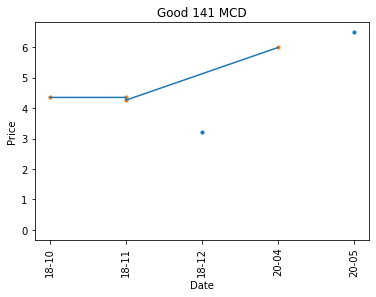

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (6). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


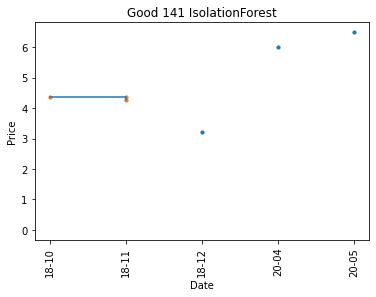

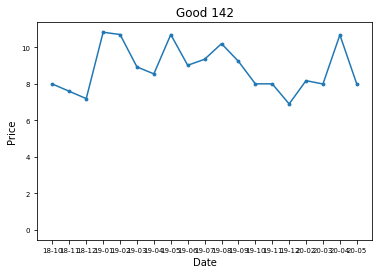

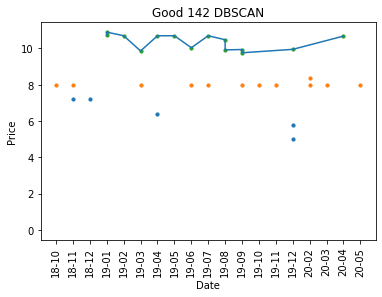

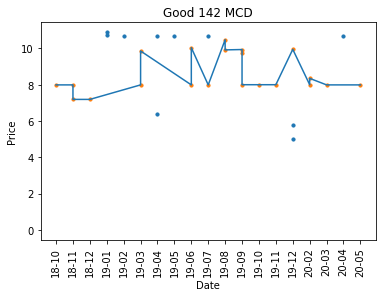

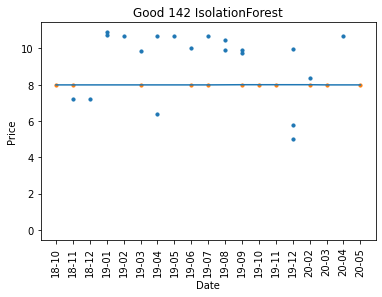

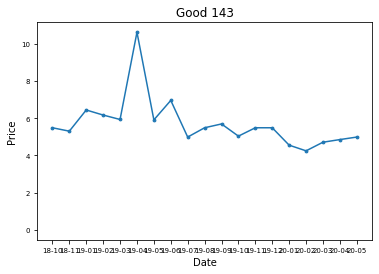

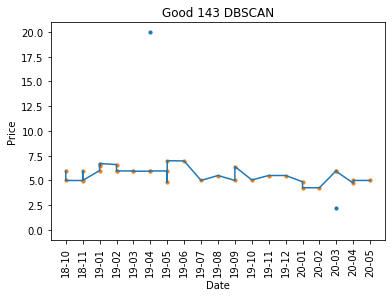

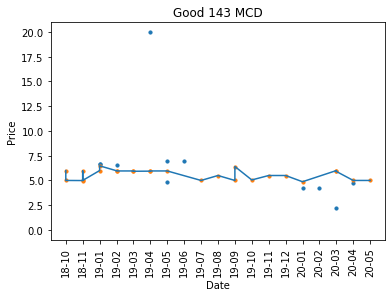

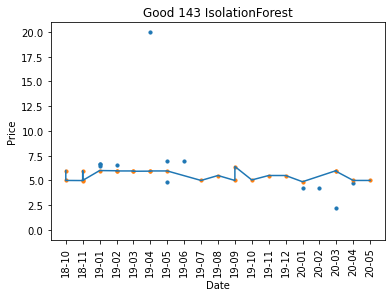

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (5). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


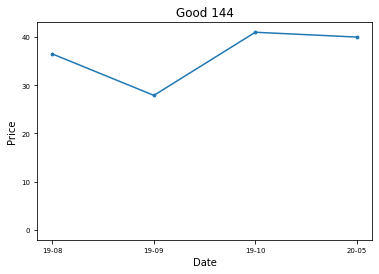

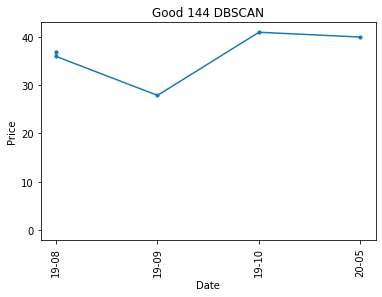

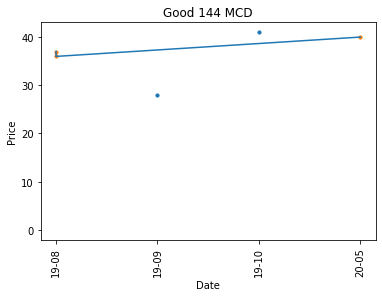

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (5). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


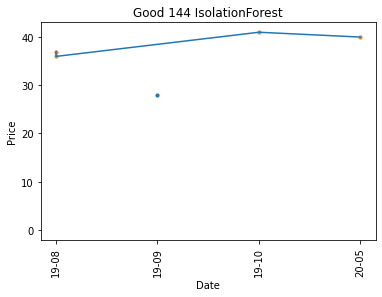

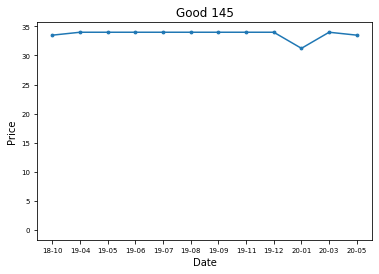

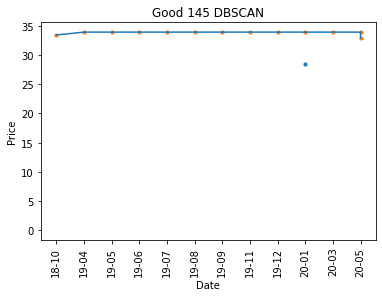

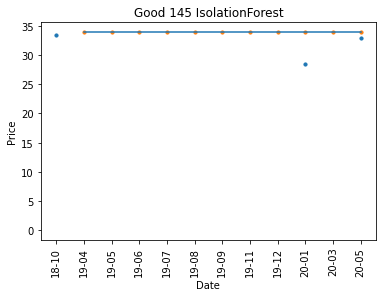

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (5). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


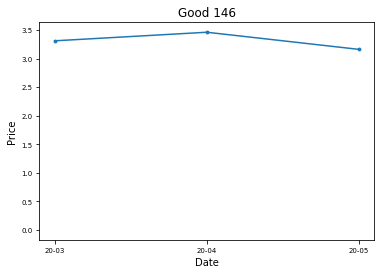

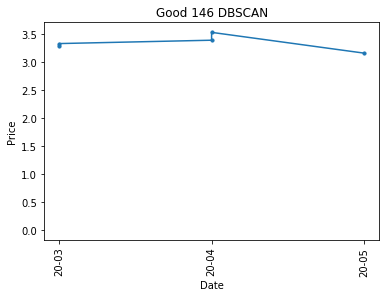

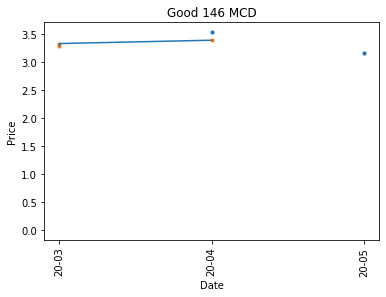

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (5). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


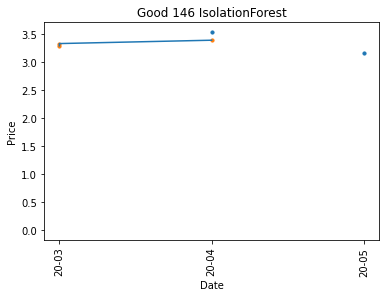

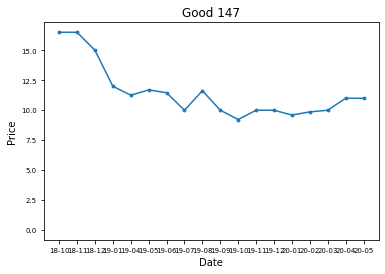

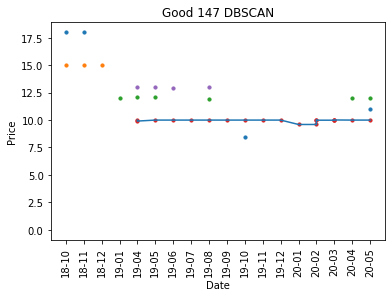

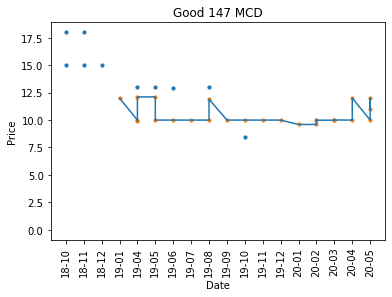

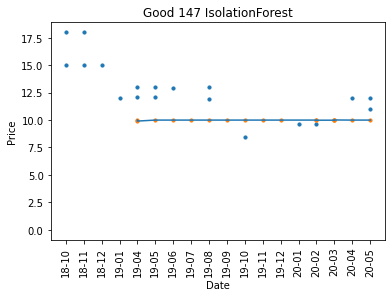

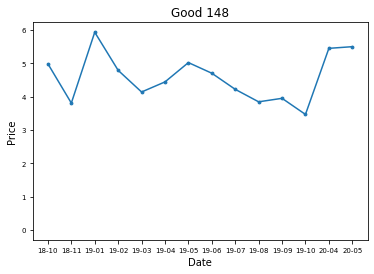

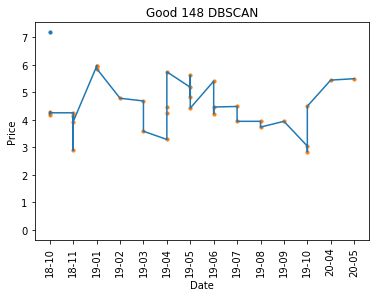

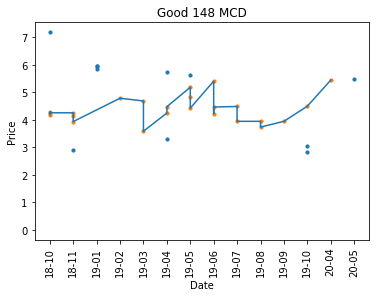

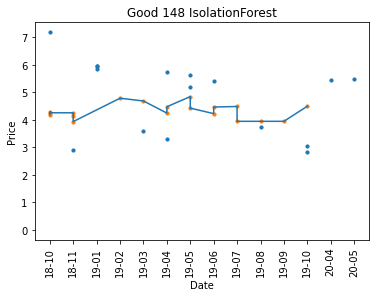

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (7). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


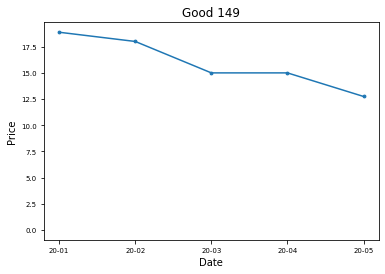

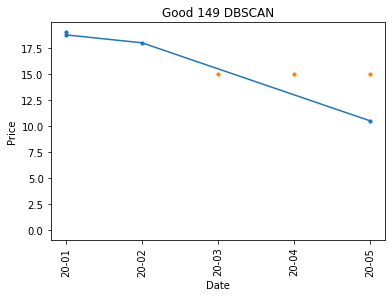

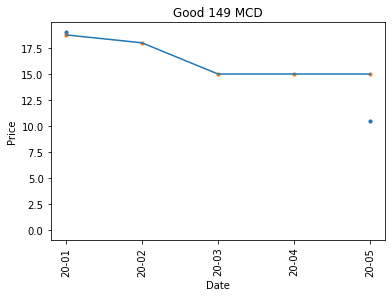

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (7). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


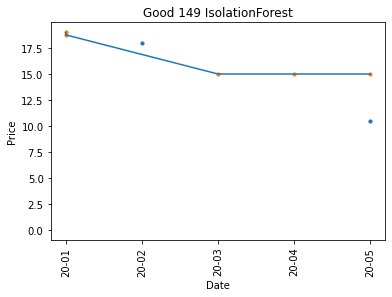

In [ ]:
work()

In [ ]:
from operator import itemgetter
import csv
import pandas as pd


def output_list_generate(y_pred,temp,x,z):
  temp=temp
  data_x, data_y = [], []
  for i in range(len(y_pred)):
      if y_pred[i] == temp:
          data_x.append(x[i][2:-3])
          data_y.append(z[i])
  data ={
      "date" :data_x,
      "price" : data_y,
  }
  df_csv=pd.DataFrame(data)
  df_csv.to_csv("DVD Good "+str(temp)+" "+".csv" ,index=False)  
  new_data,x=[],[]
  for i in range(len(data_x)):
    new_data.append([data_x[i],data_y[i]])
    x.append(data_x[i])
  mein_dict = dict.fromkeys(x)
  meine_liste = list(mein_dict)
  meine_liste=sorted(meine_liste)
  sort_list=[]
  index=0
  for i in meine_liste:
    sort_list.append([i,index])
    index=index+1
  liste = sorted(new_data, key=itemgetter(0))

  resultantList = []
  
  for element in liste:
      if element not in resultantList:
          resultantList.append(element)

  new_data_x=[]
  new_data_y=[]
  for i in range(len(resultantList)):
    new_data_x.append(resultantList[i][0])
    new_data_y.append(resultantList[i][1]) 
  data_X=[]
  def number_list(a):
    for i in range(0,len(new_data_x)):
      if sort_list[a][0]==new_data_x[i]:
        data_X.append([new_data_x[i],sort_list[a][1]])

  for i in range(0,len(sort_list)):
    number_list(i)  

  number, years =[],[]
  for i in range(0,len(data_X)):
    number.append(data_X[i][1])
    years.append(data_X[i][0])  
  img_path = 'DVD Good'+str(temp) + '.png'
  filter_out(number,new_data_y ,years, name=temp, img_path=img_path)
  dbScan(number,new_data_y ,years, name="DVD Good "+str(temp), eps=0.5, minpoint=3, flag=False)
  MCD(number,new_data_y ,years, name="DVD Good  "+str(temp),contamination=0.3, flag=False)
  IForest(number,new_data_y ,years,name="DVD Good "+str(temp), samples=10,flag=False)



def work_list_generate(): # Divide data into classes
    # Date = ['2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04']
    Date = pkl_data[0]
    x, y, z = [], [], []
    model = loadModel('groups.pkl')
    for j in Date:
        temp_path = j
        date = pk.load(open(temp_path, 'rb'))['date']
        vector = pk.load(open(temp_path, 'rb'))['vector']
        price = pk.load(open(temp_path, 'rb'))['price']
        length = len(date)
        for k in range(length):
            x.append(date[k])
            y.append(vector[k])
            z.append(price[k])
    y_pred = model.fit_predict(y)
    minn = min(y_pred)
    if minn < 0:
        y_pred = y_pred + -1 * minn
    maxn = max(y_pred)
    print(maxn)
    list_=[8,41]
    for temp in list_:
      output_list_generate(y_pred,temp,x,z)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DBSCAN from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


4077


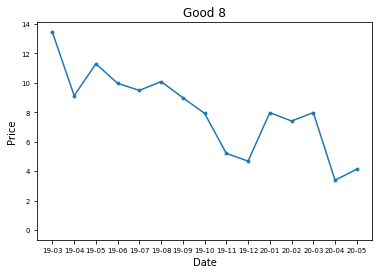

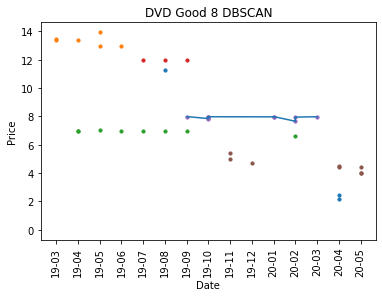

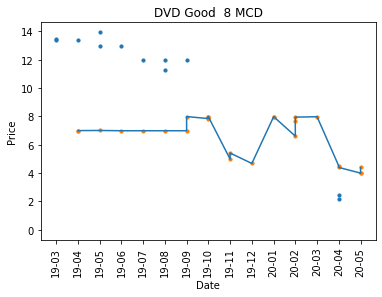

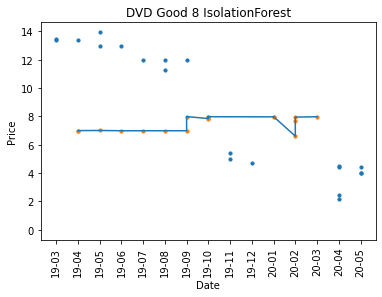

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (4). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


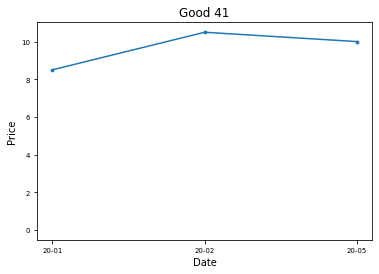

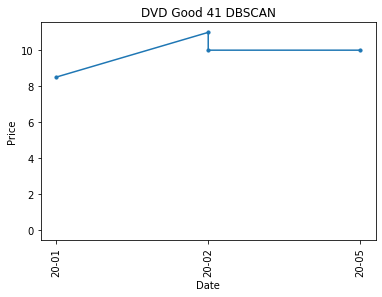

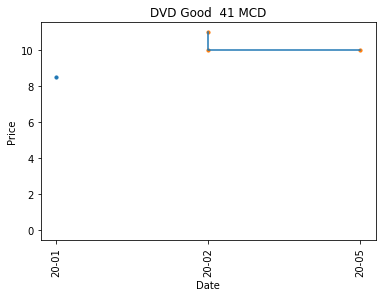

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (10) is greater than the total number of samples (4). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)


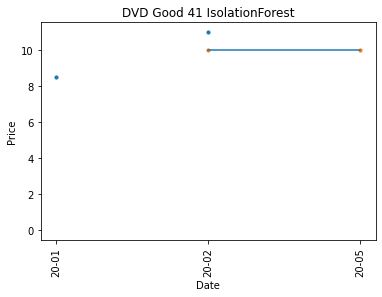

In [ ]:
work_list_generate()

In [ ]:
from operator import itemgetter
import csv
import pandas as pd


def output_data_manipulation(y_pred,temp,x,z):
  temp=temp
  data_x, data_y = [], []
  for i in range(len(y_pred)):
      if y_pred[i] == temp:
          data_x.append(x[i][2:-3])
          data_y.append(z[i])
 
  new_data,x=[],[]
  for i in range(len(data_x)):
    new_data.append([data_x[i],data_y[i]])
    x.append(data_x[i])
  mein_dict = dict.fromkeys(x)
  meine_liste = list(mein_dict)
  meine_liste=sorted(meine_liste)
  sort_list=[]
  index=0
  for i in meine_liste:
    sort_list.append([i,index])
    index=index+1
  liste = sorted(new_data, key=itemgetter(0))

  resultantList = []
  
  for element in liste:
      if element not in resultantList:
          resultantList.append(element)

  new_data_x=[]
  new_data_y=[]
  for i in range(len(resultantList)):
    new_data_x.append(resultantList[i][0])
    new_data_y.append(resultantList[i][1]) 
  data_X=[]
  def number_list(a):
    for i in range(0,len(new_data_x)):
      if sort_list[a][0]==new_data_x[i]:
        data_X.append([new_data_x[i],sort_list[a][1]])

  for i in range(0,len(sort_list)):
    number_list(i)  

  number, years =[],[]
  for i in range(0,len(data_X)):
    number.append(data_X[i][1])
    years.append(data_X[i][0])  
  
  '''
  Temp 8
  change the standard value by IF samples=20
  19-08 and 11.29 are deleted
  #####################
  '''

  if temp==8:
    number.pop(13)
    years.pop(13)
    new_data_y.pop(13)
    img_path = 'DVD Good'+str(temp) + '.png'
    filter_out(number,new_data_y ,years, name=temp, img_path=img_path)
    dbScan(number,new_data_y ,years, name="Manipulation DVD Good "+str(temp), eps=0.5, minpoint=3, flag=False)
    MCD(number,new_data_y ,years, name="Manipulation DVD Good  "+str(temp),contamination=0.3, flag=False)
    IForest(number,new_data_y ,years,name="Manipulation DVD Good "+str(temp), samples=20,flag=False)

  else:
    img_path = 'DVD Good'+str(temp) + '.png'
    filter_out(number,new_data_y ,years, name=temp, img_path=img_path)
    dbScan(number,new_data_y ,years, name="DVD Good "+str(temp), eps=0.5, minpoint=3, flag=False)
    MCD(number,new_data_y ,years, name="DVD Good  "+str(temp),contamination=0.3, flag=False)
    IForest(number,new_data_y ,years,name="DVD Good "+str(temp), samples=10,flag=False)




def work_data_manipulation(): # Divide data into classes
    # Date = ['2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04']
    Date = pkl_data[0]
    x, y, z = [], [], []
    model = loadModel('groups.pkl')
    for j in Date:
        temp_path = j
        date = pk.load(open(temp_path, 'rb'))['date']
        vector = pk.load(open(temp_path, 'rb'))['vector']
        price = pk.load(open(temp_path, 'rb'))['price']
        length = len(date)
        for k in range(length):
            x.append(date[k])
            y.append(vector[k])
            z.append(price[k])
    y_pred = model.fit_predict(y)
    minn = min(y_pred)
    if minn < 0:
        y_pred = y_pred + -1 * minn
    maxn = max(y_pred)
    print(maxn)
    list_=[8,41]
    for temp in list_:
      output_data_manipulation(y_pred,temp,x,z)

4077


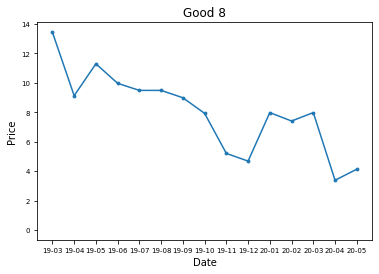

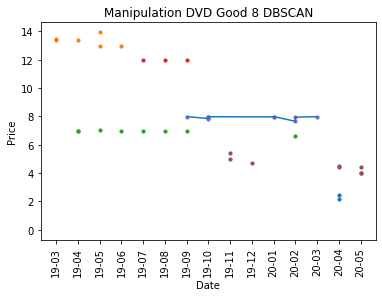

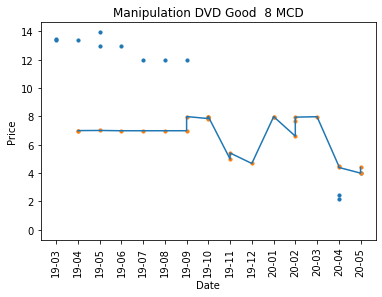

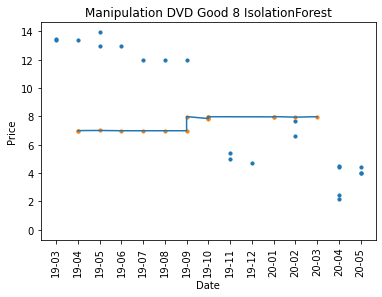

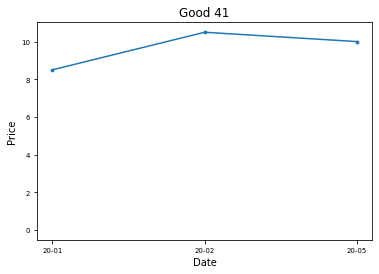

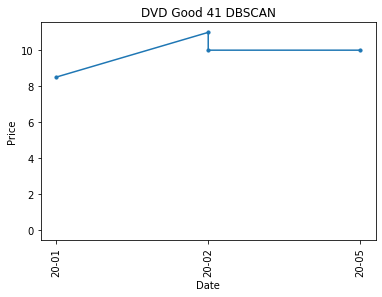

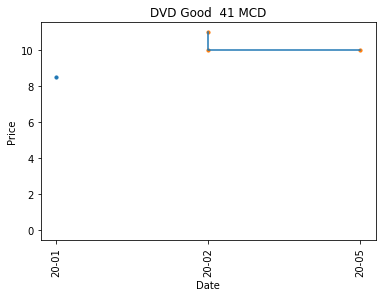

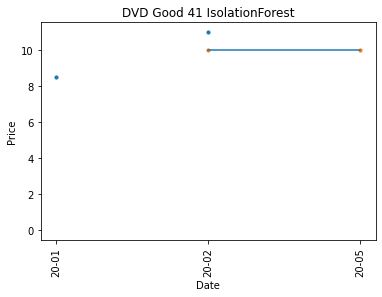

In [ ]:
work_data_manipulation()